# Perkenalan

Perkenalkan nama saya Reynaldi Evans Adam dari kelas FTDS Batch HCK-013, akan mengerjakan data science analysis menggunakan linear regression

Dataset yang saya akan gunakan adalah Uber and Lyft Dataset Boston, yang berisi data perjalanan ojek online dari Uber dan Lyft di wilayah Boston. 

Tujuan proyek ini adalah untuk memprediksi harga perjalanan menggunakan algoritma linear regression. Prediksi harga perjalanan yang akurat dapat membantu perusahaan ojek online mengoptimalkan strategi penetapan harga dan memberikan perkiraan tarif kepada pengguna. 

# Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew
from scipy.stats import kendalltau
import pickle
import json

#Import Skicit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import RobustScaler
from feature_engine.outliers import Winsorizer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Data Loading

Load the dataset and displaying the first 5 rows

In [2]:
df = pd.read_csv('rideshare_kaggle.csv')

df.head()

id     timestamp  hour  day  month  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2  981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   

              datetime          timezone            source    destination  \
0  2018-12-16 09:30:07  America/New_York  Haymarket Square  North Station   
1  2018-11-27 02:00:23  America/New_York  Haymarket Square  North Station   
2  2018-11-28 01:00:22  America/New_York  Haymarket Square  North Station   
3  2018-11-30 04:53:02  America/New_York  Haymarket Square  North Station   
4  2018-11-29 03:49:20  America/New_York  Haymarket Square  North Station   

  cab_type  ... precipIntensityMax uvIndexTime  temperatureMin  \
0     Lyft  ...             0.1276  1544979600           39.89   
1     Lyft  ...             0.1300  1543251600           40.49   
2     Lyft  ...             0.1064  1543338000           35.36   
3     Lyft  ...             0.0000  1543507200           34.67   
4     Lyft  ...             0.0001  1543420800           33.10   

   temperatureMinTime  temperatureMax  temperatureMaxTime  \
0          1545012000           43.68          1544968800   
1          1543233600           47.30          1543251600   
2          1543377600           47.55          1543320000   
3          1543550400           45.03          1543510800   
4          1543402800           42.18          1543420800   

   apparentTemperatureMin  apparentTemperatureMinTime  apparentTemperatureMax  \
0                   33.73                  1545012000                   38.07   
1                   36.20                  1543291200                   43.92   
2                   31.04                  1543377600                   44.12   
3                   30.30                  1543550400                   38.53   
4                   29.11                  1543392000                   35.75   

  apparentTemperatureMaxTime  
0                 1544958000  
1                 1543251600  
2                 1543320000  
3                 1543510800  
4                 1543420800  

[5 rows x 57 columns]

Checking the datatypes with df.info()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

checking the number of rows and columns

In [4]:
df.shape

(693071, 57)

the result above shows that this dataset contains 693,071 rows and 57 columns

Checking for null values

In [5]:
df.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Based on the result above, the program displays 55095 null values in the column `price` which needs to be dropped for an accurate analysis

Checking for data duplicates

In [6]:
df.duplicated().sum()

0

Fortunately, no duplicates are identified in the dataset

# EDA

Checking for Central Tendency

In [7]:
df['price'].describe()

count    637976.000000
mean         16.545125
std           9.324359
min           2.500000
25%           9.000000
50%          13.500000
75%          22.500000
max          97.500000
Name: price, dtype: float64

The dataset consists of 637,976 observations. The average value (mean) of the variable is approximately 16.55, with a standard deviation of approximately 9.32, indicating a moderate spread of values around the mean. The minimum value observed is 2.5, while the maximum value is 97.5. 

The 25th percentile (Q1) of the data is 9.0, suggesting that 25% of the observations fall below this value. Similarly, the median (50th percentile) is 13.5, indicating that half of the observations are below this value. The 75th percentile (Q3) is 22.5, implying that 75% of the observations are below this value.


Checking the price data distribution

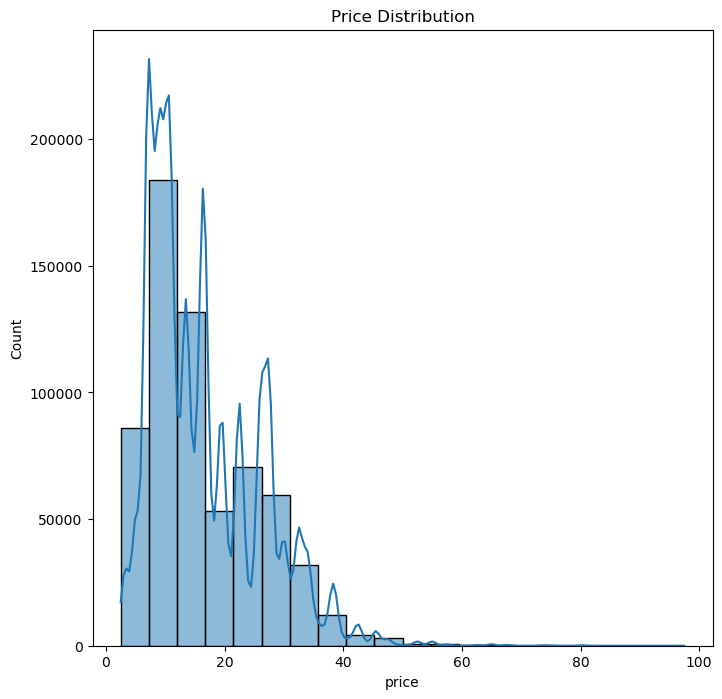

In [8]:
plt.figure(figsize=(8,8))

sns.histplot(df['price'], kde=True, bins=20)
plt.title('Price Distribution')
plt.show()

Based on the result, the price data distribution is a positive skew

Checking for outliers

Text(0.5, 1.0, 'Price Distribution for each Cab Type')

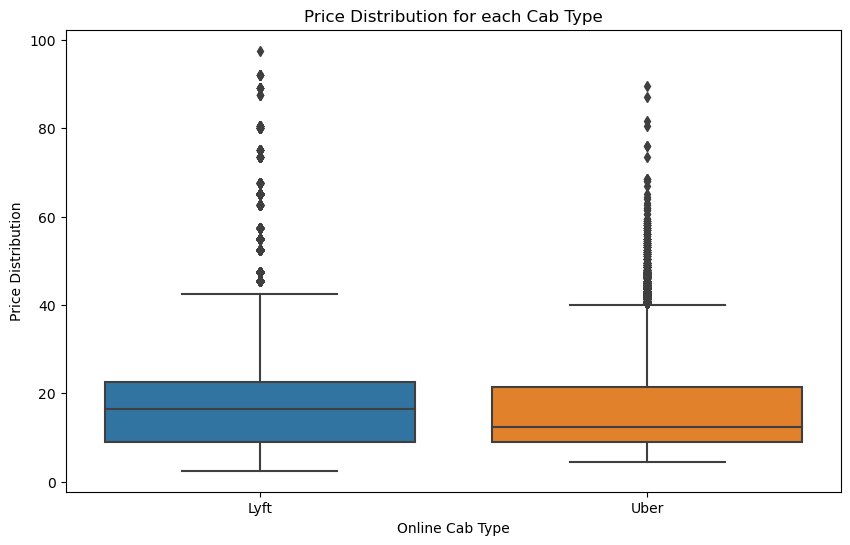

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(x='cab_type',y='price', data=df)
plt.xlabel('Online Cab Type')
plt.ylabel('Price Distribution')
plt.title('Price Distribution for each Cab Type')

as we can see here, the price distribution is pretty similar with lyft having a higher number of outlier

---

I would like to look at the transaction made by each cab type and the growth of price based on the surge multiplier

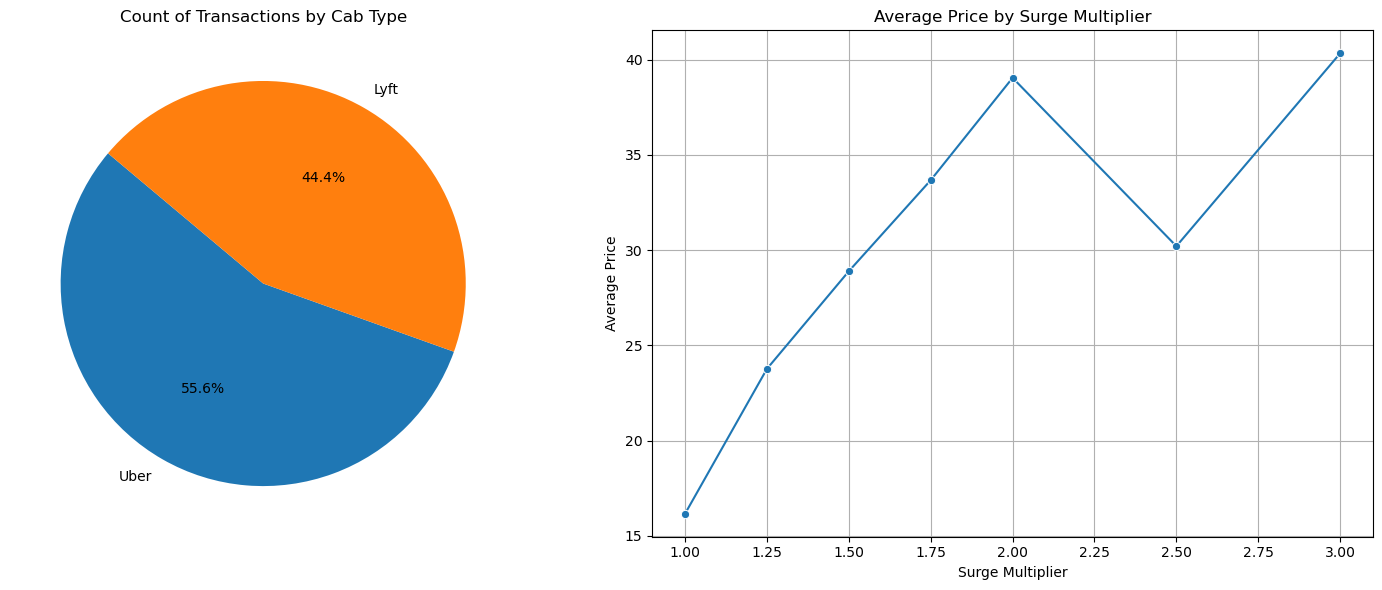

In [10]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart for count of transactions based on cab type
cab_type_counts = df['cab_type'].value_counts()
axes[0].pie(cab_type_counts, labels=cab_type_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Count of Transactions by Cab Type')

# Calculate the average price for each surge multiplier
avg_price_by_multiplier = df.groupby('surge_multiplier')['price'].mean().reset_index()

# Create a line plot
sns.lineplot(x='surge_multiplier', y='price', data=avg_price_by_multiplier, marker='o', ax=axes[1])
axes[1].set_xlabel('Surge Multiplier')
axes[1].set_ylabel('Average Price')
axes[1].set_title('Average Price by Surge Multiplier')
axes[1].grid(True)

plt.tight_layout()
plt.show()


Based on this graph, we can see that the count of transactions is mostly made with uber and how much does the surge multiplier affects the pricing range

---

next, we would like to see the transactions made by each weather condition to test if the transactions made might have something to do with the weather conditions

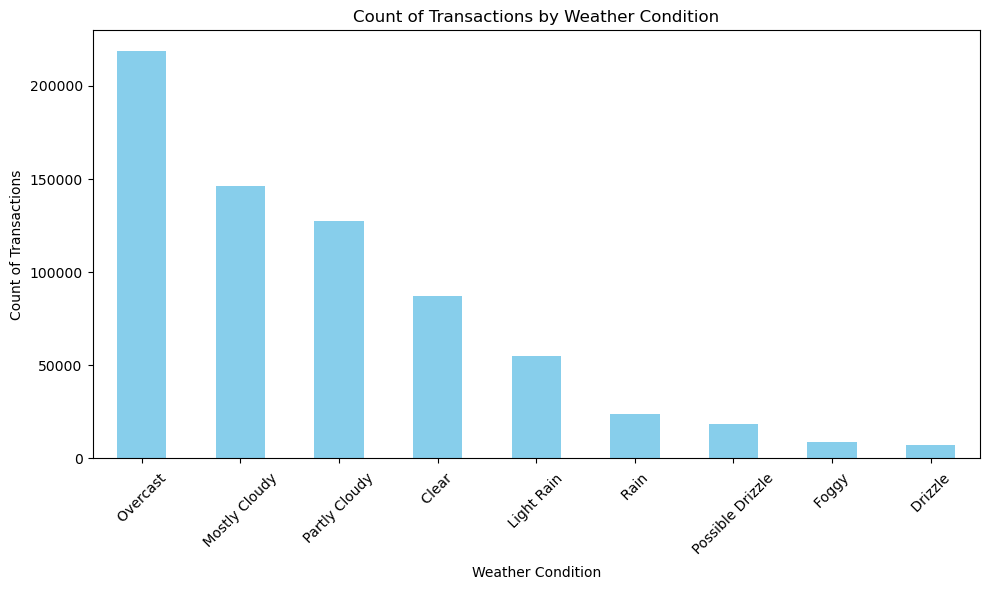

In [12]:
weather_counts = df['short_summary'].value_counts()

# Plot the count of transactions in each weather condition using a bar plot
plt.figure(figsize=(10, 6))
weather_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Transactions by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Count of Transactions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Based on the graph, the transactions occurs the most when the weather conditions are cloudy (overcast, mostly cloudy and partly cloudy) this might hint that high demand rises during the mentioned weather conditions, implying that the price's surge multiplier has a correlation with the price

---
Let us test from the previous EDAs made if each columns made has a correlation with the price, we will use heatmap to describe the correlation and we will be using kendall's tau due to most of the columns' data type nature being ordinal

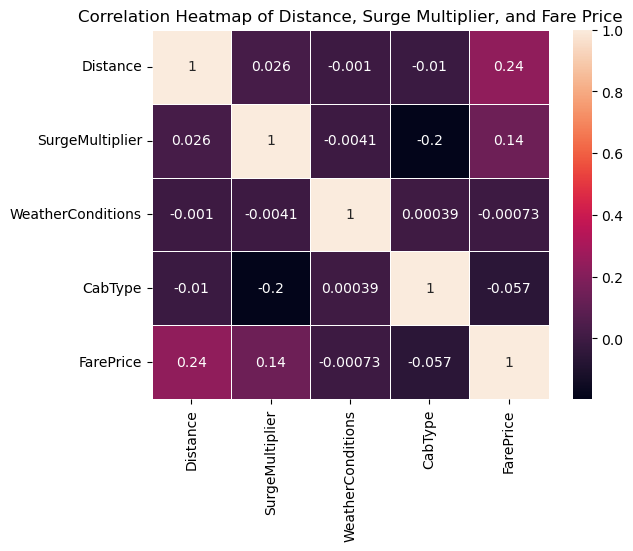

In [13]:
cabType = df['cab_type'].unique()

cab_mapping = {cab: i for i, cab in enumerate(cabType, 1)}

cab_encoded = short_summary_encoded = df['cab_type'].map(cab_mapping)

# Get unique weather conditions
unique_weather_conditions = df['short_summary'].unique()

# Create a dictionary to map weather conditions to ordinal numerical values
weather_mapping = {weather: i for i, weather in enumerate(unique_weather_conditions, 1)}

# Map weather conditions to ordinal numerical values
short_summary_encoded = df['short_summary'].map(weather_mapping)


# Combine the variables into a DataFrame
data = pd.DataFrame({'Distance': df['distance'], 'SurgeMultiplier': df['surge_multiplier'], 'WeatherConditions': short_summary_encoded, 'CabType': cab_encoded, 'FarePrice': df['price']})

# Calculate the correlation matrix
correlation_matrix = data.corr(method='kendall')

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title('Correlation Heatmap of Distance, Surge Multiplier, and Fare Price')
plt.show()


based on the heatmap made, we can see that the price correlates the most with the distance and the surge multiplier with the correlation value of 0.24 and the surge multiplier with the correlation value of 0.14

### Insight Gained

**Business Insight:**

1. Uber has more transactions made comparing to lyft, implying that people rely more on uber's TNC services than lyft
2. User made transactions during cloudy weather, which can be used to implement the surge multiplier during the specific weather conditions
3. The price data distribution is a positive skew, implying that the price has a large amount of outliers
4. The distributions of the cab's price shows a slight difference, implying that the price set by the applications are similar
5. The fare's price correlates the most with the distance of the trips and the price's surge multiplier, which can be used for the features in the the prediction modelling

## Identify types of Missing Values

make a copy of dataframe for testing purposes

In [11]:
df_null = df.copy()

df_null

id     timestamp  hour  day  month  \
0       424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1       4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2       981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3       c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4       e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   
...                                      ...           ...   ...  ...    ...   
693066  616d3611-1820-450a-9845-a9ff304a4842  1.543708e+09    23    1     12   
693067  633a3fc3-1f86-4b9e-9d48-2b7132112341  1.543708e+09    23    1     12   
693068  64d451d0-639f-47a4-9b7c-6fd92fbd264f  1.543708e+09    23    1     12   
693069  727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e  1.543708e+09    23    1     12   
693070  e7fdc087-fe86-40a5-a3c3-3b2a8badcbda  1.543708e+09    23    1     12   

                   datetime          timezone            source  \
0       2018-12-16 09:30:07  America/New_York  Haymarket Square   
1       2018-11-27 02:00:23  America/New_York  Haymarket Square   
2       2018-11-28 01:00:22  America/New_York  Haymarket Square   
3       2018-11-30 04:53:02  America/New_York  Haymarket Square   
4       2018-11-29 03:49:20  America/New_York  Haymarket Square   
...                     ...               ...               ...   
693066  2018-12-01 23:53:05  America/New_York          West End   
693067  2018-12-01 23:53:05  America/New_York          West End   
693068  2018-12-01 23:53:05  America/New_York          West End   
693069  2018-12-01 23:53:05  America/New_York          West End   
693070  2018-12-01 23:53:05  America/New_York          West End   

          destination cab_type  ... precipIntensityMax uvIndexTime  \
0       North Station     Lyft  ...             0.1276  1544979600   
1       North Station     Lyft  ...             0.1300  1543251600   
2       North Station     Lyft  ...             0.1064  1543338000   
3       North Station     Lyft  ...             0.0000  1543507200   
4       North Station     Lyft  ...             0.0001  1543420800   
...               ...      ...  ...                ...         ...   
693066      North End     Uber  ...             0.0000  1543683600   
693067      North End     Uber  ...             0.0000  1543683600   
693068      North End     Uber  ...             0.0000  1543683600   
693069      North End     Uber  ...             0.0000  1543683600   
693070      North End     Uber  ...             0.0000  1543683600   

        temperatureMin  temperatureMinTime  temperatureMax  \
0                39.89          1545012000           43.68   
1                40.49          1543233600           47.30   
2                35.36          1543377600           47.55   
3                34.67          1543550400           45.03   
4                33.10          1543402800           42.18   
...                ...                 ...             ...   
693066           31.42          1543658400           44.76   
693067           31.42          1543658400           44.76   
693068           31.42          1543658400           44.76   
693069           31.42          1543658400           44.76   
693070           31.42          1543658400           44.76   

        temperatureMaxTime  apparentTemperatureMin  \
0               1544968800                   33.73   
1               1543251600                   36.20   
2               1543320000                   31.04   
3               1543510800                   30.30   
4               1543420800                   29.11   
...                    ...                     ...   
693066          1543690800                   27.77   
693067          1543690800                   27.77   
693068          1543690800                   27.77   
693069          1543690800                   27.77   
693070          1543690800                   27.77   

        apparentTemperatureMinTime  appar

Displaying columns that contain missing values

In [12]:
# Create a new column 'price_null' indicating whether 'price' is null
df_null['price_null'] = df_null['price'].isnull()

# Display the resulting DataFrame
df_null


id     timestamp  hour  day  month  \
0       424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1       4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2       981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3       c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4       e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   
...                                      ...           ...   ...  ...    ...   
693066  616d3611-1820-450a-9845-a9ff304a4842  1.543708e+09    23    1     12   
693067  633a3fc3-1f86-4b9e-9d48-2b7132112341  1.543708e+09    23    1     12   
693068  64d451d0-639f-47a4-9b7c-6fd92fbd264f  1.543708e+09    23    1     12   
693069  727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e  1.543708e+09    23    1     12   
693070  e7fdc087-fe86-40a5-a3c3-3b2a8badcbda  1.543708e+09    23    1     12   

                   datetime          timezone            source  \
0       2018-12-16 09:30:07  America/New_York  Haymarket Square   
1       2018-11-27 02:00:23  America/New_York  Haymarket Square   
2       2018-11-28 01:00:22  America/New_York  Haymarket Square   
3       2018-11-30 04:53:02  America/New_York  Haymarket Square   
4       2018-11-29 03:49:20  America/New_York  Haymarket Square   
...                     ...               ...               ...   
693066  2018-12-01 23:53:05  America/New_York          West End   
693067  2018-12-01 23:53:05  America/New_York          West End   
693068  2018-12-01 23:53:05  America/New_York          West End   
693069  2018-12-01 23:53:05  America/New_York          West End   
693070  2018-12-01 23:53:05  America/New_York          West End   

          destination cab_type  ... uvIndexTime temperatureMin  \
0       North Station     Lyft  ...  1544979600          39.89   
1       North Station     Lyft  ...  1543251600          40.49   
2       North Station     Lyft  ...  1543338000          35.36   
3       North Station     Lyft  ...  1543507200          34.67   
4       North Station     Lyft  ...  1543420800          33.10   
...               ...      ...  ...         ...            ...   
693066      North End     Uber  ...  1543683600          31.42   
693067      North End     Uber  ...  1543683600          31.42   
693068      North End     Uber  ...  1543683600          31.42   
693069      North End     Uber  ...  1543683600          31.42   
693070      North End     Uber  ...  1543683600          31.42   

        temperatureMinTime  temperatureMax  temperatureMaxTime  \
0               1545012000           43.68          1544968800   
1               1543233600           47.30          1543251600   
2               1543377600           47.55          1543320000   
3               1543550400           45.03          1543510800   
4               1543402800           42.18          1543420800   
...                    ...             ...                 ...   
693066          1543658400           44.76          1543690800   
693067          1543658400           44.76          1543690800   
693068          1543658400           44.76          1543690800   
693069          1543658400           44.76          1543690800   
693070          1543658400           44.76          1543690800   

        apparentTemperatureMin  apparentTemperatureMinTime  \
0                        33.73                  1545012000   
1                        36.20                  1543291200   
2                        31.04                  1543377600   
3                        30.30                  1543550400   
4                        29.11                  1543392000   
...                        ...                         ...   
693066                   27.77                  1543658400   
693067                   27.77                  1543658400   
693068                   27.77                  1543658400   
693069                   27.77                  1543658400   
693070  

Grouping the null values by cab type

In [13]:
# Display the value counts by 'cab_type' and 'price_null'
print('Value Counts by Cab Type')
df_null.groupby('cab_type')['price_null'].value_counts()

Value Counts by Cab Type


cab_type  price_null
Lyft      False         307408
Uber      False         330568
          True           55095
Name: count, dtype: int64

based on the result, we can see that uber has all the column value, but uber has other taxi type so we need to break it down to the taxi types

Testing if the missing value has a correlation with the actual cab type name

In [14]:
print('Value Counts by Cab Name')
df_null.groupby(['name'])['price_null'].value_counts()

Value Counts by Cab Name


name          price_null
Black         False         55095
Black SUV     False         55096
Lux           False         51235
Lux Black     False         51235
Lux Black XL  False         51235
Lyft          False         51235
Lyft XL       False         51235
Shared        False         51233
Taxi          True          55095
UberPool      False         55091
UberX         False         55094
UberXL        False         55096
WAV           False         55096
Name: count, dtype: int64

In this code, we can see that only the name taxi has a null value

---

From the grouping of missing values, we can see that the missing values are dependent on one of the features which is the the type of the taxi (in this case, Taxi), implying that the type of missing values is **MAR (Missing at Random)**. 

Due to the missing values only identified at price, we will need to get rid of the null values because these null values affect greatly at the model prediction considering the null values are at the label

### Checking Cardinality

In [18]:
# Define a threshold for low cardinality
threshold = 10

# Create an empty list to store DataFrame rows
rows = []

# Loop through each column in the DataFrame
for col in df.columns:
    # Calculate the number of unique values in the column
    unique_values = len(df[col].unique())
    
    # Classify the cardinality as 'Low' or 'High' based on the threshold
    if unique_values <= threshold:
        cardinality_class = 'Low'
    else:
        cardinality_class = 'High'
    
    # Append the column name, cardinality, and cardinality class to the list
    rows.append({'Column': col,
                 'Cardinality': unique_values,
                 'Cardinality Class': cardinality_class})

# Create a DataFrame from the list of rows
cardinality_df = pd.DataFrame(rows)

# Print the DataFrame showing the cardinality classification for each column
cardinality_df


Column  Cardinality Cardinality Class
0                            id       693071              High
1                     timestamp        36179              High
2                          hour           24              High
3                           day           17              High
4                         month            2               Low
5                      datetime        31350              High
6                      timezone            1               Low
7                        source           12              High
8                   destination           12              High
9                      cab_type            2               Low
10                   product_id           13              High
11                         name           13              High
12                        price          148              High
13                     distance          549              High
14             surge_multiplier            7               Low
15                     latitude           11              High
16                    longitude           12              High
17                  temperature          308              High
18          apparentTemperature          319              High
19                short_summary            9               Low
20                 long_summary           11              High
21              precipIntensity           63              High
22            precipProbability           29              High
23                     humidity           51              High
24                    windSpeed          291              High
25                     windGust          286              High
26                 windGustTime           25              High
27                   visibility          227              High
28              temperatureHigh          129              High
29          temperatureHighTime           23              High
30               temperatureLow          133              High
31           temperatureLowTime           31              High
32      apparentTemperatureHigh          124              High
33  apparentTemperatureHighTime           27              High
34       apparentTemperatureLow          136              High
35   apparentTemperatureLowTime           32              High
36                         icon            7               Low
37                     dewPoint          313              High
38                     pressure          316              High
39                  windBearing          195              High
40                   cloudCover           83              High
41                      uvIndex            3               Low
42                 visibility.1          227              High
43                        ozone          274              High
44                  sunriseTime          110              High
45                   sunsetTime          114              High
46                    moonPhase           18              High
47           precipIntensityMax           65              High
48                  uvIndexTime           20              High
49               temperatureMin          131              High
50           temperatureMinTime           25              High
51               temperatureMax          128              High
52           temperatureMaxTime           23              High
53       apparentTemperatureMin          137              High
54   apparentTemperatureMinTime           29              High
55       apparentTemperatureMax          125              High
56   apparentTemperatureMaxTime           27              High

The result shows that most of the columns contains high cardinality

# Train-test split

create a copy for testing purposes

In [15]:
df2 = df.copy()

df2

id     timestamp  hour  day  month  \
0       424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1       4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2       981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3       c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4       e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   
...                                      ...           ...   ...  ...    ...   
693066  616d3611-1820-450a-9845-a9ff304a4842  1.543708e+09    23    1     12   
693067  633a3fc3-1f86-4b9e-9d48-2b7132112341  1.543708e+09    23    1     12   
693068  64d451d0-639f-47a4-9b7c-6fd92fbd264f  1.543708e+09    23    1     12   
693069  727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e  1.543708e+09    23    1     12   
693070  e7fdc087-fe86-40a5-a3c3-3b2a8badcbda  1.543708e+09    23    1     12   

                   datetime          timezone            source  \
0       2018-12-16 09:30:07  America/New_York  Haymarket Square   
1       2018-11-27 02:00:23  America/New_York  Haymarket Square   
2       2018-11-28 01:00:22  America/New_York  Haymarket Square   
3       2018-11-30 04:53:02  America/New_York  Haymarket Square   
4       2018-11-29 03:49:20  America/New_York  Haymarket Square   
...                     ...               ...               ...   
693066  2018-12-01 23:53:05  America/New_York          West End   
693067  2018-12-01 23:53:05  America/New_York          West End   
693068  2018-12-01 23:53:05  America/New_York          West End   
693069  2018-12-01 23:53:05  America/New_York          West End   
693070  2018-12-01 23:53:05  America/New_York          West End   

          destination cab_type  ... precipIntensityMax uvIndexTime  \
0       North Station     Lyft  ...             0.1276  1544979600   
1       North Station     Lyft  ...             0.1300  1543251600   
2       North Station     Lyft  ...             0.1064  1543338000   
3       North Station     Lyft  ...             0.0000  1543507200   
4       North Station     Lyft  ...             0.0001  1543420800   
...               ...      ...  ...                ...         ...   
693066      North End     Uber  ...             0.0000  1543683600   
693067      North End     Uber  ...             0.0000  1543683600   
693068      North End     Uber  ...             0.0000  1543683600   
693069      North End     Uber  ...             0.0000  1543683600   
693070      North End     Uber  ...             0.0000  1543683600   

        temperatureMin  temperatureMinTime  temperatureMax  \
0                39.89          1545012000           43.68   
1                40.49          1543233600           47.30   
2                35.36          1543377600           47.55   
3                34.67          1543550400           45.03   
4                33.10          1543402800           42.18   
...                ...                 ...             ...   
693066           31.42          1543658400           44.76   
693067           31.42          1543658400           44.76   
693068           31.42          1543658400           44.76   
693069           31.42          1543658400           44.76   
693070           31.42          1543658400           44.76   

        temperatureMaxTime  apparentTemperatureMin  \
0               1544968800                   33.73   
1               1543251600                   36.20   
2               1543320000                   31.04   
3               1543510800                   30.30   
4               1543420800                   29.11   
...                    ...                     ...   
693066          1543690800                   27.77   
693067          1543690800                   27.77   
693068          1543690800                   27.77   
693069          1543690800                   27.77   
693070          1543690800                   27.77   

        apparentTemperatureMinTime  appar

the table has been successfully copied

Creating the Features and label and splits them for the machine learning's training and testing dataset

In [16]:
X = df2.drop(columns=['id', 'timestamp', 'timezone', 'datetime', 'price'], axis=1) #Features
y = df2['price'] #Label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

X_train

hour  day  month                   source              destination  \
478681    23   16     12            North Station  Northeastern University   
65511      3   27     11  Northeastern University                 West End   
376578     4   15     12         Haymarket Square                 West End   
235263    15   15     12  Northeastern University         Theatre District   
691526     1   27     11  Northeastern University       Financial District   
...      ...  ...    ...                      ...                      ...   
44231      7   14     12         Theatre District  Northeastern University   
35483      9   26     11        Boston University                 West End   
629120     8   18     12         Theatre District                North End   
199301    19   28     11         Haymarket Square       Financial District   
446197     4   13     12        Boston University       Financial District   

       cab_type                            product_id          name  distance  \
478681     Lyft                             lyft_line        Shared      3.37   
65511      Lyft                             lyft_line        Shared      2.82   
376578     Lyft                           lyft_luxsuv  Lux Black XL      0.64   
235263     Uber  6c84fd89-3f11-4782-9b50-97c468b19529         Black      2.53   
691526     Lyft                             lyft_line        Shared      3.91   
...         ...                                   ...           ...       ...   
44231      Uber  9a0e7b09-b92b-4c41-9779-2ad22b4d779d           WAV      1.80   
35483      Uber  997acbb5-e102-41e1-b155-9df7de0a73f2      UberPool      3.04   
629120     Uber  9a0e7b09-b92b-4c41-9779-2ad22b4d779d           WAV      1.57   
199301     Uber  997acbb5-e102-41e1-b155-9df7de0a73f2      UberPool      0.80   
446197     Lyft                           lyft_luxsuv  Lux Black XL      4.54   

        surge_multiplier  ...  precipIntensityMax  uvIndexTime  \
478681               1.0  ...              0.1252   1544979600   
65511                1.0  ...              0.1225   1543251600   
376578               1.0  ...              0.0000   1544806800   
235263               1.0  ...              0.0081   1544893200   
691526               1.0  ...              0.1300   1543251600   
...                  ...  ...                 ...          ...   
44231                1.0  ...              0.0000   1544806800   
35483                1.0  ...              0.1227   1543251600   
629120               1.0  ...              0.0028   1545152400   
199301               1.0  ...              0.0000   1543420800   
446197               1.0  ...              0.0000   1544634000   

        temperatureMin  temperatureMinTime temperatureMax temperatureMaxTime  \
478681           39.22          1544954400          43.83         1544990400   
65511            40.45          1543233600          46.49         1543255200   
376578           26.93          1544788800          46.68         1544814000   
235263           39.68          1544929200          54.46         1544896800   
691526           40.49          1543233600          47.30         1543251600   
...                ...                 ...            ...                ...   
44231            27.18          1544781600          46.65         1544814000   
35483            40.35          1543233600          46.59         1543255200   
629120           23.23          1545192000          38.11         1545109200   
199301           33.82          1543399200          42.72         1543438800   
446197           22.55          1544673600          37.84         1544637600   

        apparentTemperatureMin  apparentTemperatureMinTime  \
478681                   33.98                  1545019200   
65511                    37.17                  1543291200   
376578                   27.58                  1544788800   
235263                   36.43                  1544929200   
691526                   36.20    

the table has been successfully split

# Missing Value Handling

Dropping missing values from y_train and y_test, and checking for missing values in y_train

In [17]:
y_train.dropna(inplace=True)
y_test.dropna(inplace=True)

y_train.isna().sum()

0

the null values has been successfully dropped

Dropping corresponding rows from x_train and x_test based on non-null values in y_train and y_test, then display the x_train if it's the value of the rows changed

In [18]:
X_train = X_train.loc[y_train.index]
X_test = X_test.loc[y_test.index]

X_train

hour  day  month                   source              destination  \
478681    23   16     12            North Station  Northeastern University   
65511      3   27     11  Northeastern University                 West End   
376578     4   15     12         Haymarket Square                 West End   
235263    15   15     12  Northeastern University         Theatre District   
691526     1   27     11  Northeastern University       Financial District   
...      ...  ...    ...                      ...                      ...   
44231      7   14     12         Theatre District  Northeastern University   
35483      9   26     11        Boston University                 West End   
629120     8   18     12         Theatre District                North End   
199301    19   28     11         Haymarket Square       Financial District   
446197     4   13     12        Boston University       Financial District   

       cab_type                            product_id          name  distance  \
478681     Lyft                             lyft_line        Shared      3.37   
65511      Lyft                             lyft_line        Shared      2.82   
376578     Lyft                           lyft_luxsuv  Lux Black XL      0.64   
235263     Uber  6c84fd89-3f11-4782-9b50-97c468b19529         Black      2.53   
691526     Lyft                             lyft_line        Shared      3.91   
...         ...                                   ...           ...       ...   
44231      Uber  9a0e7b09-b92b-4c41-9779-2ad22b4d779d           WAV      1.80   
35483      Uber  997acbb5-e102-41e1-b155-9df7de0a73f2      UberPool      3.04   
629120     Uber  9a0e7b09-b92b-4c41-9779-2ad22b4d779d           WAV      1.57   
199301     Uber  997acbb5-e102-41e1-b155-9df7de0a73f2      UberPool      0.80   
446197     Lyft                           lyft_luxsuv  Lux Black XL      4.54   

        surge_multiplier  ...  precipIntensityMax  uvIndexTime  \
478681               1.0  ...              0.1252   1544979600   
65511                1.0  ...              0.1225   1543251600   
376578               1.0  ...              0.0000   1544806800   
235263               1.0  ...              0.0081   1544893200   
691526               1.0  ...              0.1300   1543251600   
...                  ...  ...                 ...          ...   
44231                1.0  ...              0.0000   1544806800   
35483                1.0  ...              0.1227   1543251600   
629120               1.0  ...              0.0028   1545152400   
199301               1.0  ...              0.0000   1543420800   
446197               1.0  ...              0.0000   1544634000   

        temperatureMin  temperatureMinTime temperatureMax temperatureMaxTime  \
478681           39.22          1544954400          43.83         1544990400   
65511            40.45          1543233600          46.49         1543255200   
376578           26.93          1544788800          46.68         1544814000   
235263           39.68          1544929200          54.46         1544896800   
691526           40.49          1543233600          47.30         1543251600   
...                ...                 ...            ...                ...   
44231            27.18          1544781600          46.65         1544814000   
35483            40.35          1543233600          46.59         1543255200   
629120           23.23          1545192000          38.11         1545109200   
199301           33.82          1543399200          42.72         1543438800   
446197           22.55          1544673600          37.84         1544637600   

        apparentTemperatureMin  apparentTemperatureMinTime  \
478681                   33.98                  1545019200   
65511                    37.17                  1543291200   
376578                   27.58                  1544788800   
235263                   36.43                  1544929200   
691526                   36.20    

Check the value of x_train

In [19]:
X_train.shape

(510232, 52)

check the value of y_train

In [20]:
y_train.shape

(510232,)

The amount of rows matches with the x and y train, which means we can proceed to the outlier handling

# Outlier Handling

Checking the columns of the dataset

In [21]:
X_train.columns

Index(['hour', 'day', 'month', 'source', 'destination', 'cab_type',
       'product_id', 'name', 'distance', 'surge_multiplier', 'latitude',
       'longitude', 'temperature', 'apparentTemperature', 'short_summary',
       'long_summary', 'precipIntensity', 'precipProbability', 'humidity',
       'windSpeed', 'windGust', 'windGustTime', 'visibility',
       'temperatureHigh', 'temperatureHighTime', 'temperatureLow',
       'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure',
       'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone',
       'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax',
       'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax',
       'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperatureMax',
       'apparentTemperatureMaxTime'],
      dtype=

Extracting the numerical columns

In [22]:
#Split between num cols
numeric_cols = X_train.select_dtypes(include=np.number).columns.tolist() #numeric columns

X_train_num = X_train[numeric_cols]
X_test_num = X_test[numeric_cols]

X_train_num

hour  day  month  distance  surge_multiplier  latitude  longitude  \
478681    23   16     12      3.37               1.0   42.3647   -71.0542   
65511      3   27     11      2.82               1.0   42.3661   -71.0631   
376578     4   15     12      0.64               1.0   42.3503   -71.0810   
235263    15   15     12      2.53               1.0   42.3519   -71.0551   
691526     1   27     11      3.91               1.0   42.2148   -71.0330   
...      ...  ...    ...       ...               ...       ...        ...   
44231      7   14     12      1.80               1.0   42.3519   -71.0551   
35483      9   26     11      3.04               1.0   42.3519   -71.0643   
629120     8   18     12      1.57               1.0   42.3647   -71.0542   
199301    19   28     11      0.80               1.0   42.3503   -71.0810   
446197     4   13     12      4.54               1.0   42.3503   -71.0810   

        temperature  apparentTemperature  precipIntensity  ...  \
478681        41.29                36.01           0.0567  ...   
65511         43.73                37.84           0.1088  ...   
376578        43.94                41.06           0.0000  ...   
235263        50.71                50.71           0.0000  ...   
691526        43.61                37.38           0.1264  ...   
...             ...                  ...              ...  ...   
44231         29.22                29.22           0.0000  ...   
35483         41.60                41.60           0.0000  ...   
629120        29.36                19.09           0.0000  ...   
199301        41.47                35.66           0.0000  ...   
446197        23.19                17.99           0.0000  ...   

        precipIntensityMax  uvIndexTime  temperatureMin  temperatureMinTime  \
478681              0.1252   1544979600           39.22          1544954400   
65511               0.1225   1543251600           40.45          1543233600   
376578              0.0000   1544806800           26.93          1544788800   
235263              0.0081   1544893200           39.68          1544929200   
691526              0.1300   1543251600           40.49          1543233600   
...                    ...          ...             ...                 ...   
44231               0.0000   1544806800           27.18          1544781600   
35483               0.1227   1543251600           40.35          1543233600   
629120              0.0028   1545152400           23.23          1545192000   
199301              0.0000   1543420800           33.82          1543399200   
446197              0.0000   1544634000           22.55          1544673600   

        temperatureMax  temperatureMaxTime  apparentTemperatureMin  \
478681           43.83          1544990400                   33.98   
65511            46.49          1543255200                   37.17   
376578           46.68          1544814000                   27.58   
235263           54.46          1544896800                   36.43   
691526           47.30          1543251600                   36.20   
...                ...                 ...                     ...   
44231            46.65          1544814000                   24.51   
35483            46.59          1543255200                   36.96   
629120           38.11          1545109200                   11.86   
199301           42.72          1543438800                   30.19   
446197           37.84          1544637600                   17.99   

        apparentTemperatureMinTime  apparentTemperatureMax  \
478681                  1545019200                   38.38   
65511                   1543291200                   43.84   
376578                  1544788800                   43.98   
235263                  1544929200                   53.79   
691526                  1543291200                   43.92   
...                            ...                     ...   
44231                   1544785200                   43.86   
3548

columns has been successfully extracted

---

Checking the skewness of each numerical columns

In [23]:
# Initialize lists to store skewness and correlation values
skewness_values = []


# Iterate over numerical columns
for column in numeric_cols:
    # Calculate skewness
    skewness = X_train[column].skew()
    skewness_values.append(skewness)

# Create a new DataFrame to store results
results_df = pd.DataFrame({
    'Feature': numeric_cols,
    'Skewness': skewness_values
})

# Display the new DataFrame
results_df


Feature  Skewness
0                          hour -0.045381
1                           day -0.374208
2                         month -0.353850
3                      distance  0.816460
4              surge_multiplier  7.947108
5                      latitude -2.112901
6                     longitude -0.353843
7                   temperature -0.605150
8           apparentTemperature -0.391035
9               precipIntensity  3.329355
10            precipProbability  2.031073
11                     humidity -0.075807
12                    windSpeed  0.451245
13                     windGust  1.118719
14                 windGustTime  0.438323
15                   visibility -1.508595
16              temperatureHigh  0.076421
17          temperatureHighTime  0.429215
18               temperatureLow -0.334135
19           temperatureLowTime  0.440872
20      apparentTemperatureHigh  0.069384
21  apparentTemperatureHighTime  0.426087
22       apparentTemperatureLow -0.500097
23   apparentTemperatureLowTime  0.436739
24                     dewPoint -0.497575
25                     pressure  0.153929
26                  windBearing -0.626199
27                   cloudCover -0.732276
28                      uvIndex  1.681641
29                 visibility.1 -1.508595
30                        ozone  0.415217
31                  sunriseTime  0.433684
32                   sunsetTime  0.433816
33                    moonPhase -0.378983
34           precipIntensityMax  0.992155
35                  uvIndexTime  0.434816
36               temperatureMin -0.868536
37           temperatureMinTime  0.441975
38               temperatureMax  0.300019
39           temperatureMaxTime  0.422364
40       apparentTemperatureMin -1.107285
41   apparentTemperatureMinTime  0.447827
42       apparentTemperatureMax  0.611127
43   apparentTemperatureMaxTime  0.420224

the result has been successfully displayed in a dataframe, being most of the dataset mostly normal with a few of the columns being skewed

---

Capping the numerical data type based on the skewness value

In [24]:
# Calculate skewness of each numerical column
skewness = skew(X_train_num)

# Check if any skewness value is less than 1
if (np.abs(skewness) < 1).any():
    capping_method = 'gaussian'
else:
    capping_method = 'iqr'

# Initialize Winsorizer with the selected capping method
winsorizer = Winsorizer(capping_method=capping_method, tail='both', fold=3)

# Fit and transform the training and testing data
X_train_winsorized = winsorizer.fit_transform(X_train_num)
X_test_winsorized = winsorizer.transform(X_test_num)


numerical values has been successfully capped

---
Displaying the skewness value before and after through histogram and boxplot

hour - Before Capping


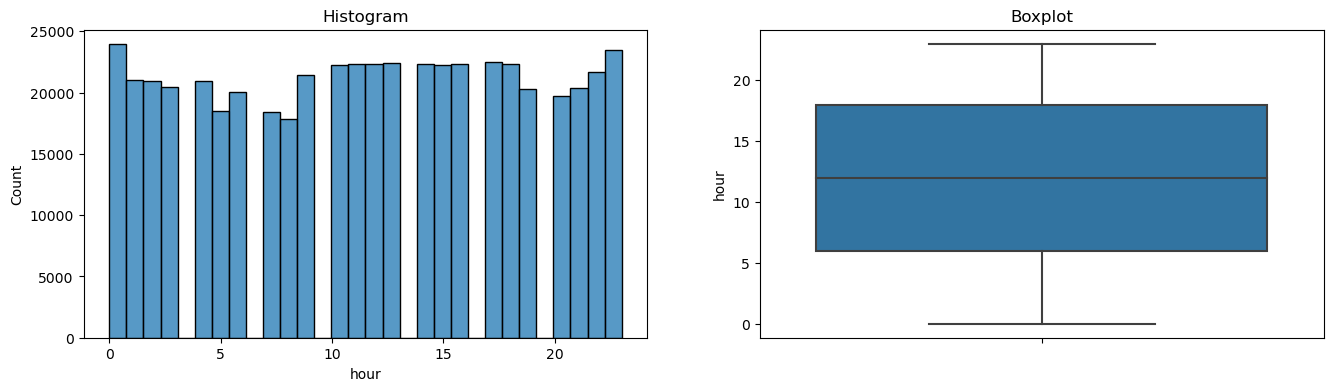


hour - After Capping


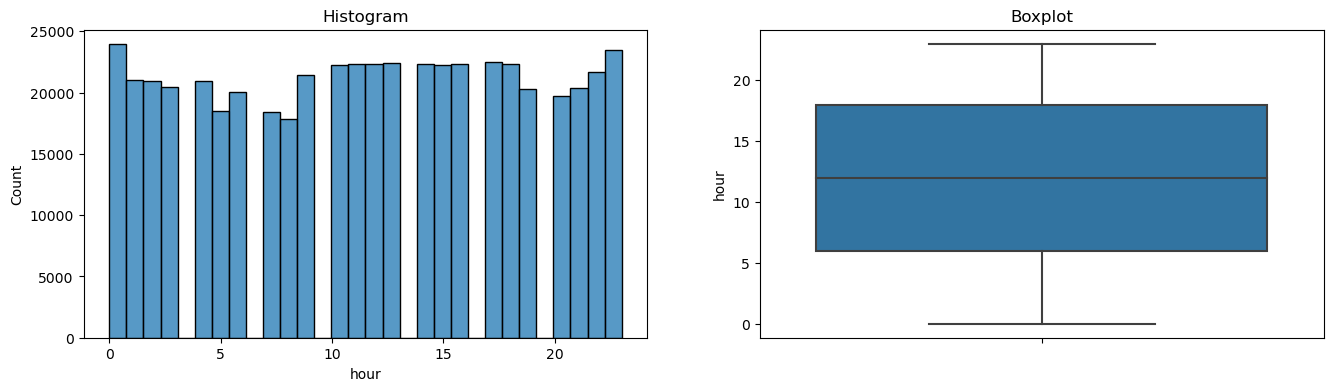

day - Before Capping


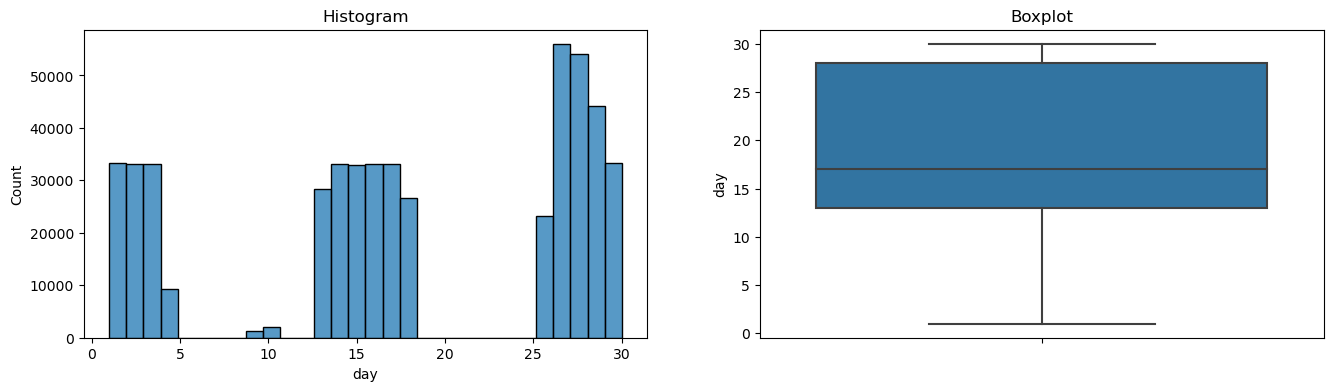


day - After Capping


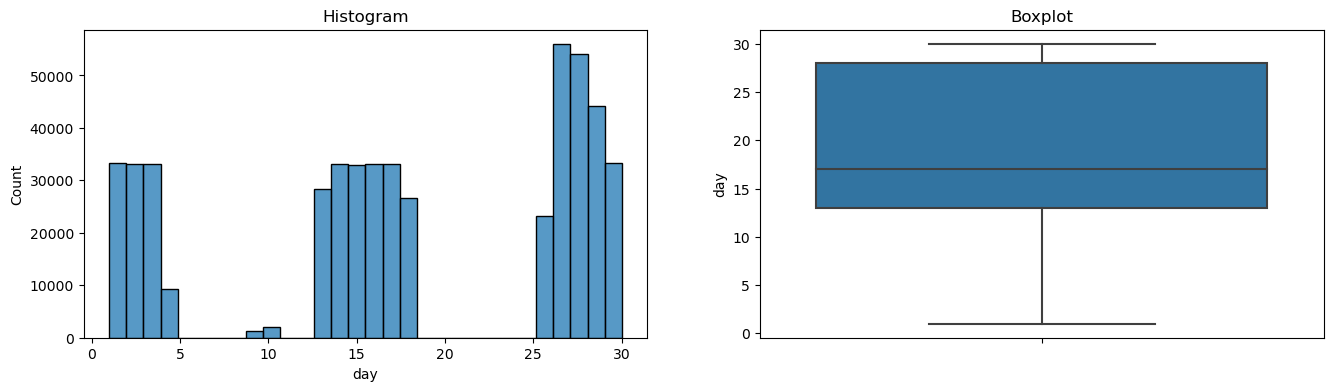

month - Before Capping


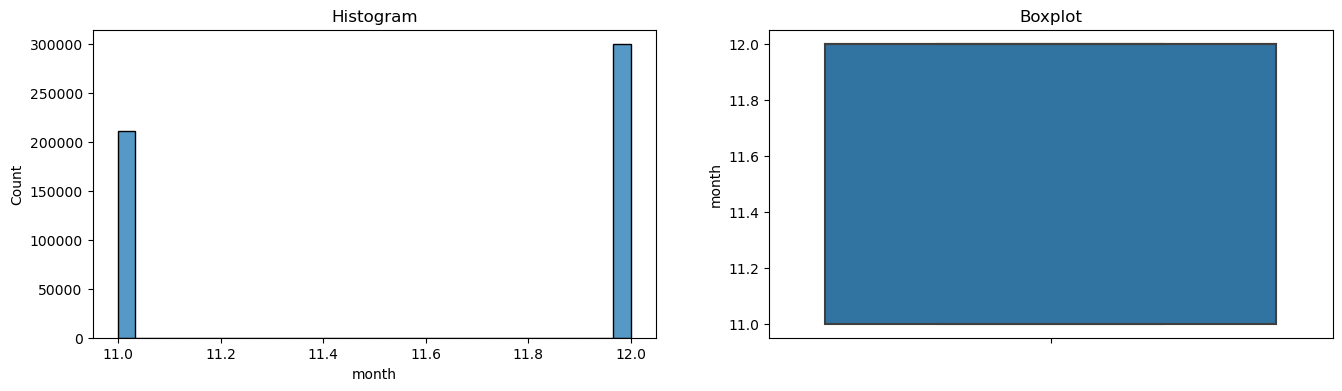


month - After Capping


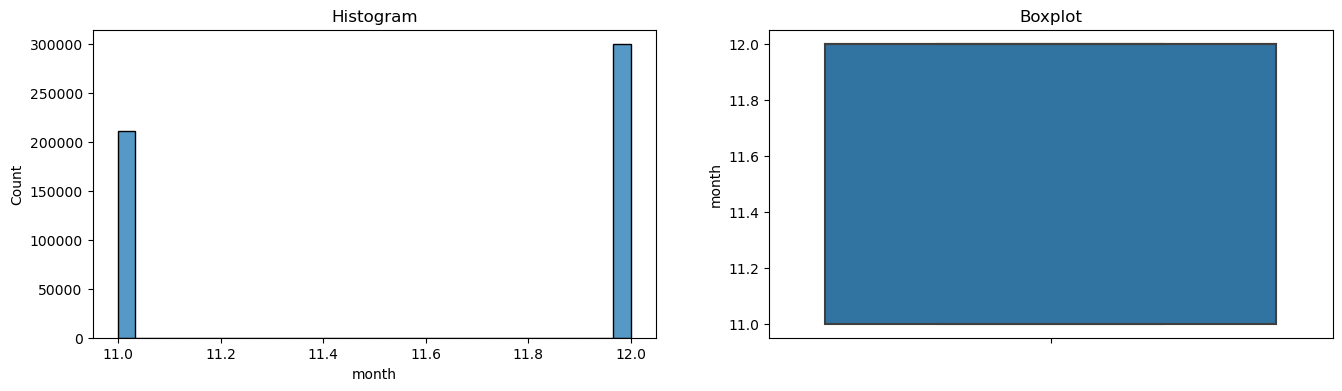

distance - Before Capping


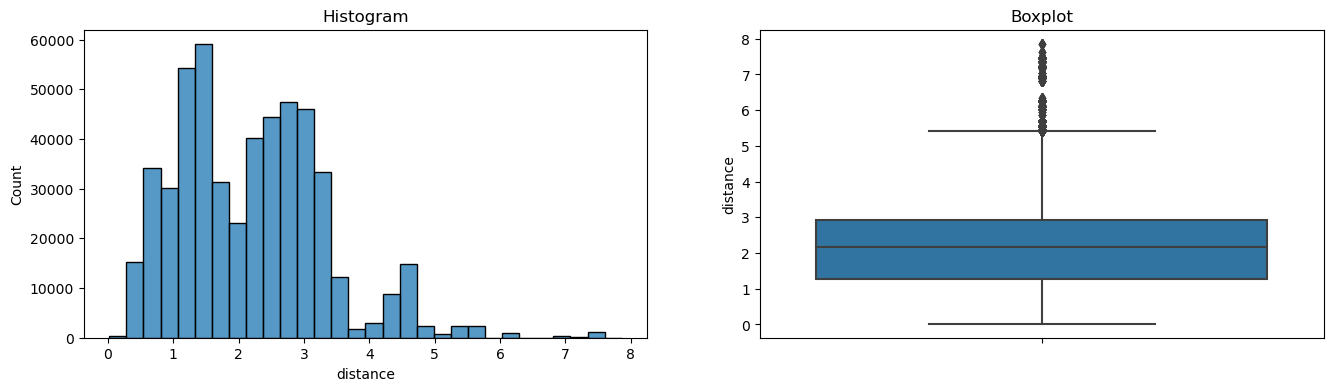


distance - After Capping


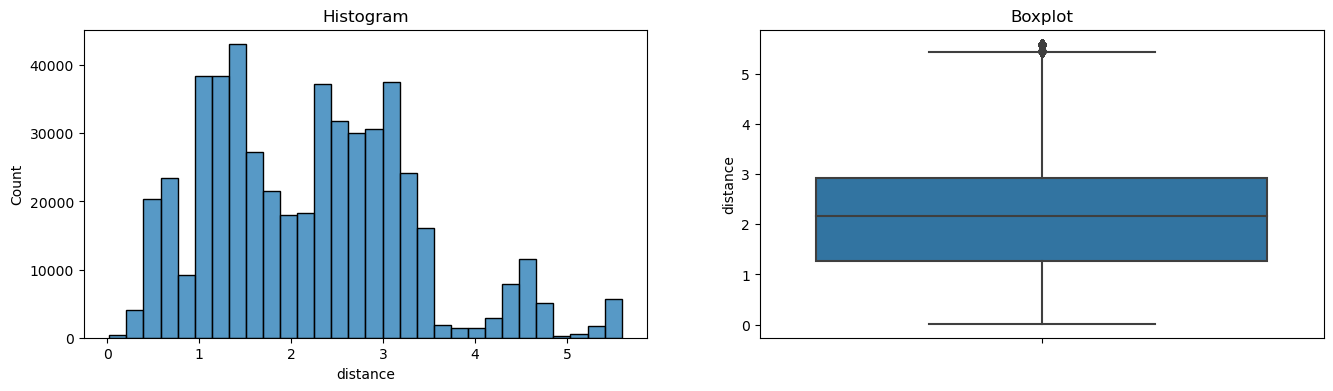

surge_multiplier - Before Capping


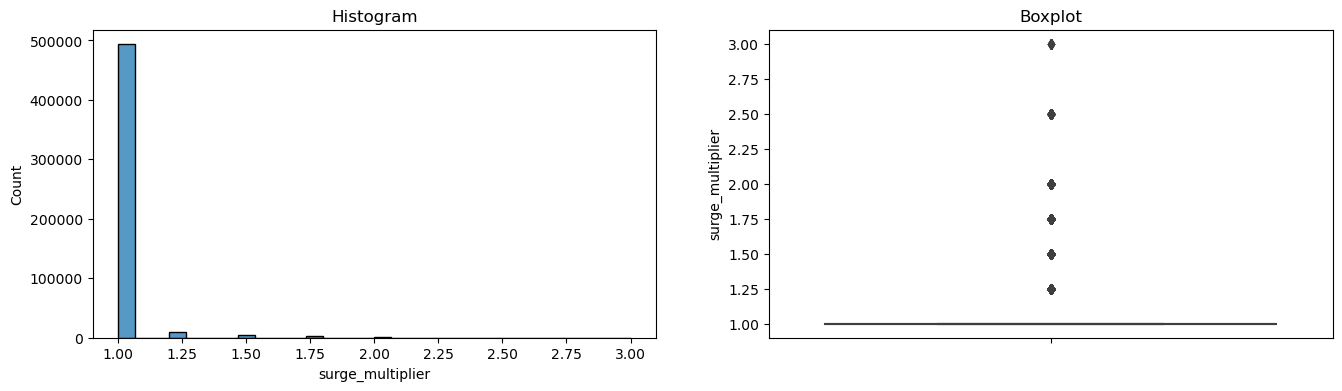


surge_multiplier - After Capping


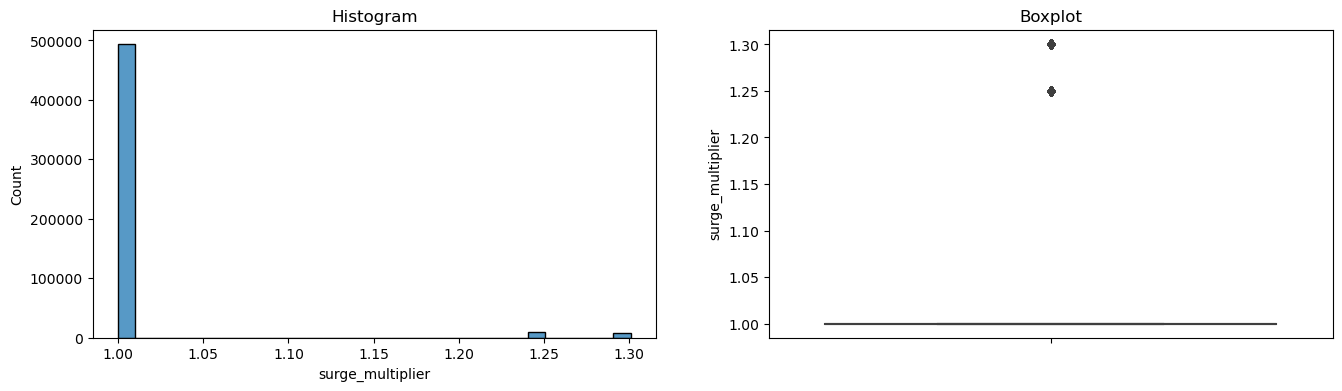

latitude - Before Capping


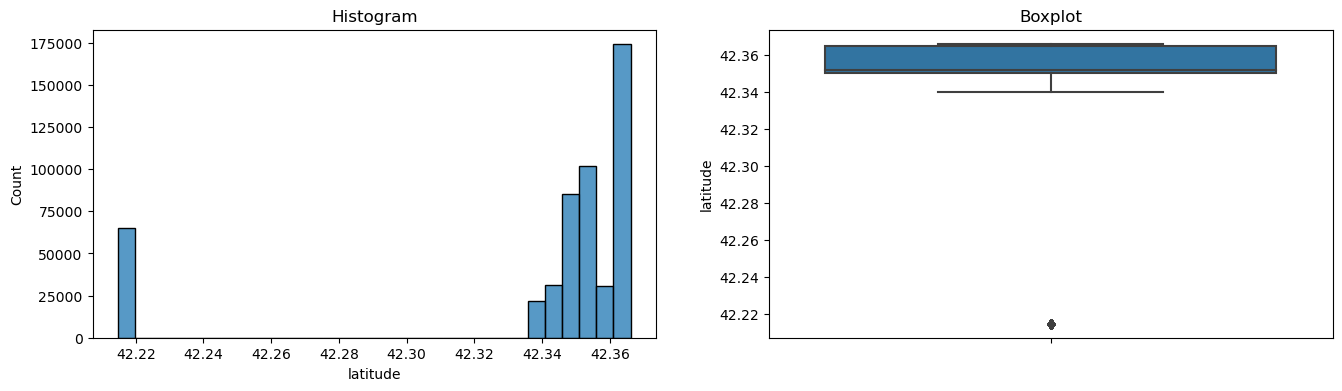


latitude - After Capping


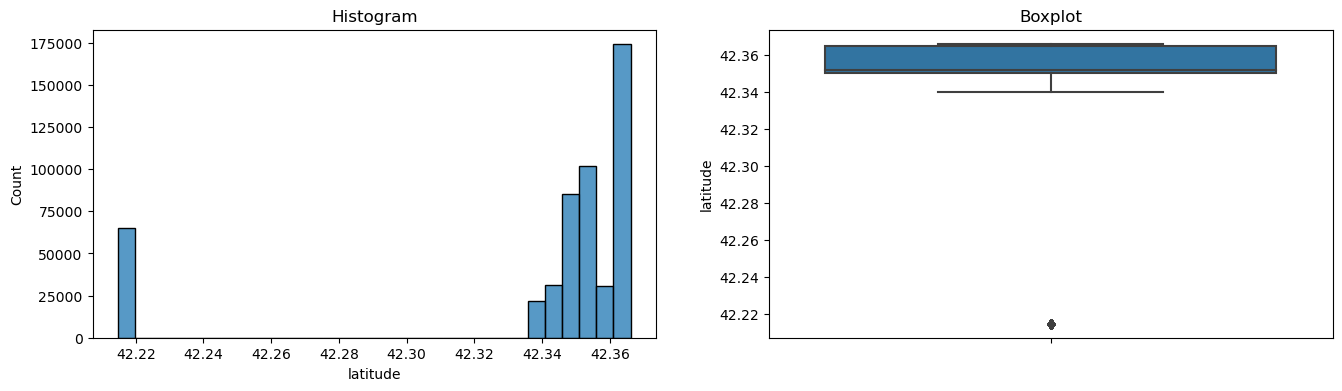

longitude - Before Capping


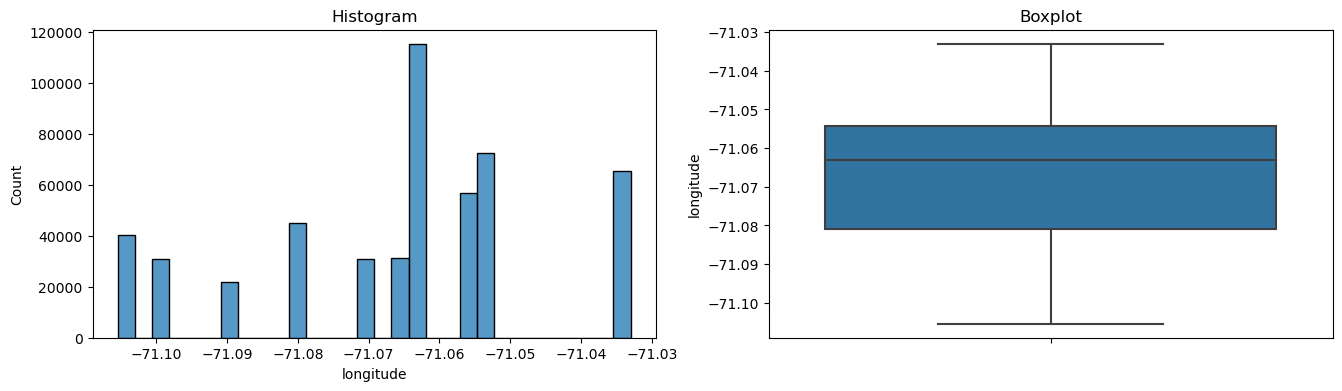


longitude - After Capping


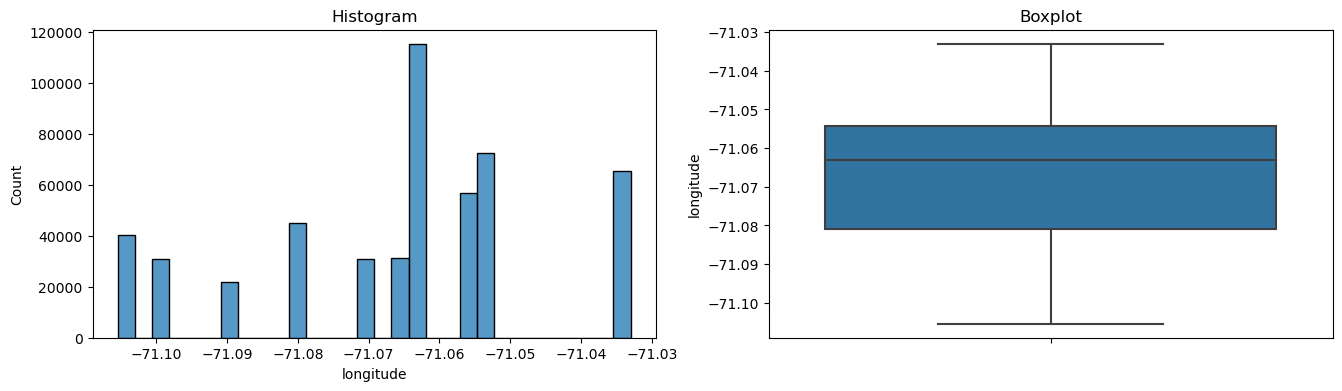

temperature - Before Capping


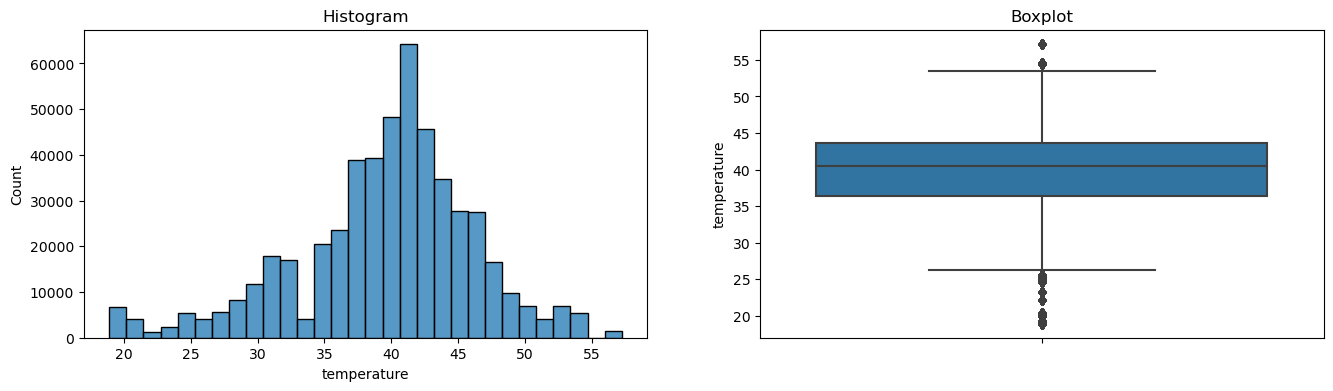


temperature - After Capping


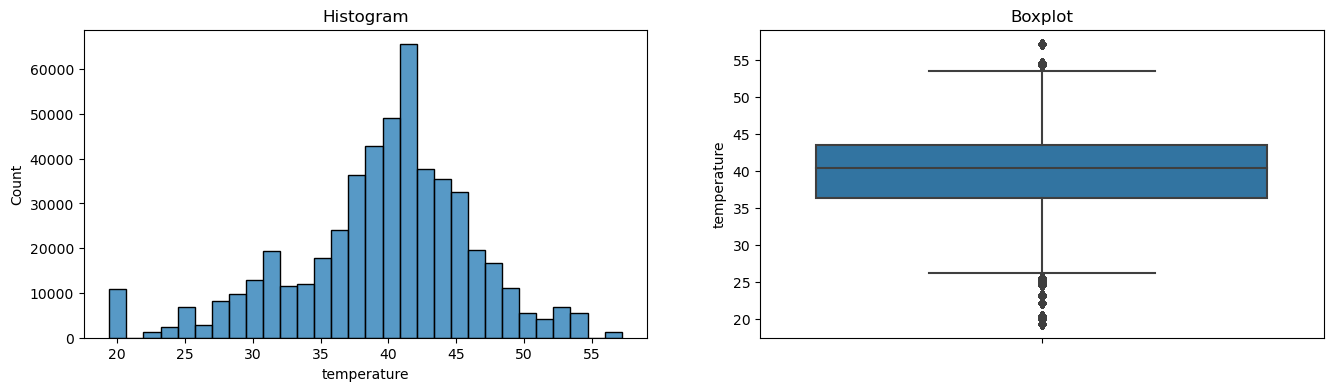

apparentTemperature - Before Capping


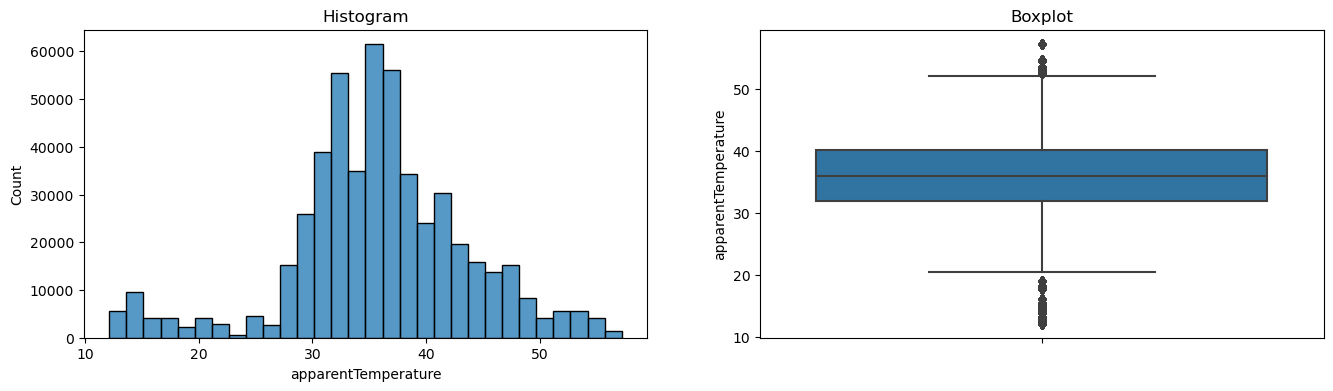


apparentTemperature - After Capping


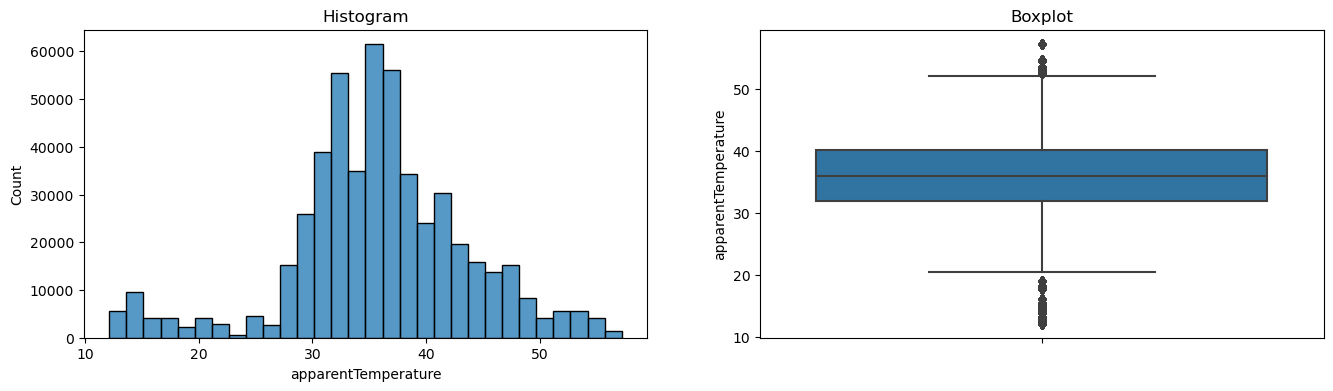

precipIntensity - Before Capping


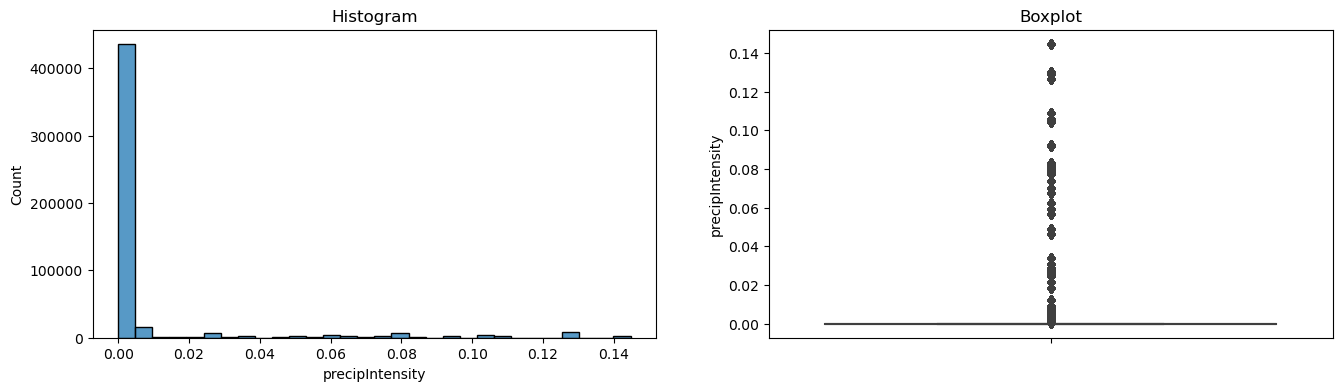


precipIntensity - After Capping


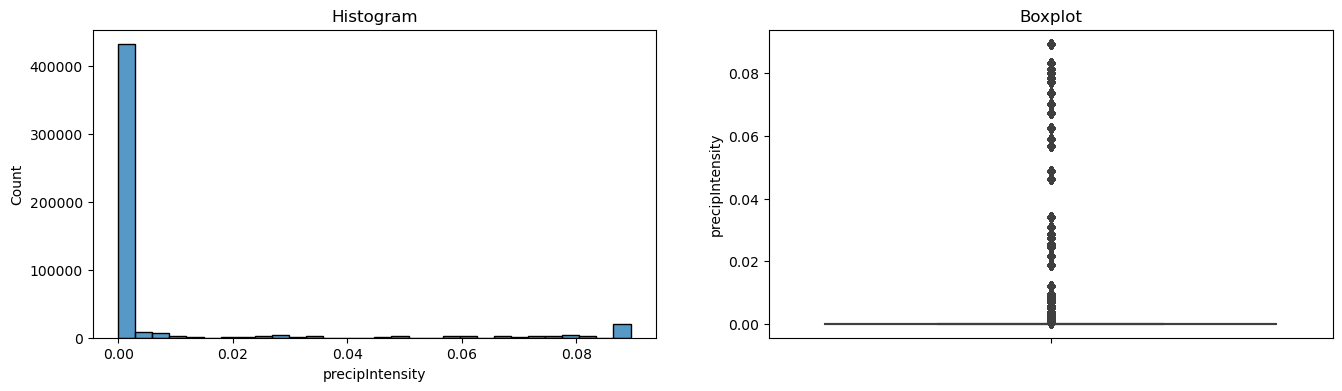

precipProbability - Before Capping


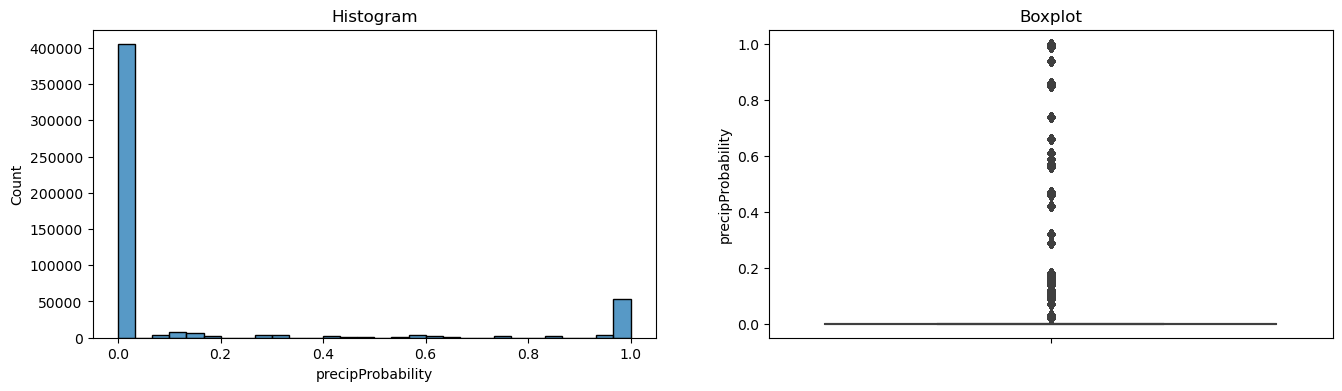


precipProbability - After Capping


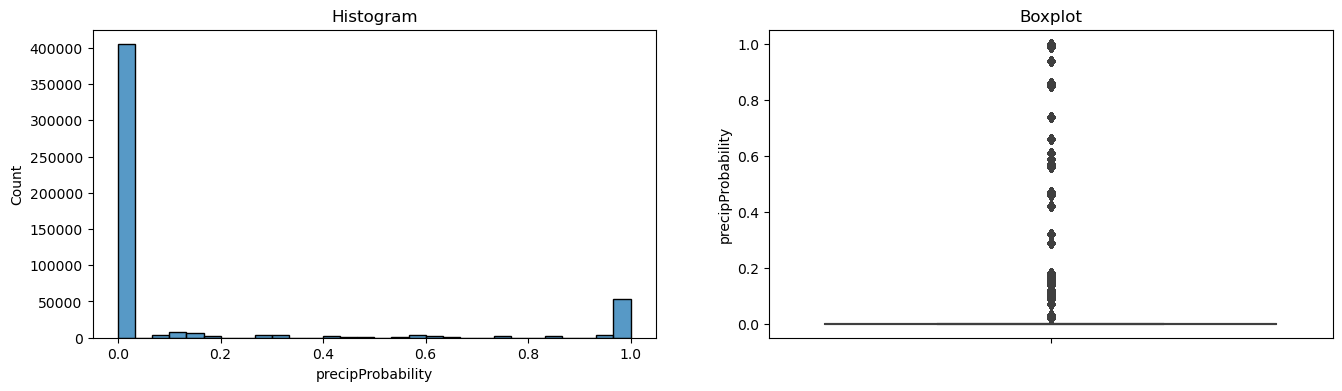

humidity - Before Capping


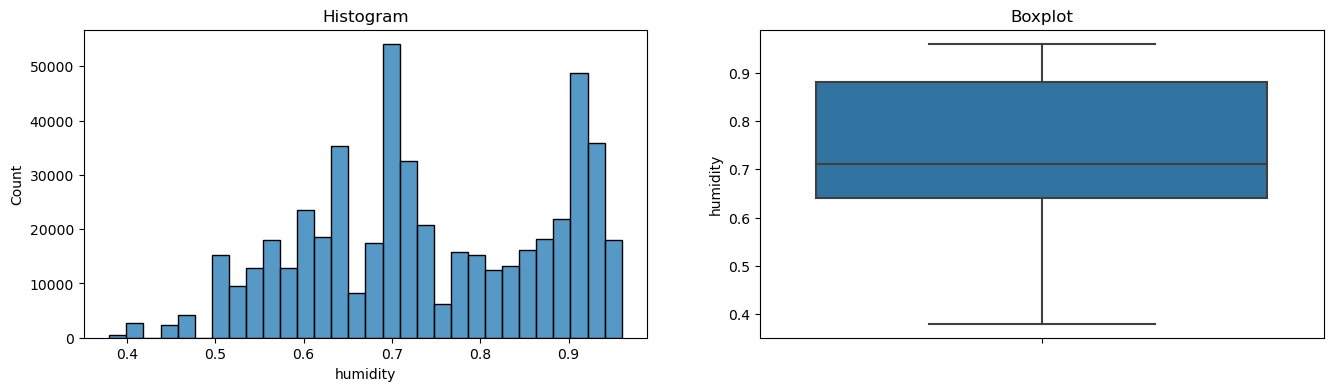


humidity - After Capping


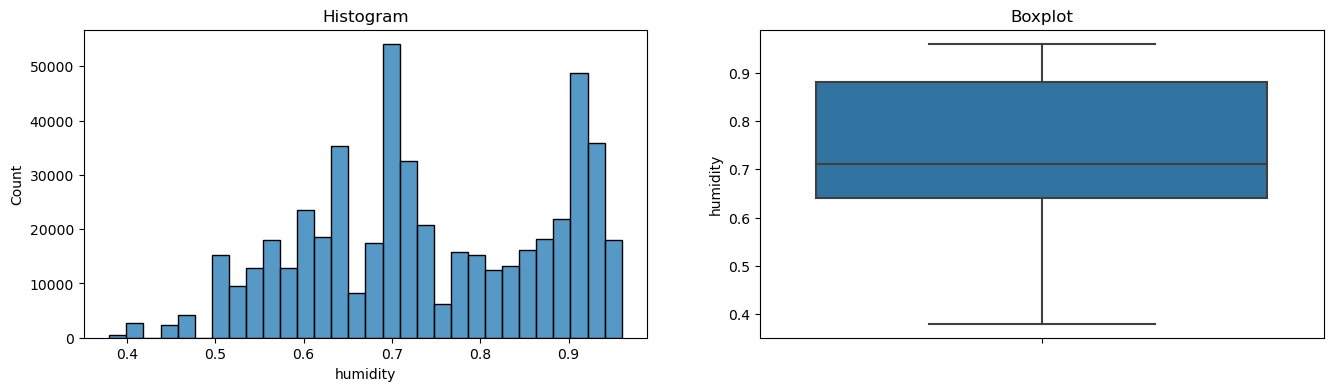

windSpeed - Before Capping


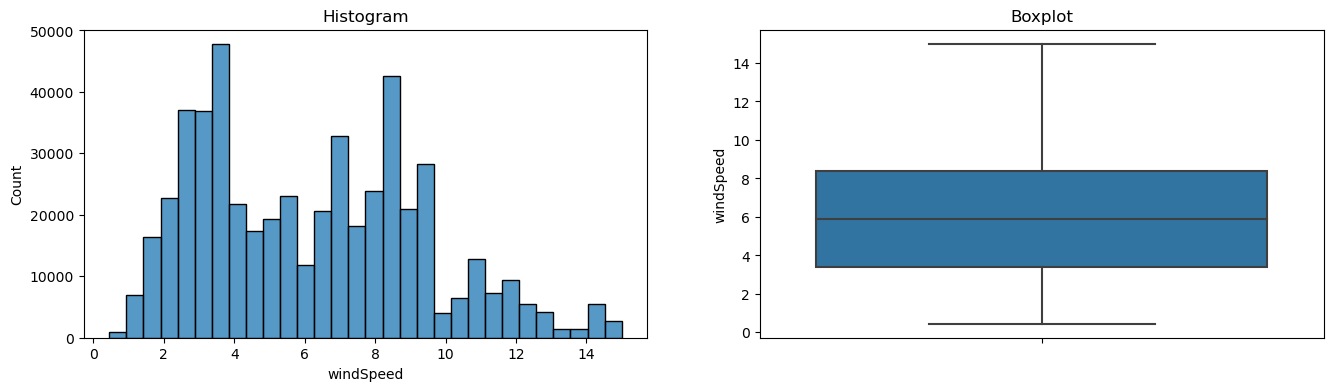


windSpeed - After Capping


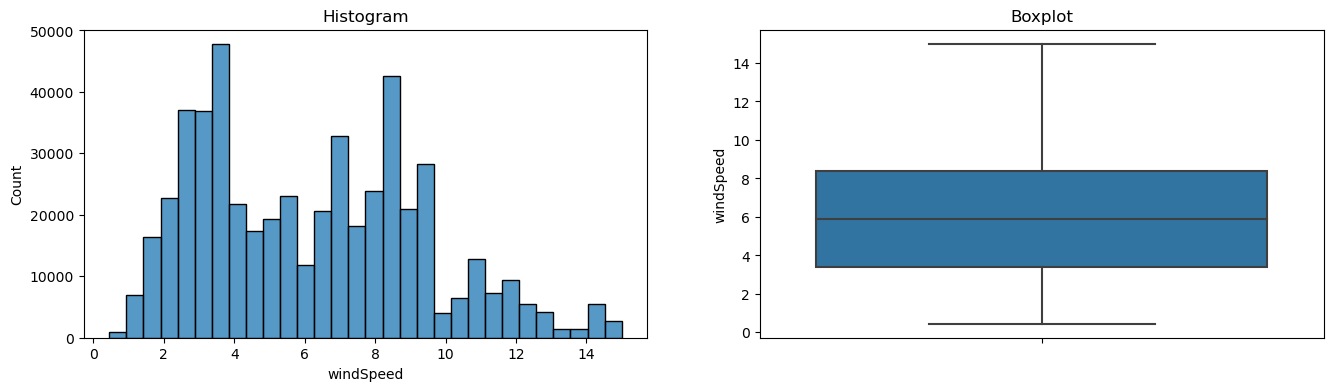

windGust - Before Capping


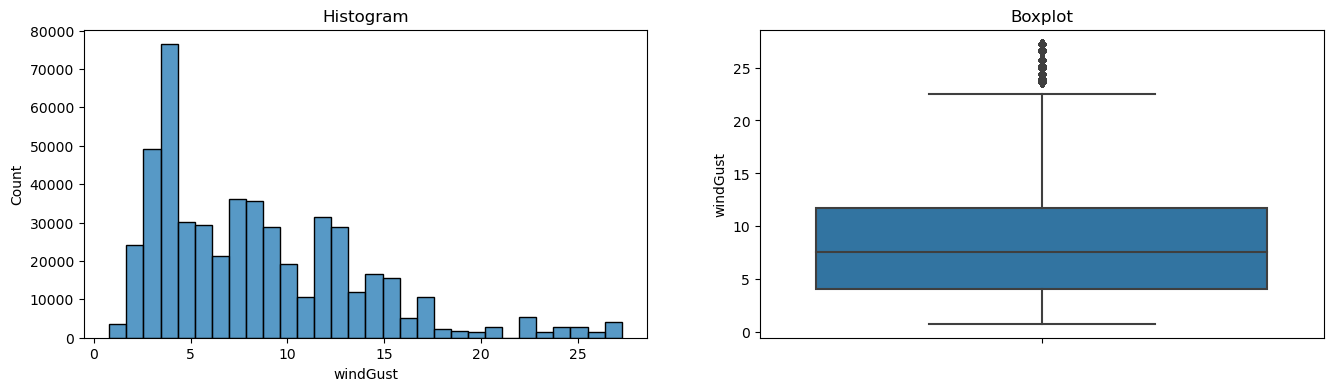


windGust - After Capping


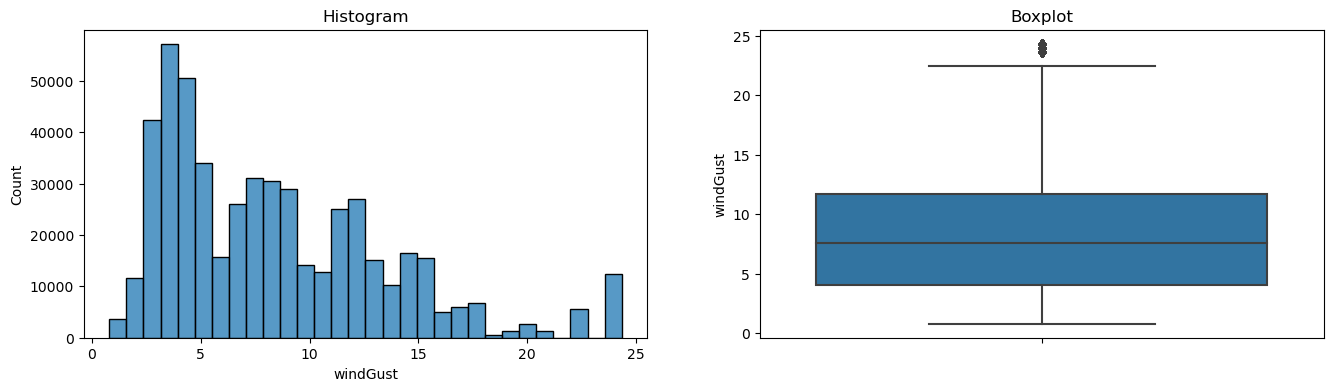

windGustTime - Before Capping


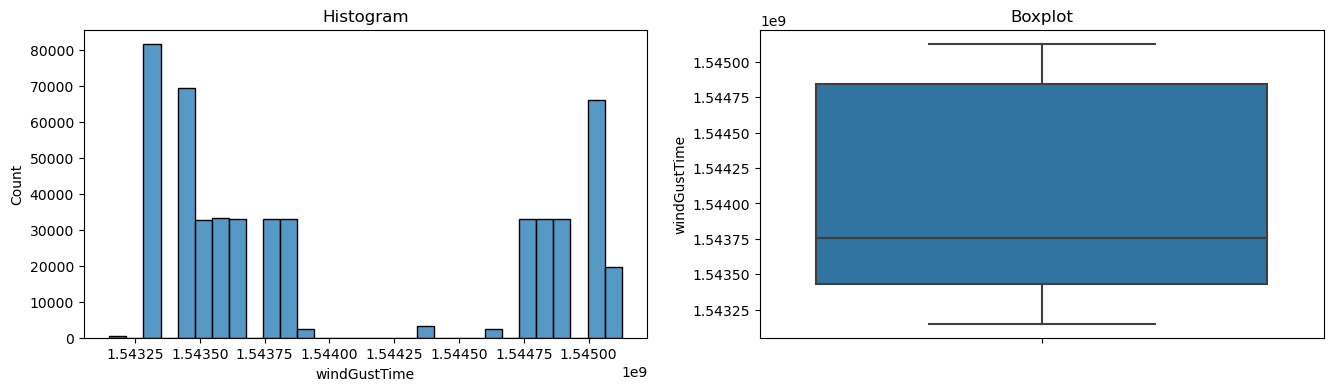


windGustTime - After Capping


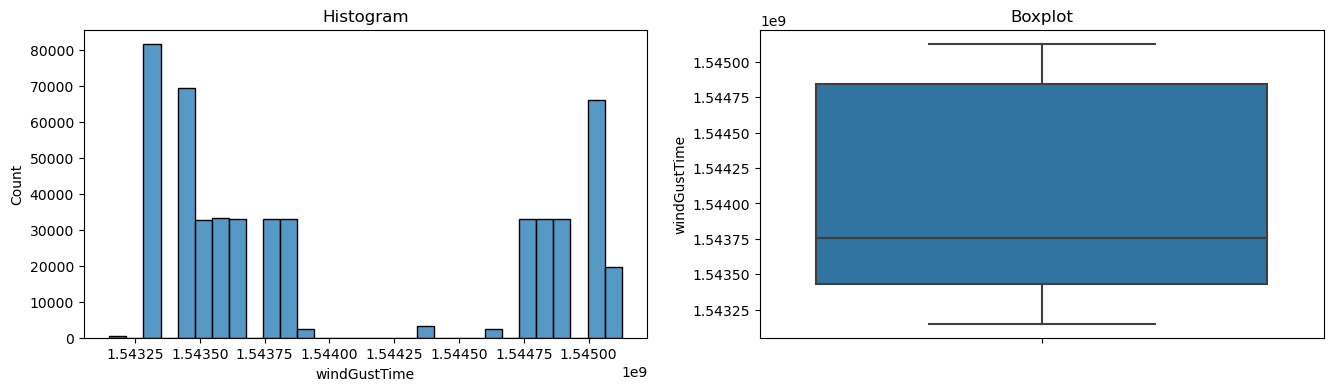

visibility - Before Capping


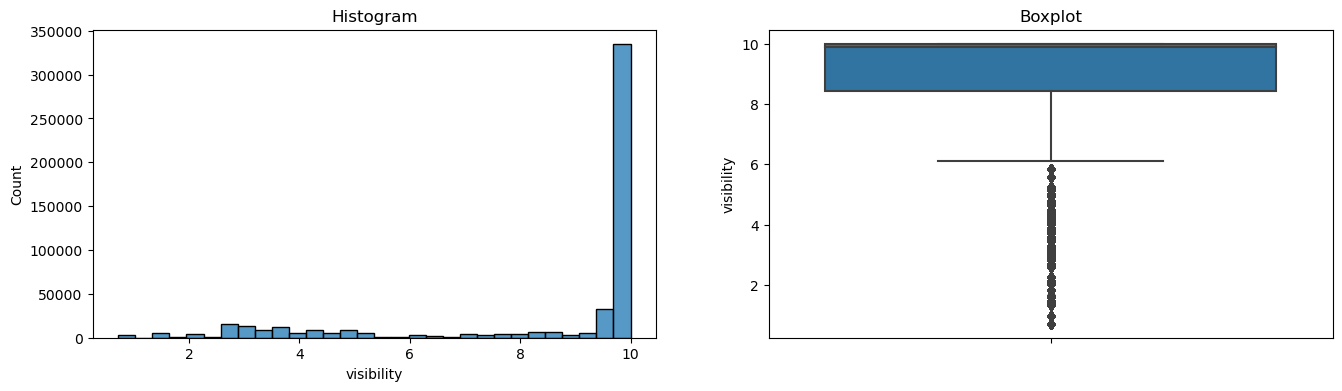


visibility - After Capping


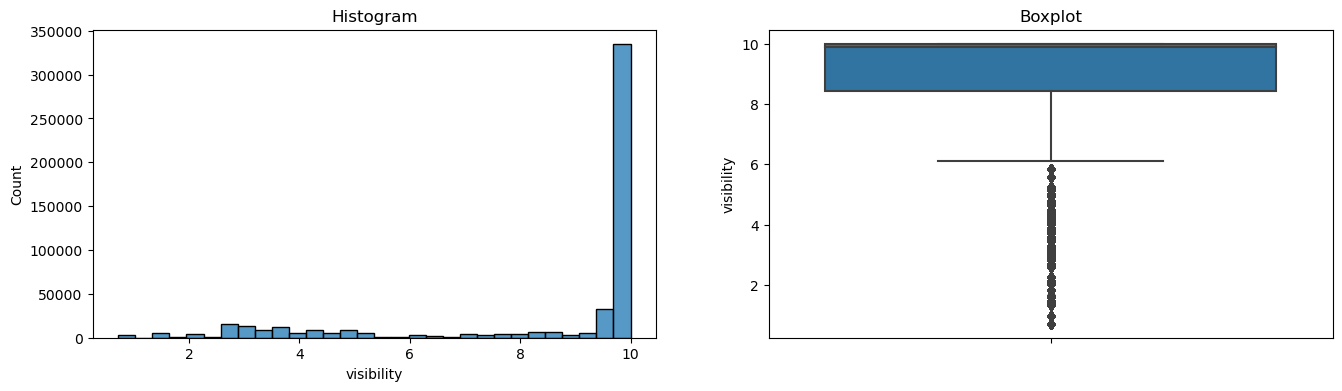

temperatureHigh - Before Capping


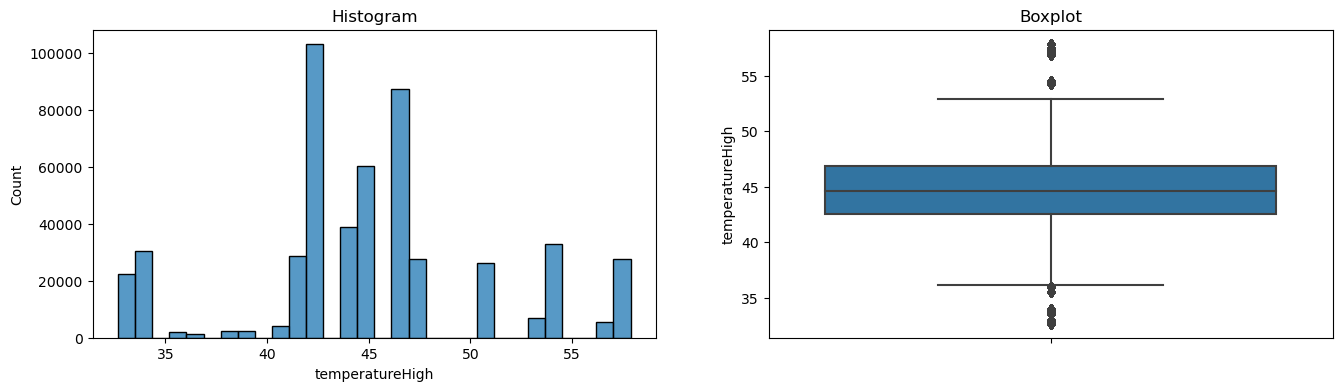


temperatureHigh - After Capping


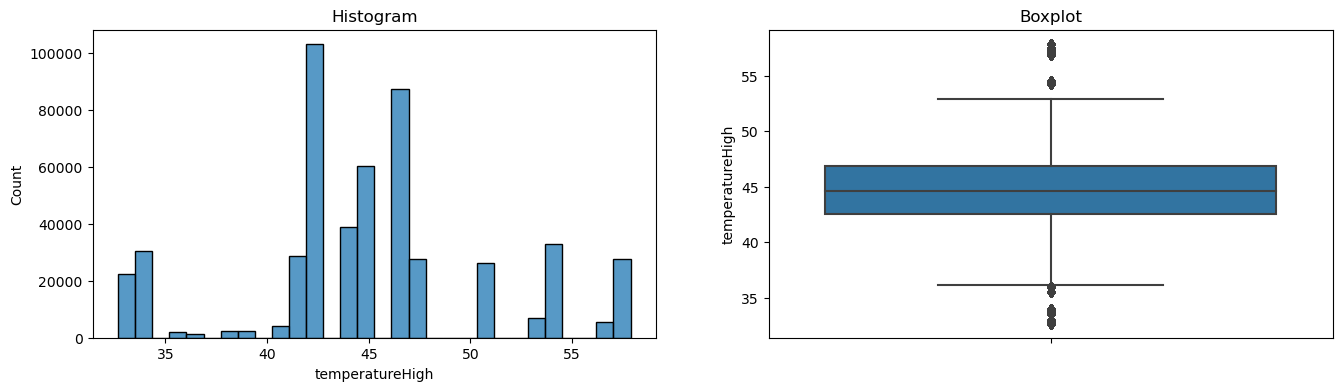

temperatureHighTime - Before Capping


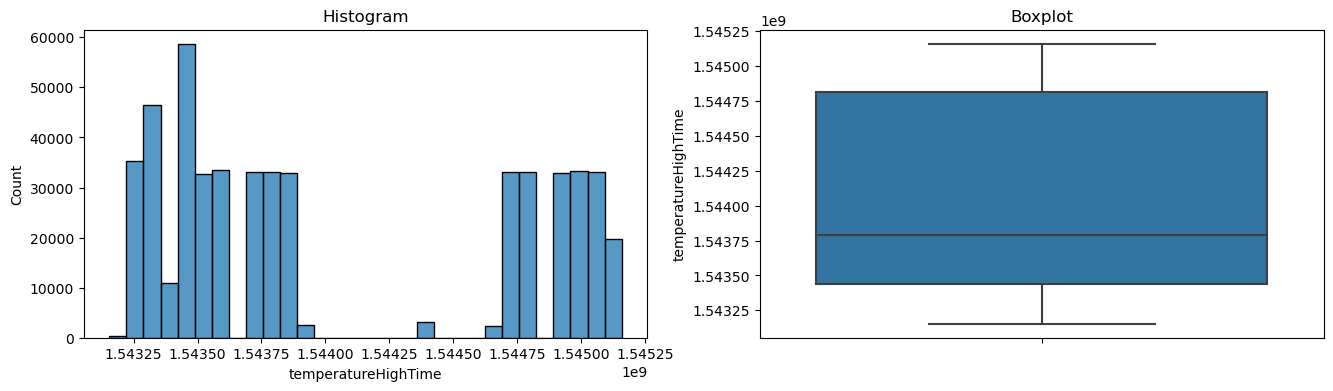


temperatureHighTime - After Capping


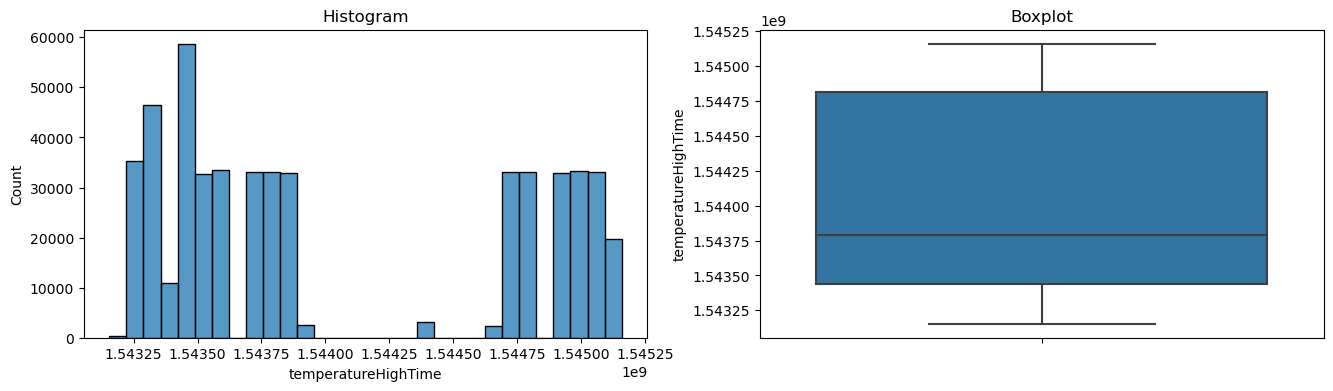

temperatureLow - Before Capping


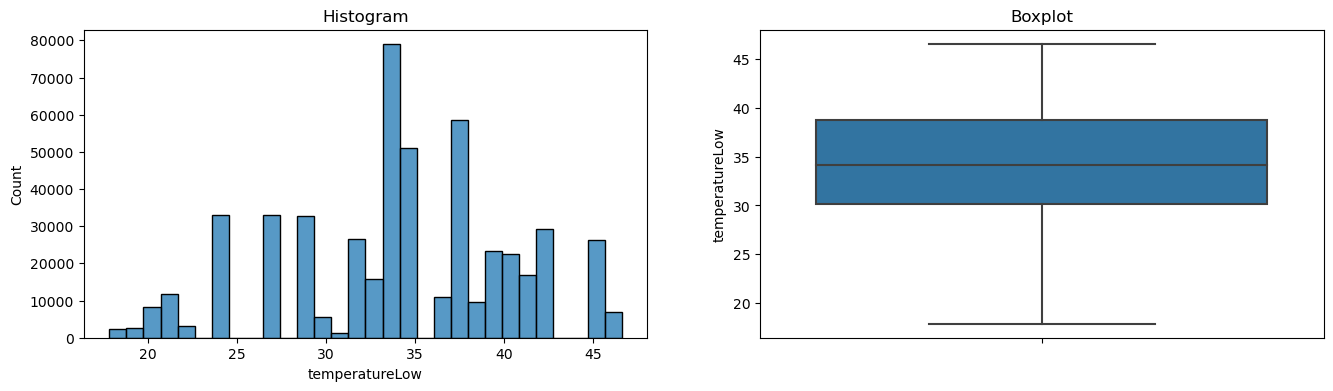


temperatureLow - After Capping


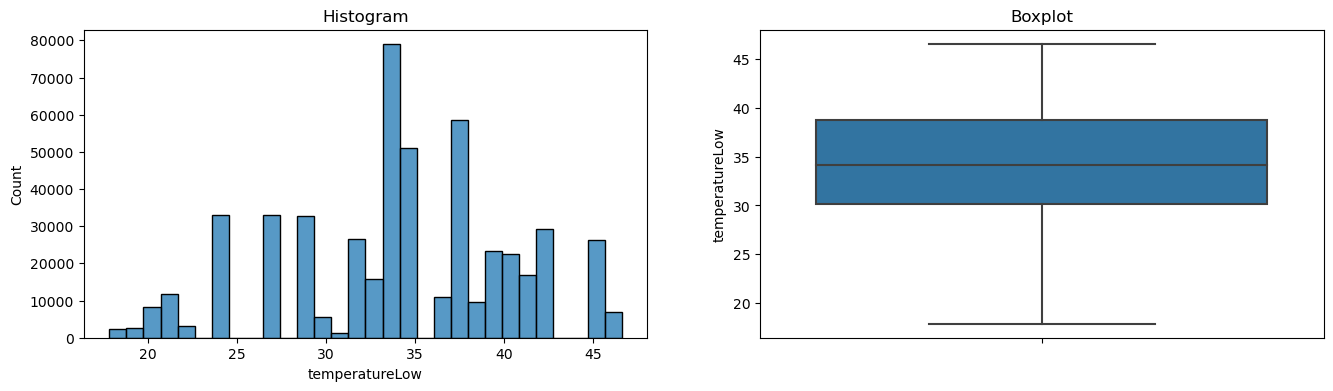

temperatureLowTime - Before Capping


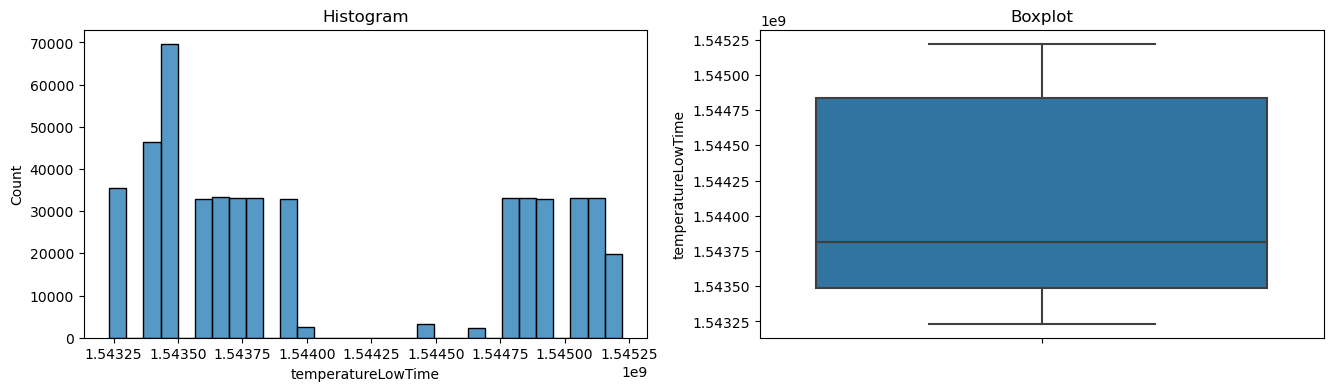


temperatureLowTime - After Capping


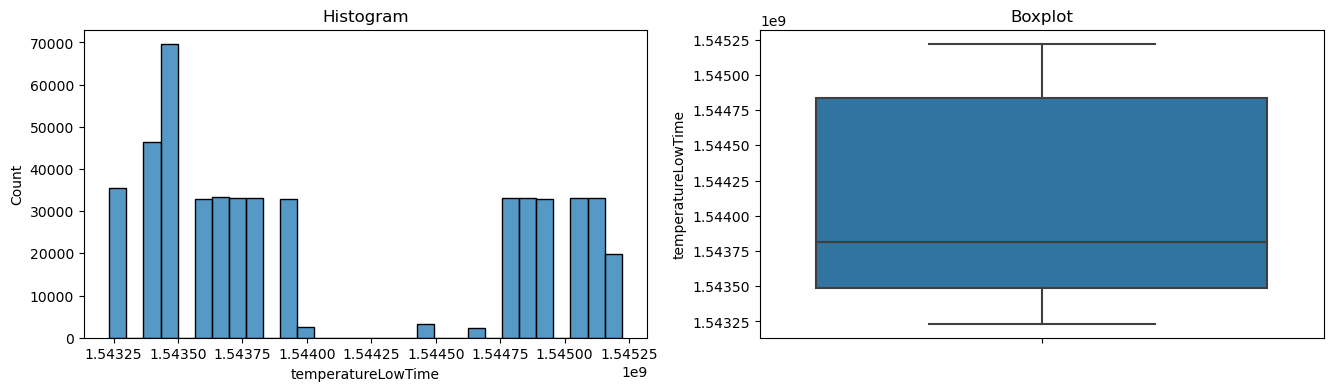

apparentTemperatureHigh - Before Capping


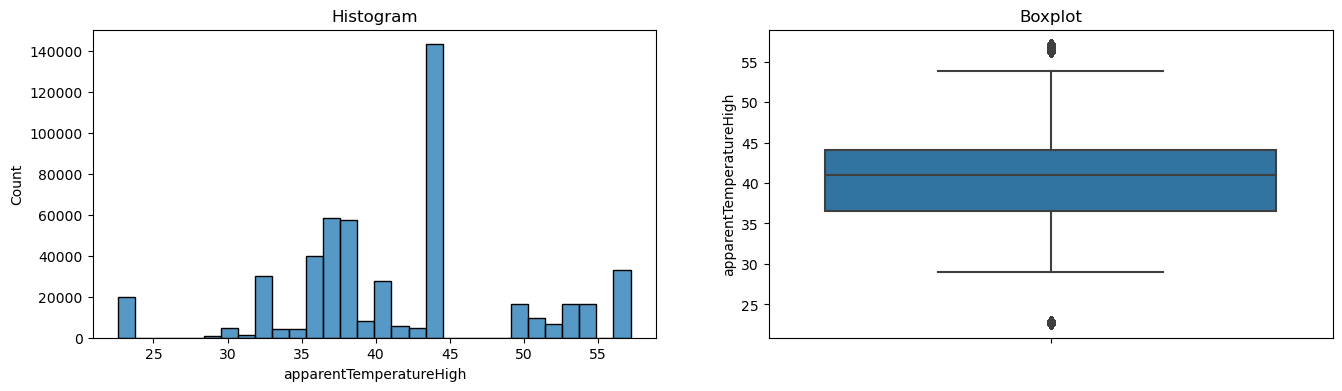


apparentTemperatureHigh - After Capping


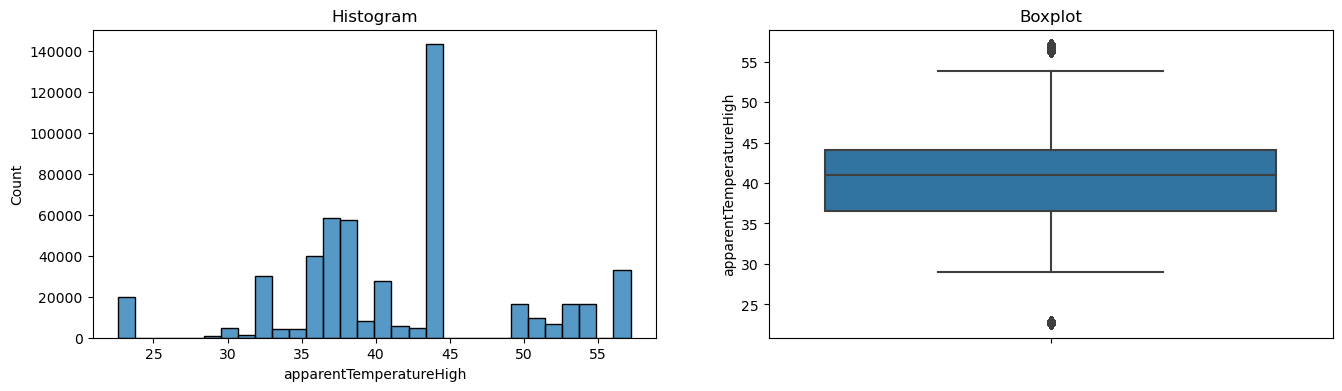

apparentTemperatureHighTime - Before Capping


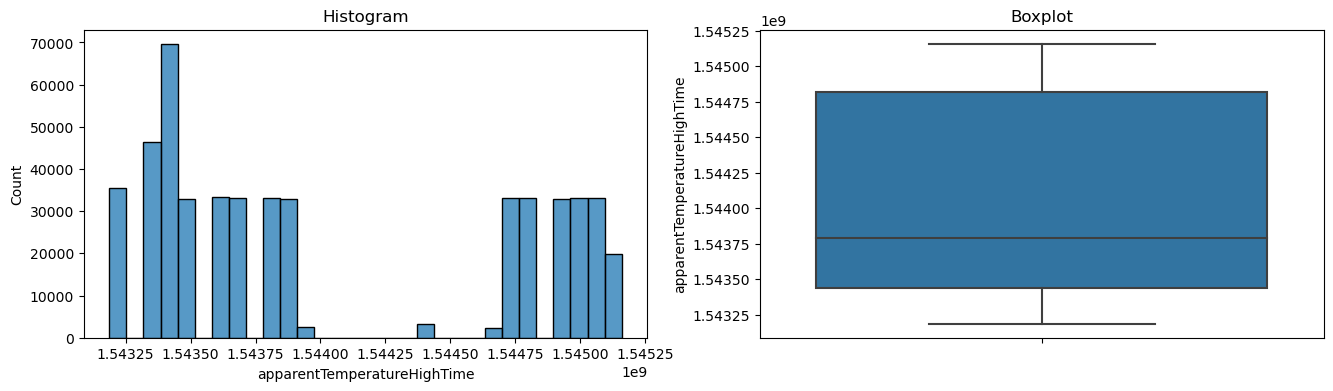


apparentTemperatureHighTime - After Capping


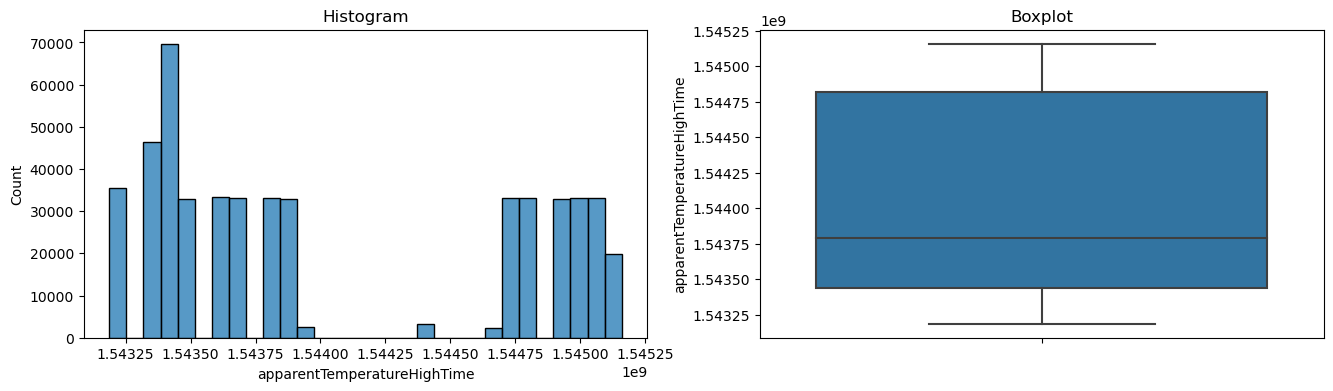

apparentTemperatureLow - Before Capping


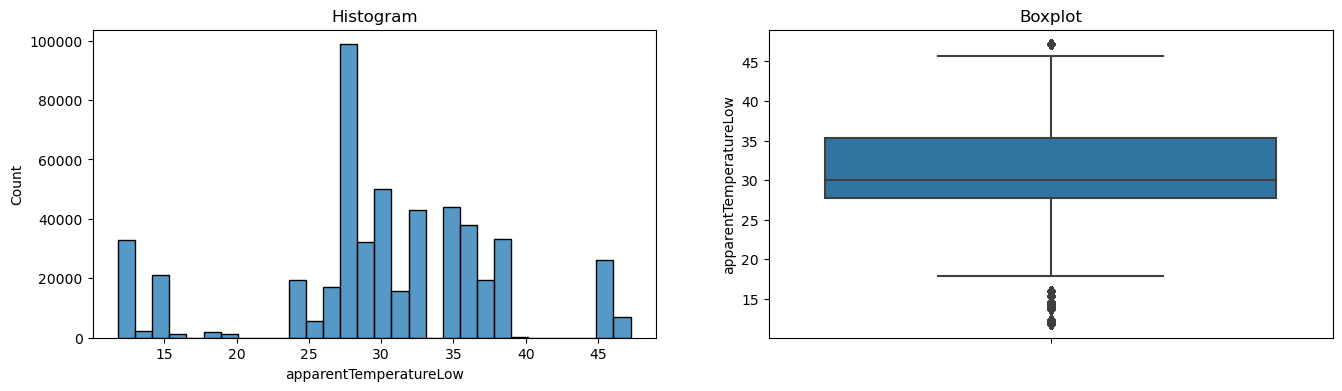


apparentTemperatureLow - After Capping


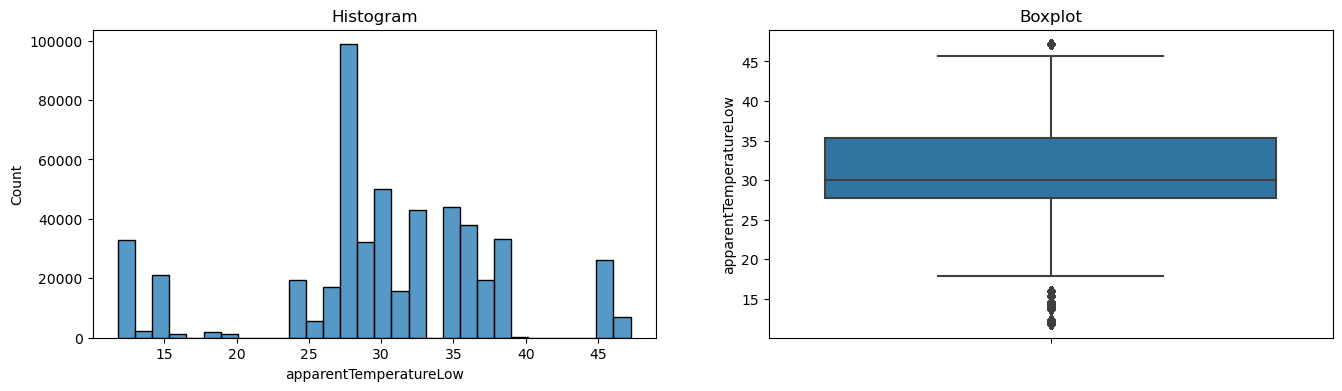

apparentTemperatureLowTime - Before Capping


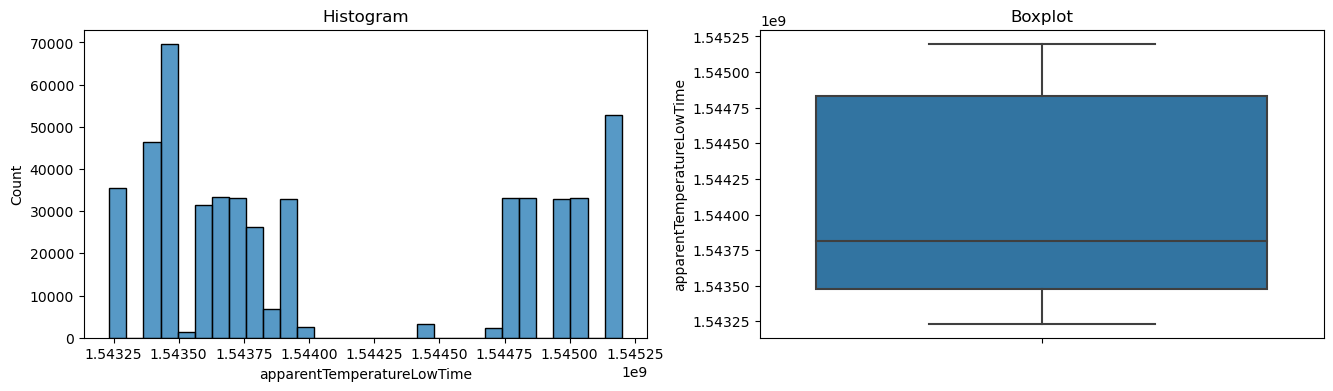


apparentTemperatureLowTime - After Capping


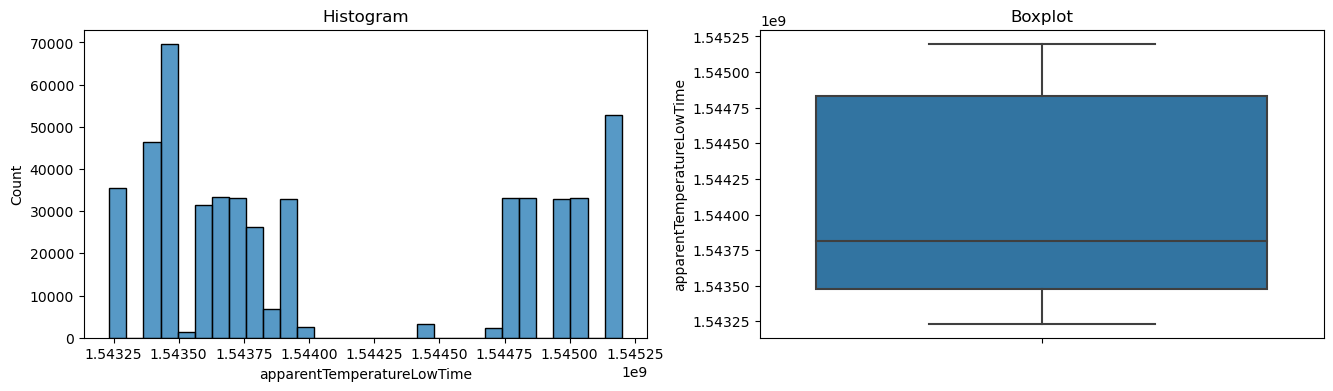

dewPoint - Before Capping


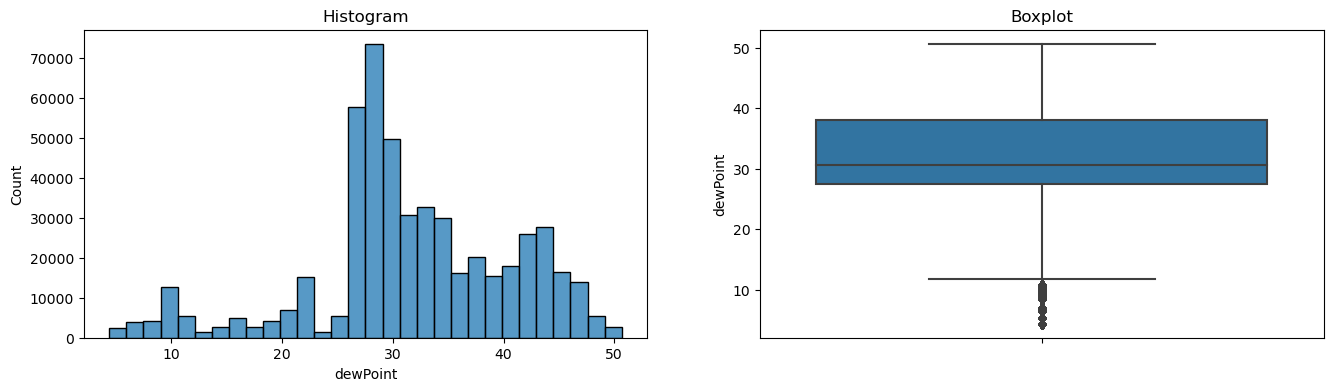


dewPoint - After Capping


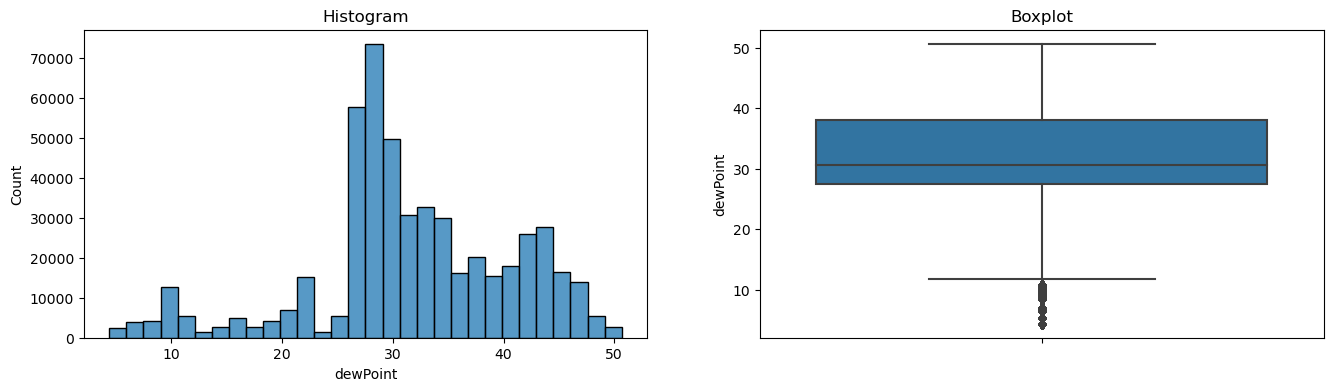

pressure - Before Capping


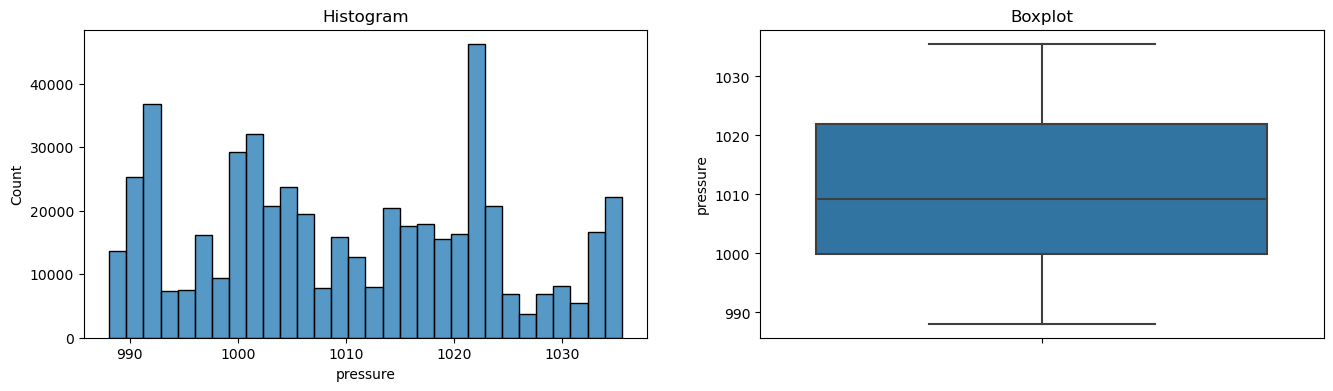


pressure - After Capping


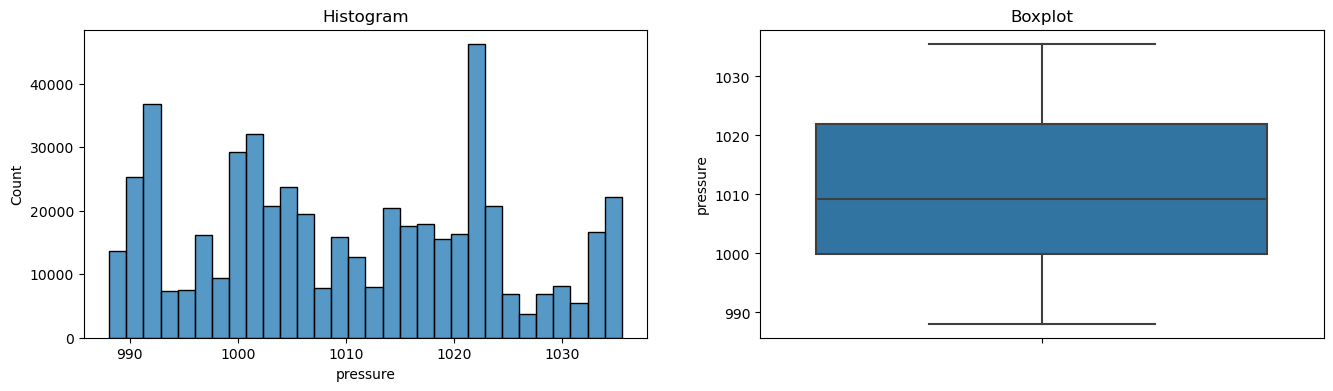

windBearing - Before Capping


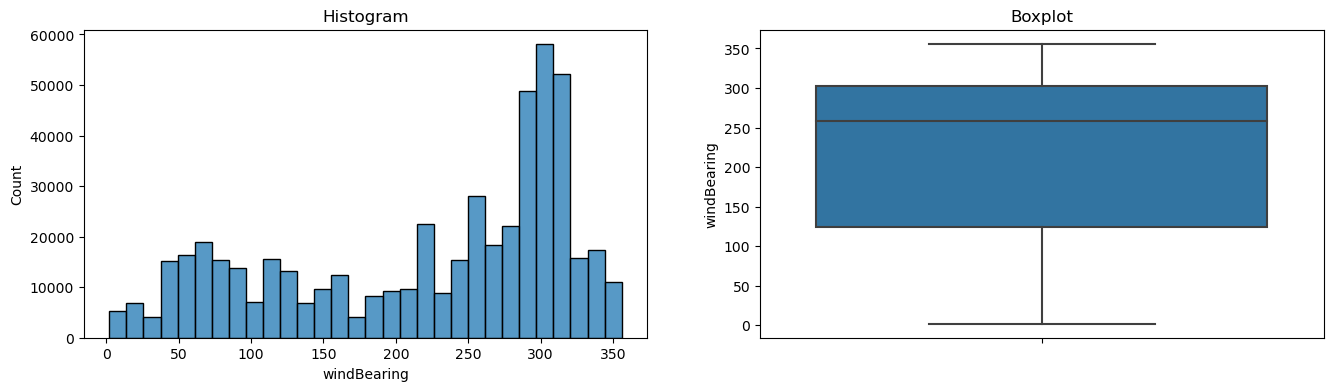


windBearing - After Capping


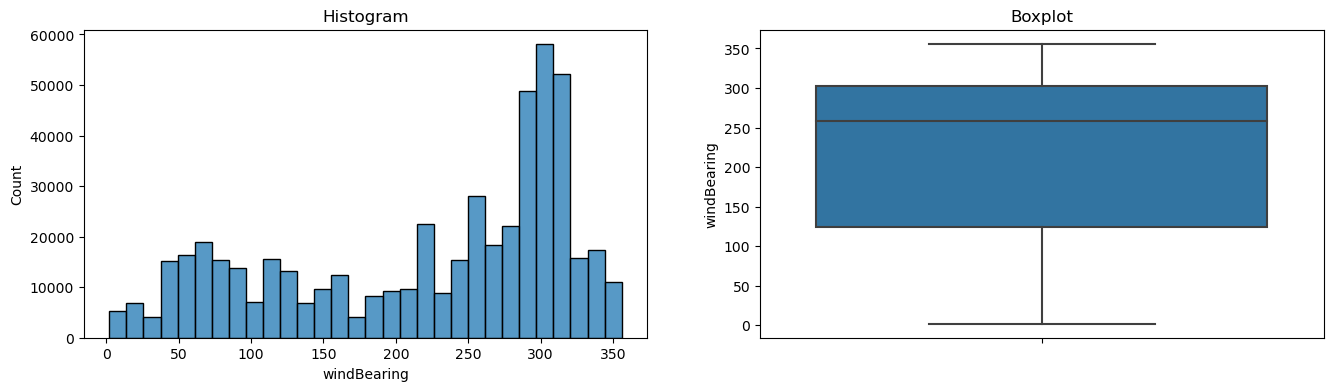

cloudCover - Before Capping


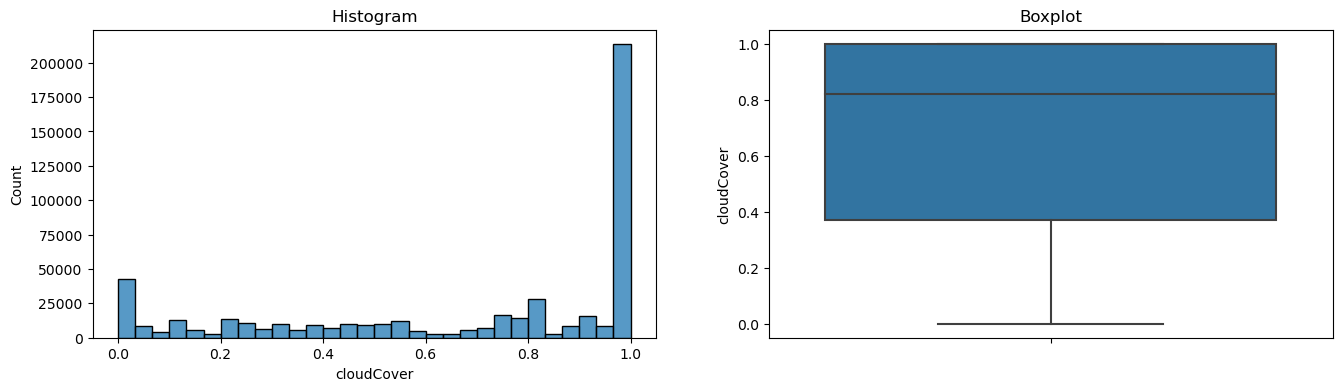


cloudCover - After Capping


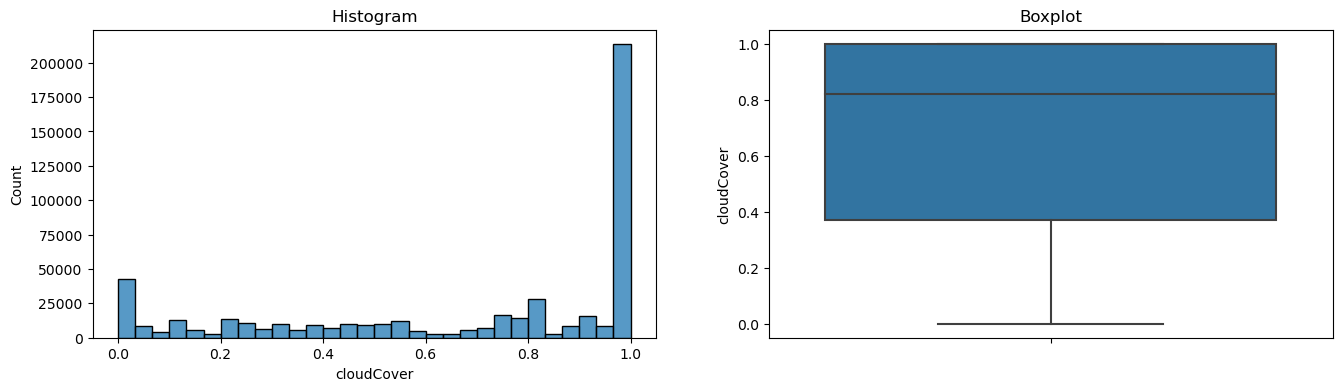

uvIndex - Before Capping


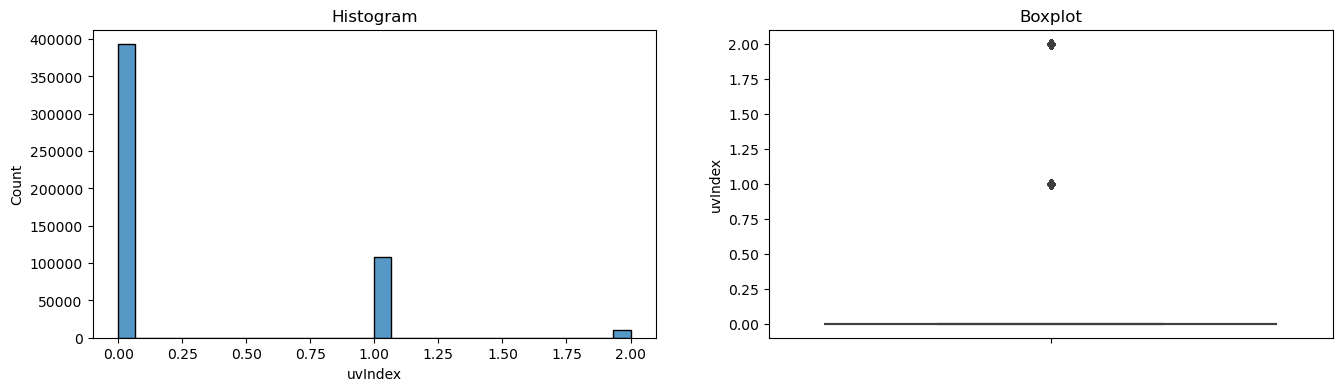


uvIndex - After Capping


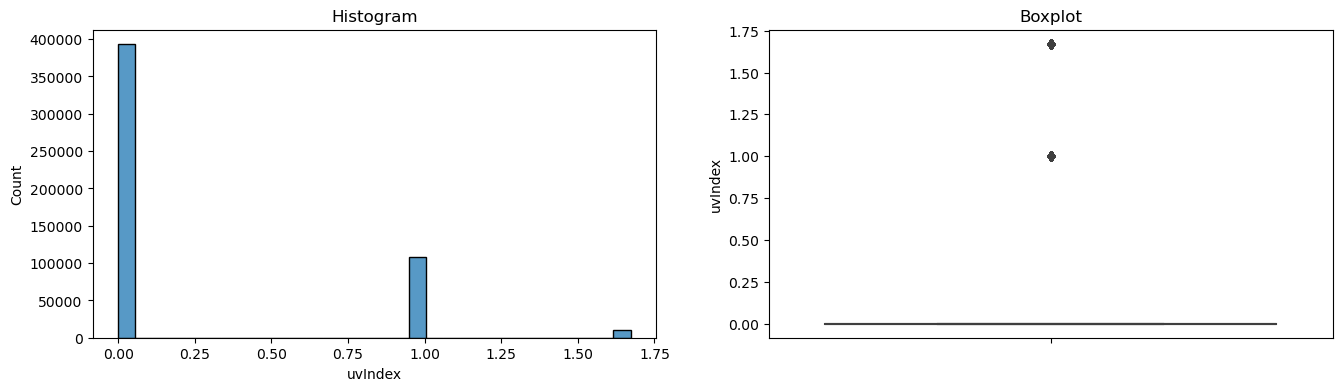

visibility.1 - Before Capping


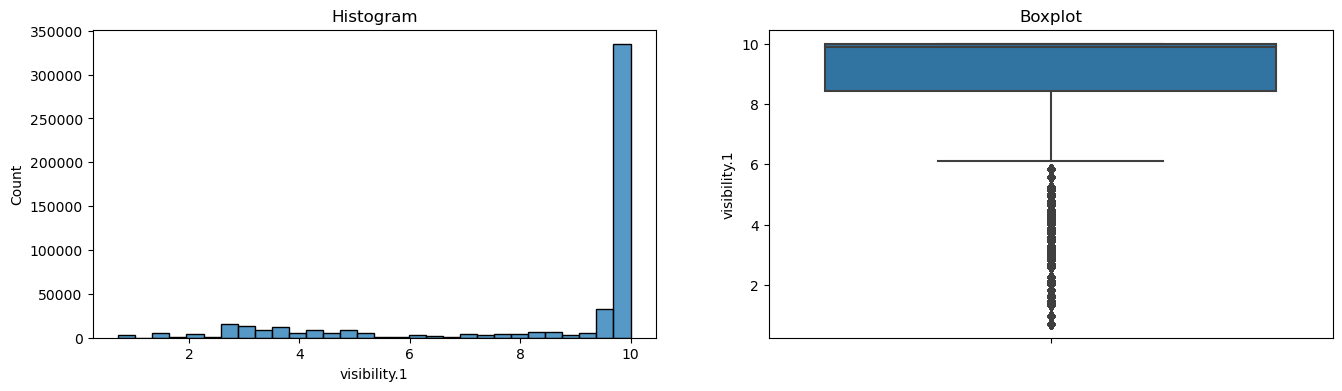


visibility.1 - After Capping


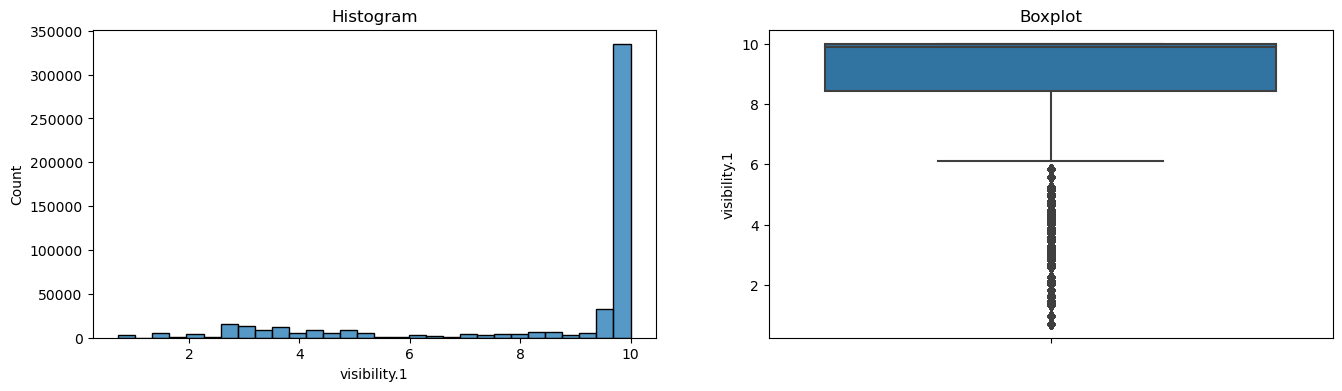

ozone - Before Capping


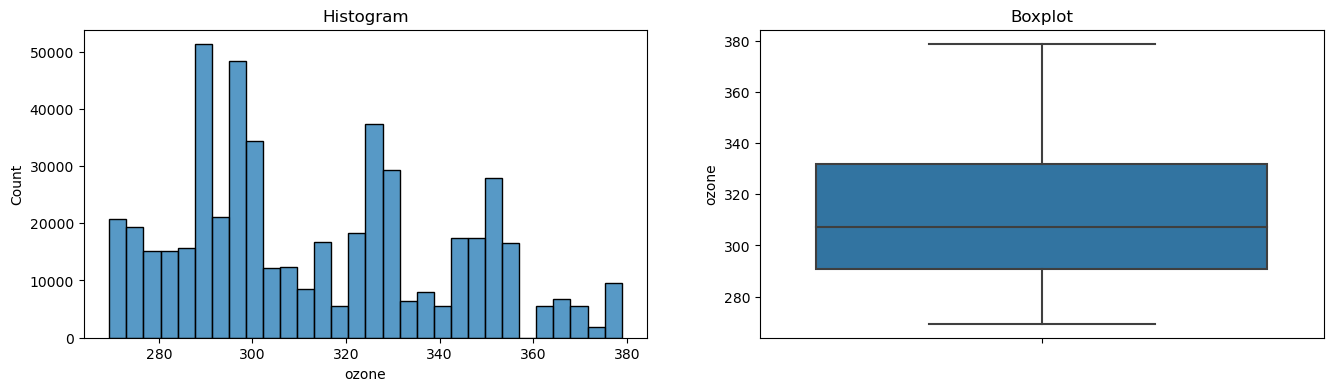


ozone - After Capping


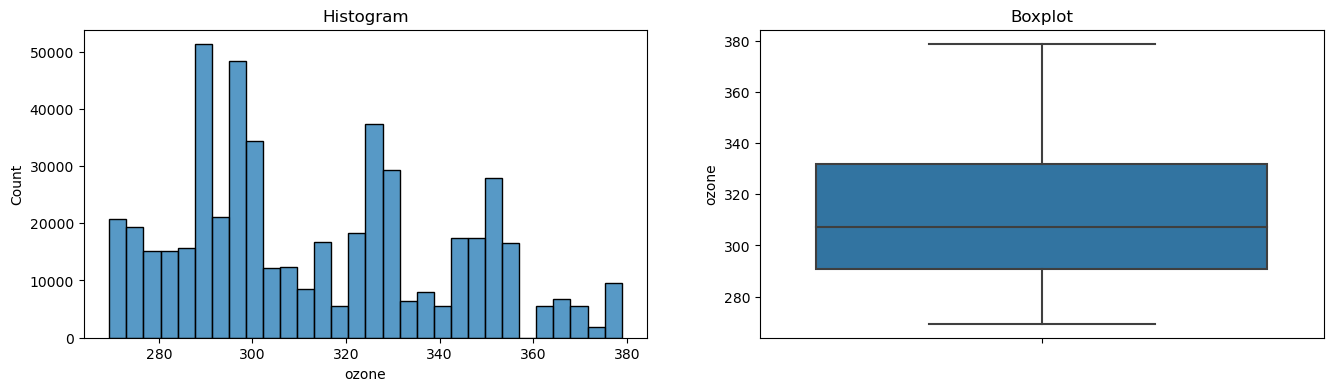

sunriseTime - Before Capping


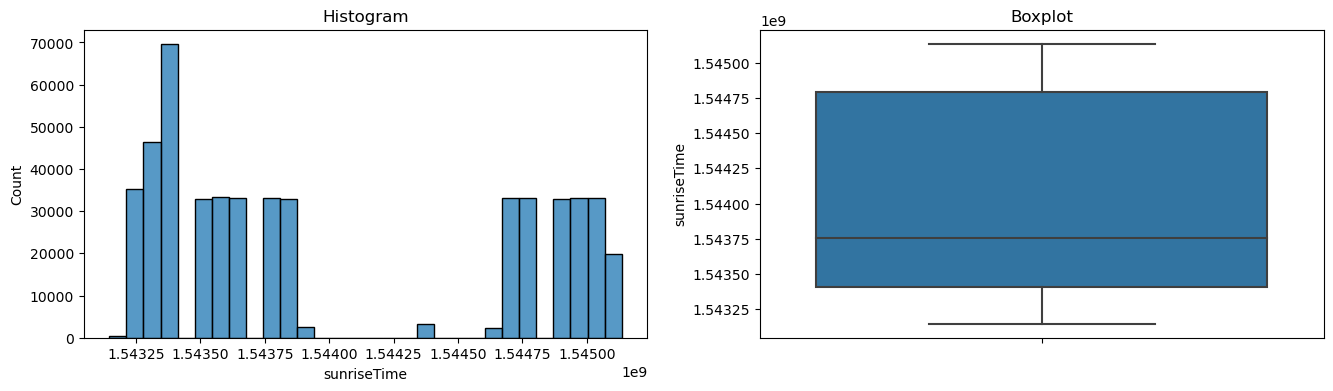


sunriseTime - After Capping


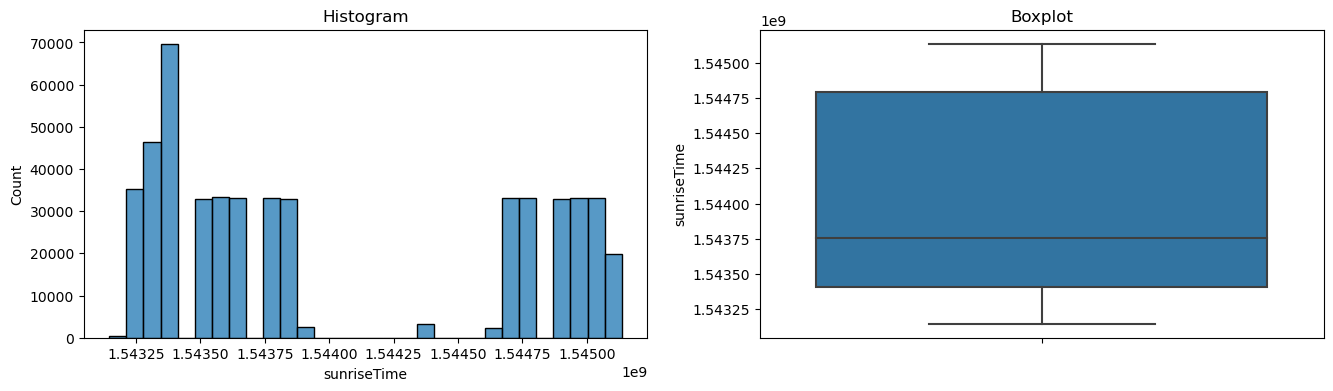

sunsetTime - Before Capping


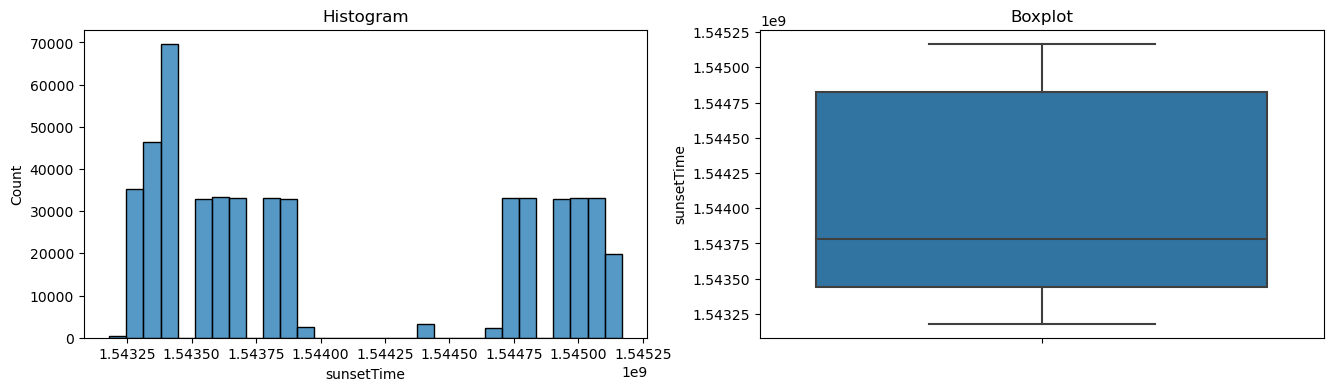


sunsetTime - After Capping


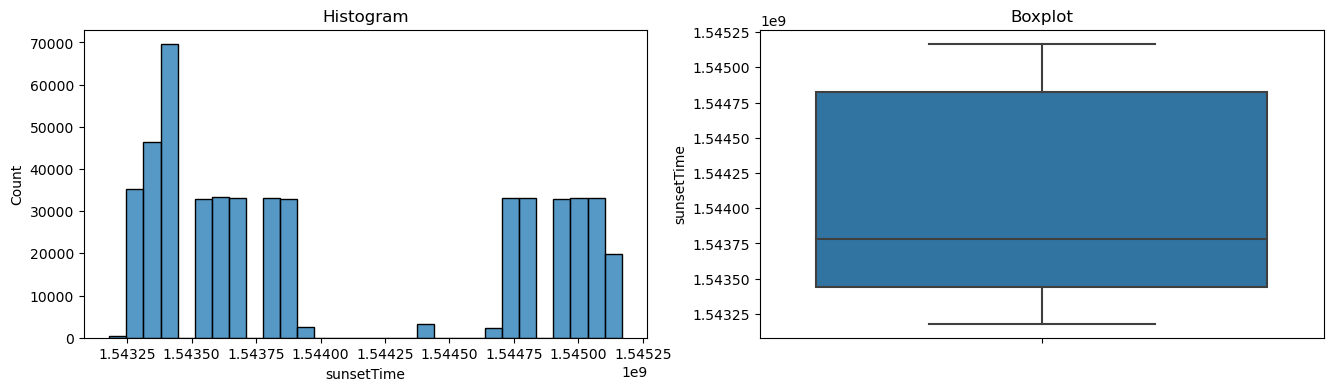

moonPhase - Before Capping


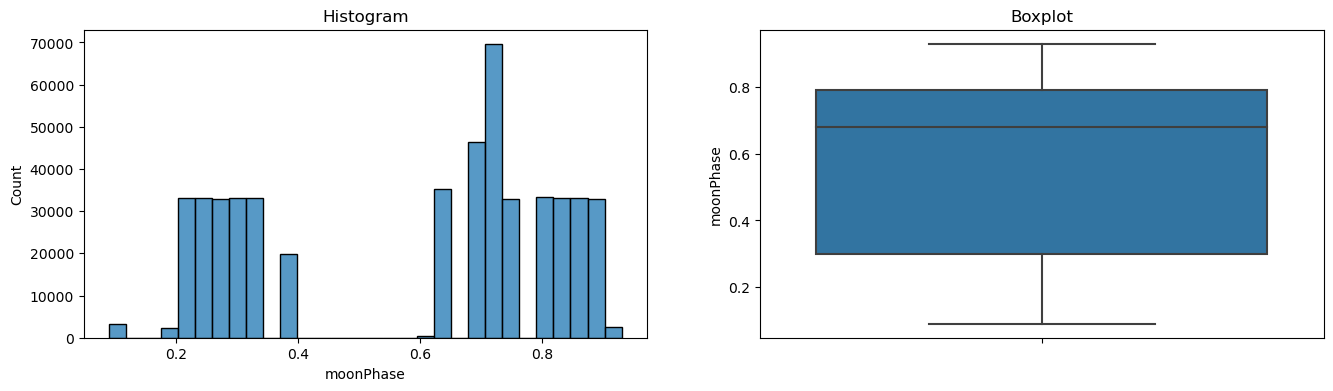


moonPhase - After Capping


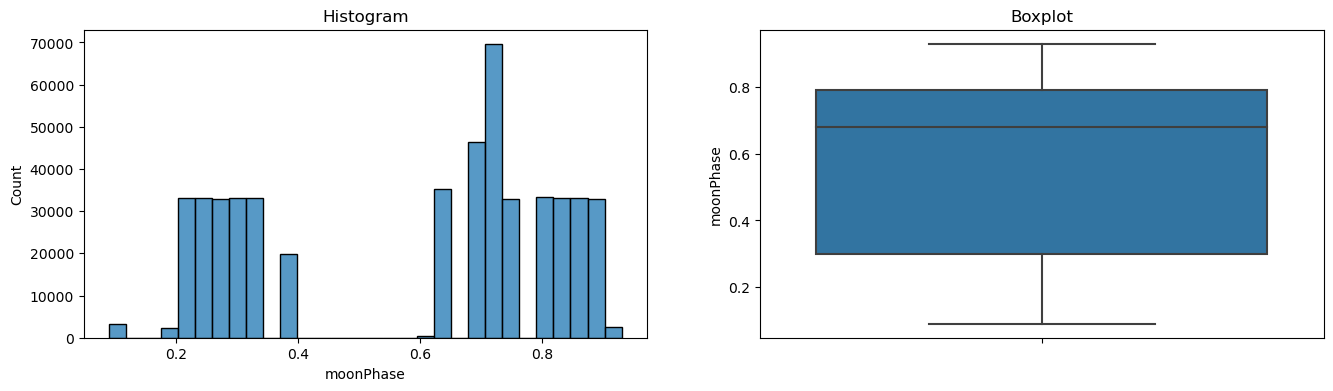

precipIntensityMax - Before Capping


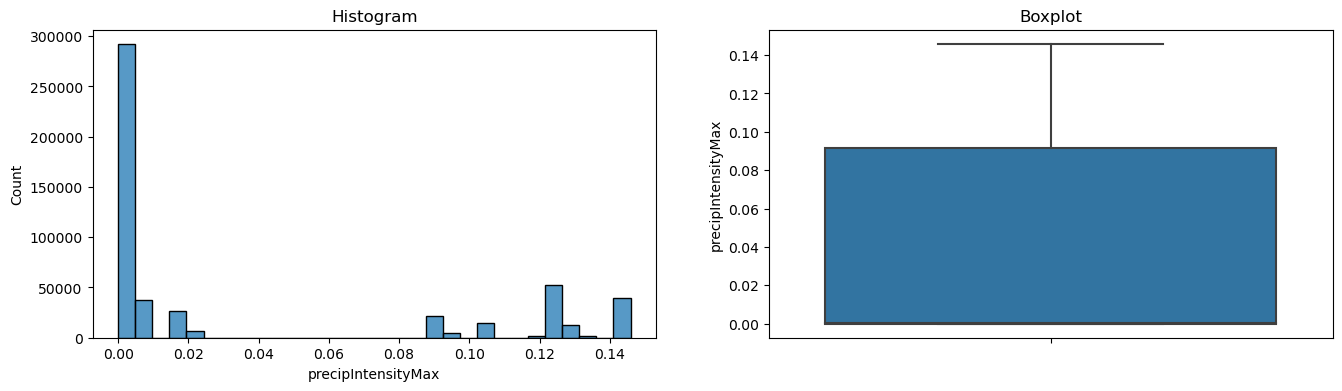


precipIntensityMax - After Capping


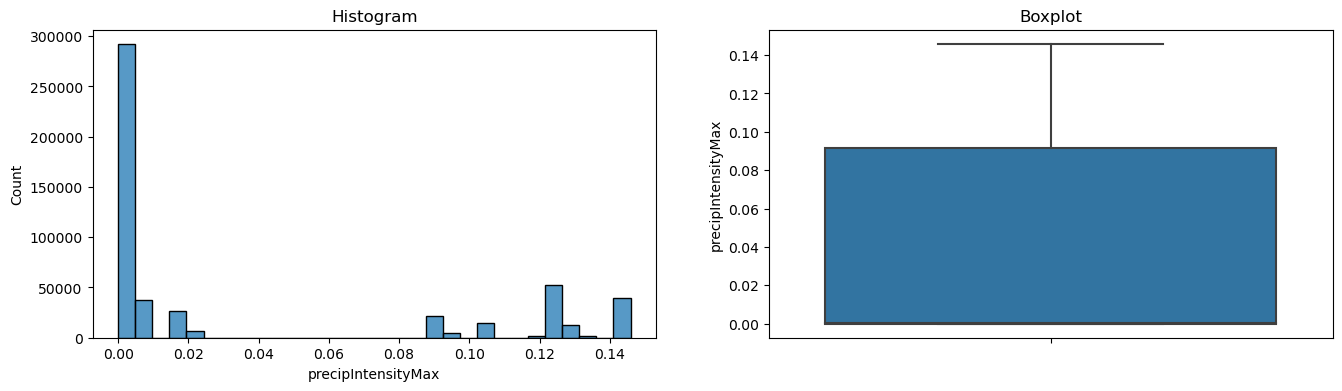

uvIndexTime - Before Capping


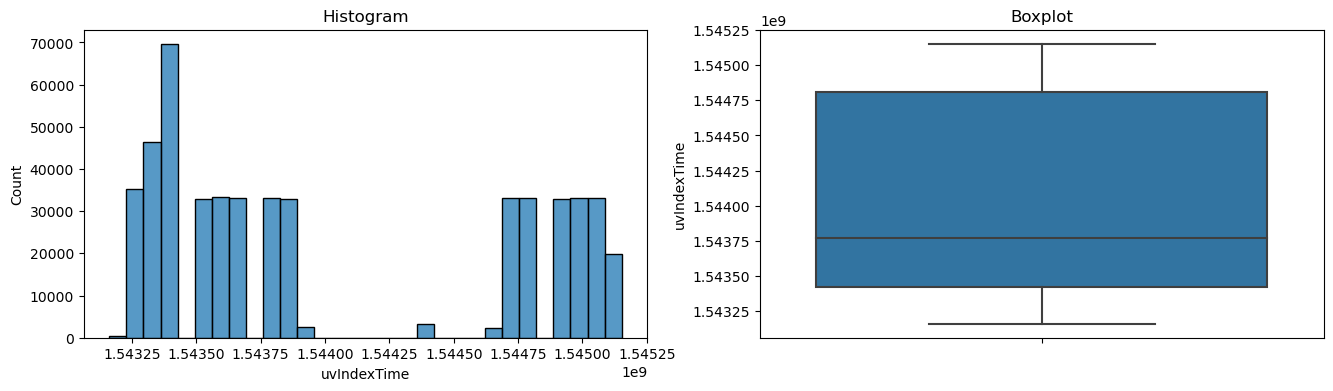


uvIndexTime - After Capping


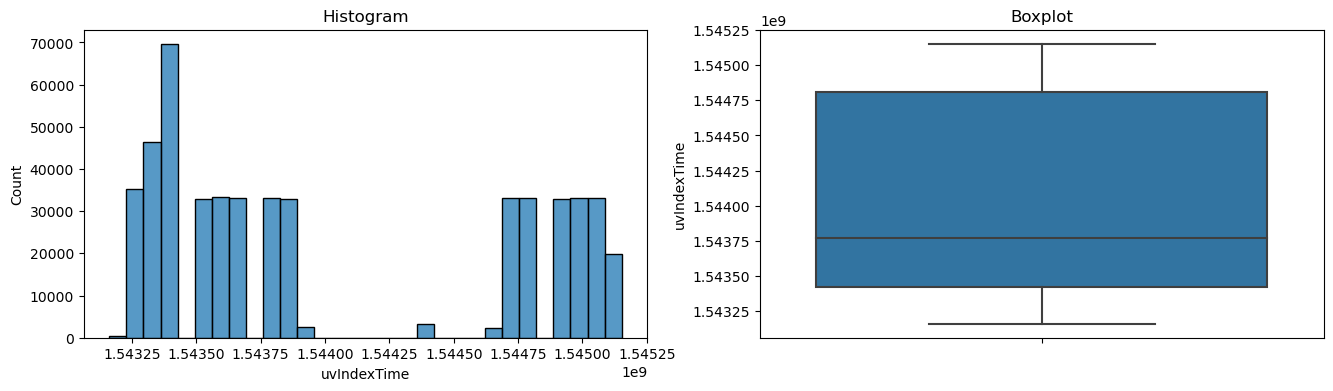

temperatureMin - Before Capping


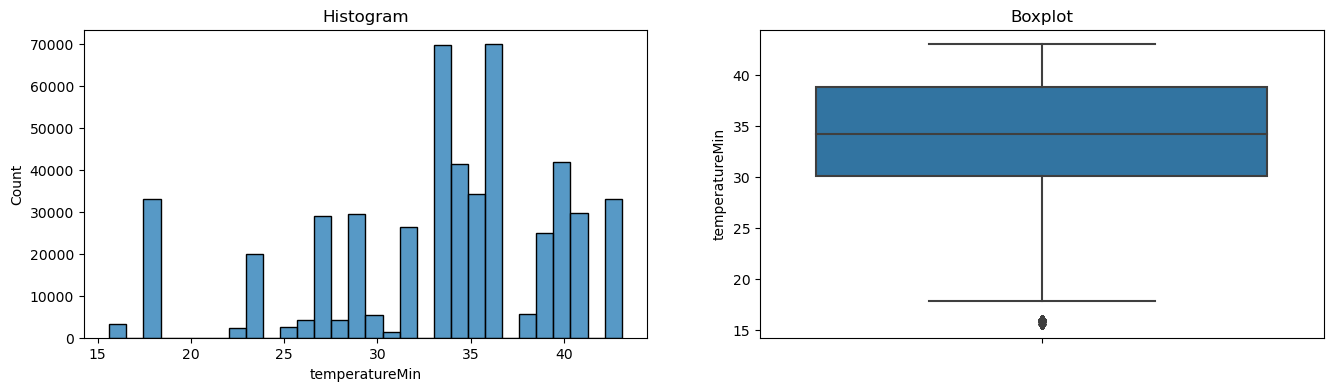


temperatureMin - After Capping


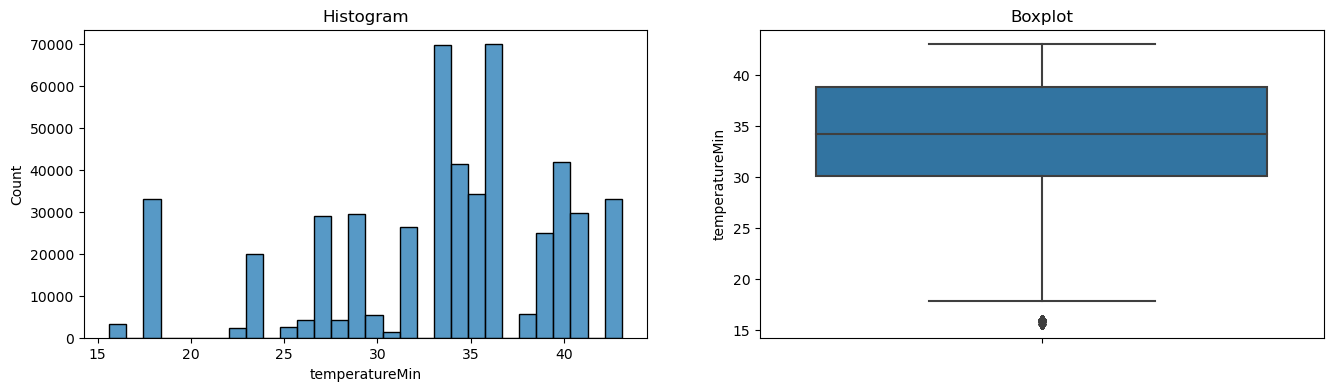

temperatureMinTime - Before Capping


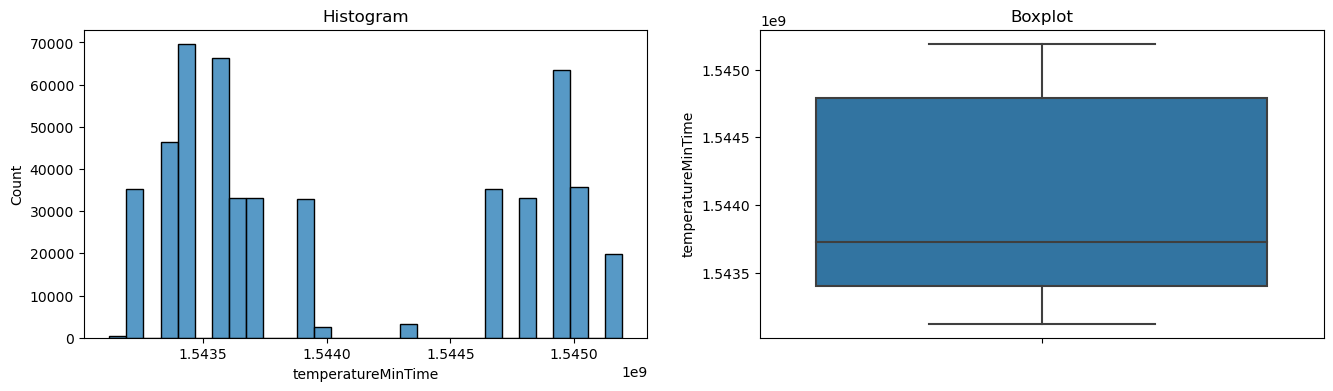


temperatureMinTime - After Capping


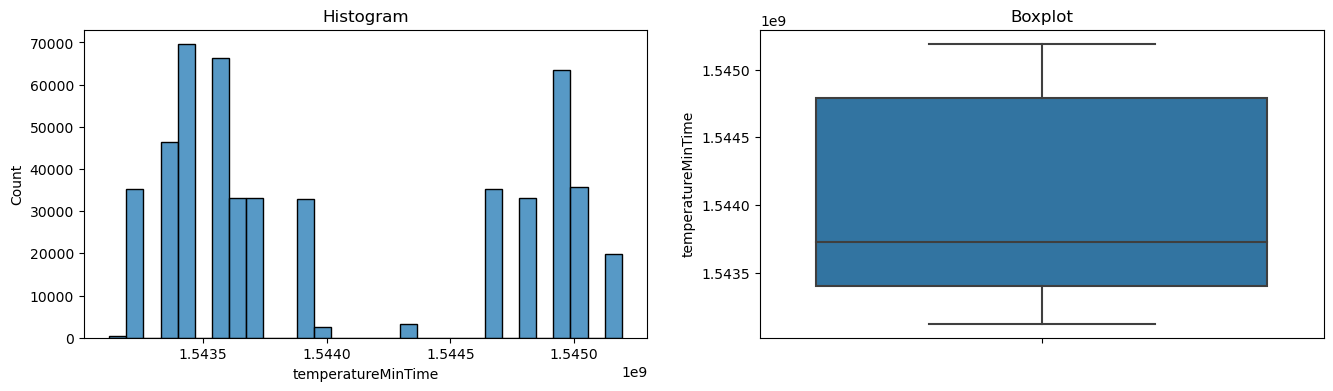

temperatureMax - Before Capping


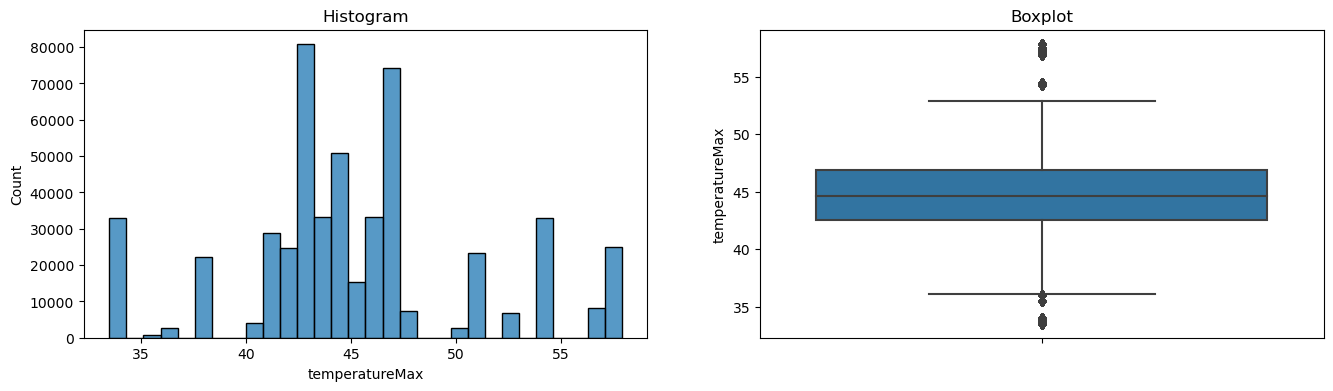


temperatureMax - After Capping


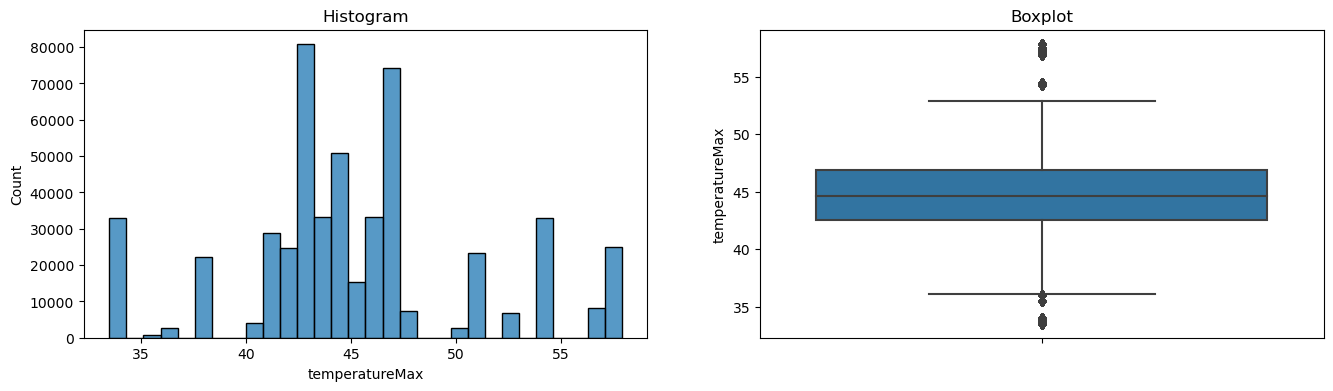

temperatureMaxTime - Before Capping


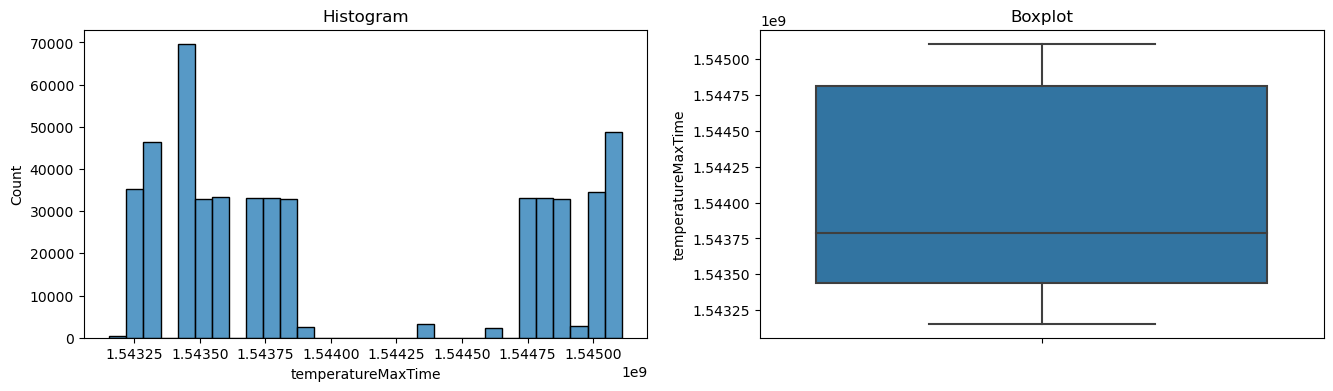


temperatureMaxTime - After Capping


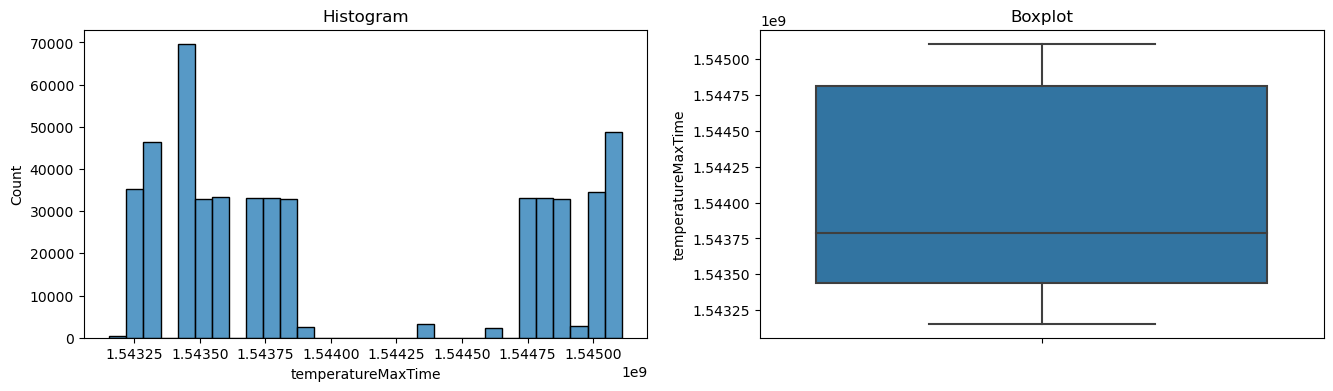

apparentTemperatureMin - Before Capping


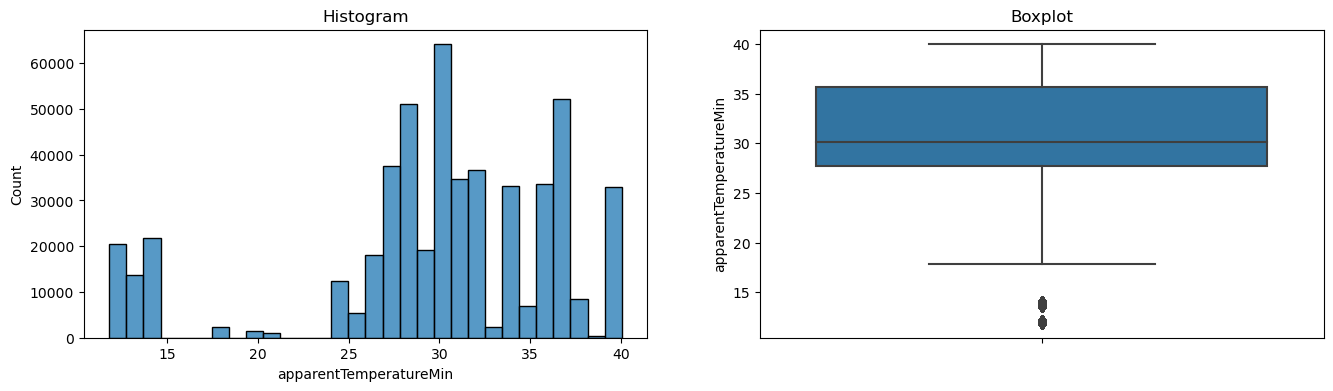


apparentTemperatureMin - After Capping


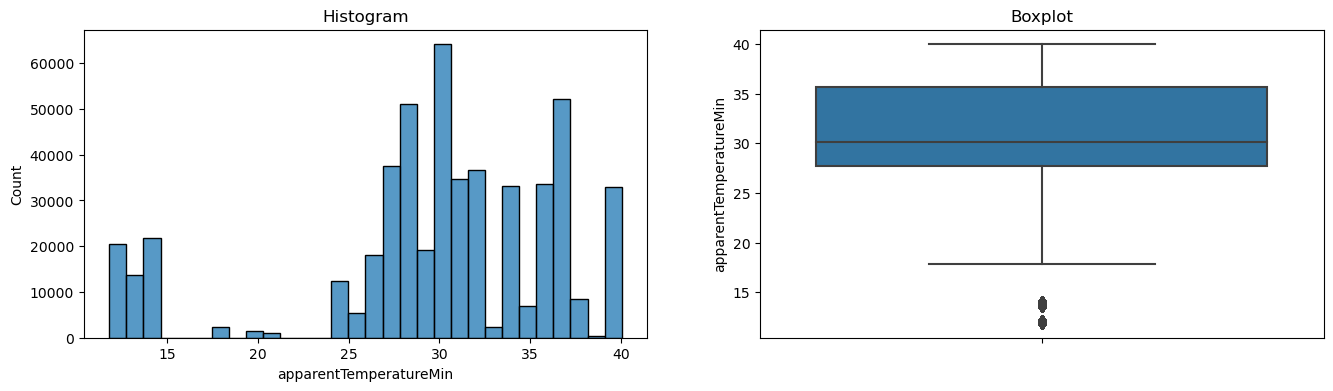

apparentTemperatureMinTime - Before Capping


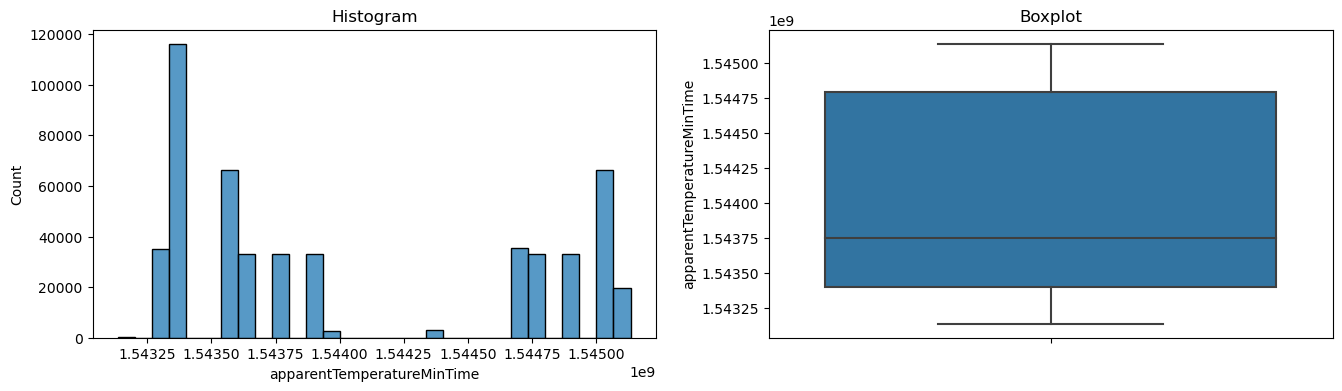


apparentTemperatureMinTime - After Capping


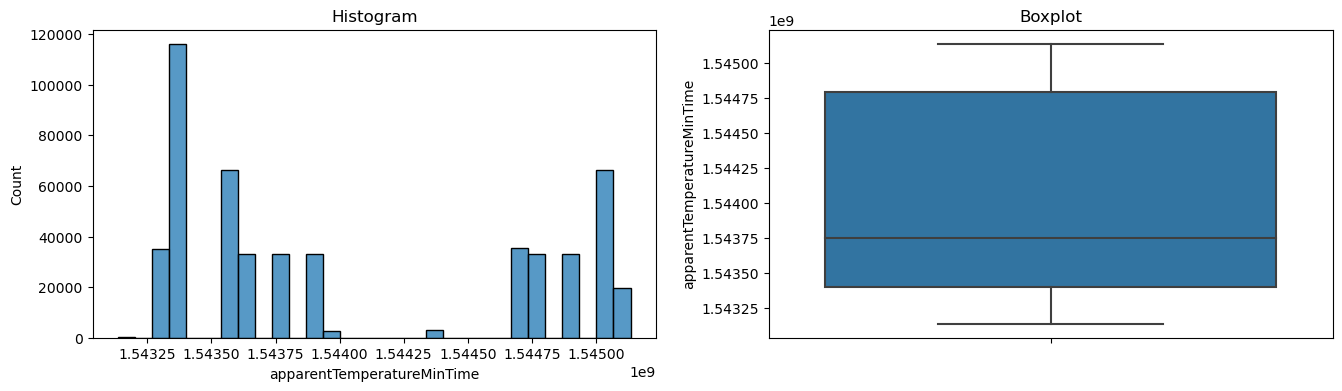

apparentTemperatureMax - Before Capping


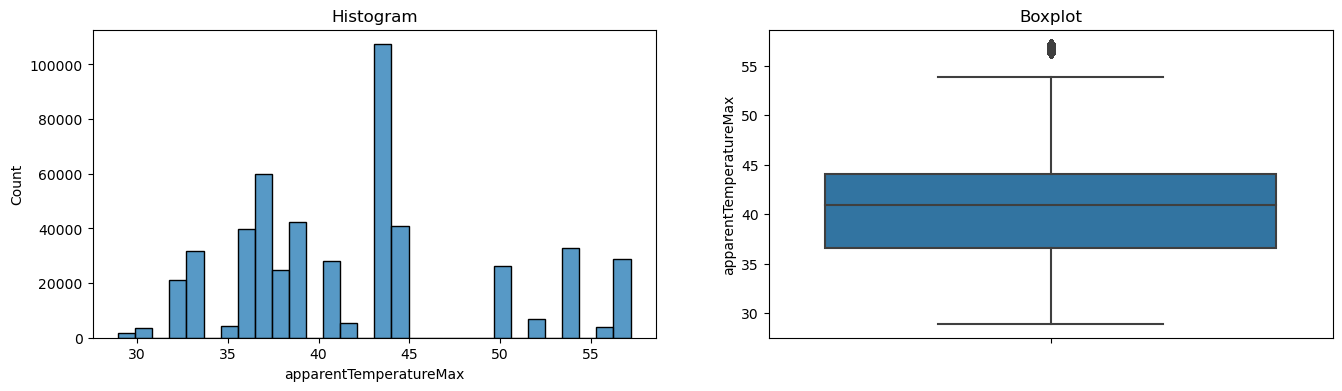


apparentTemperatureMax - After Capping


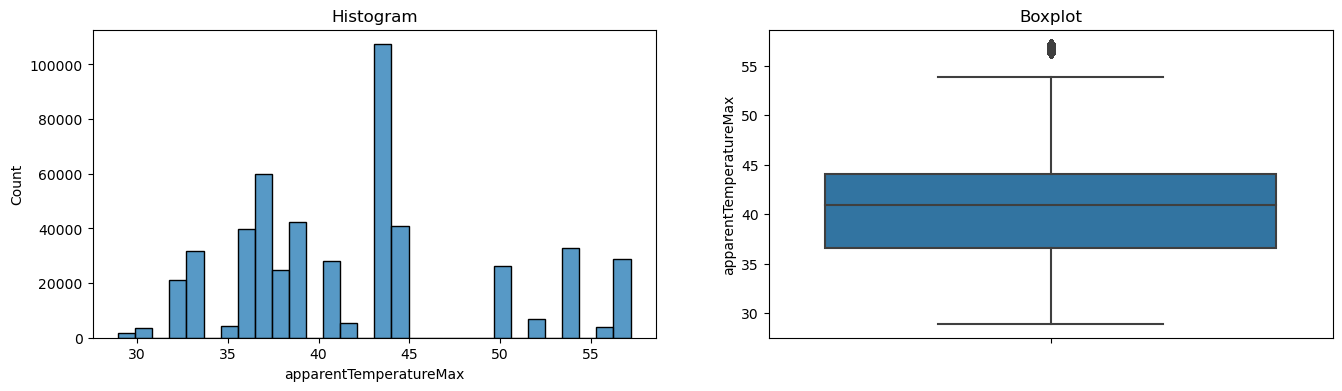

apparentTemperatureMaxTime - Before Capping


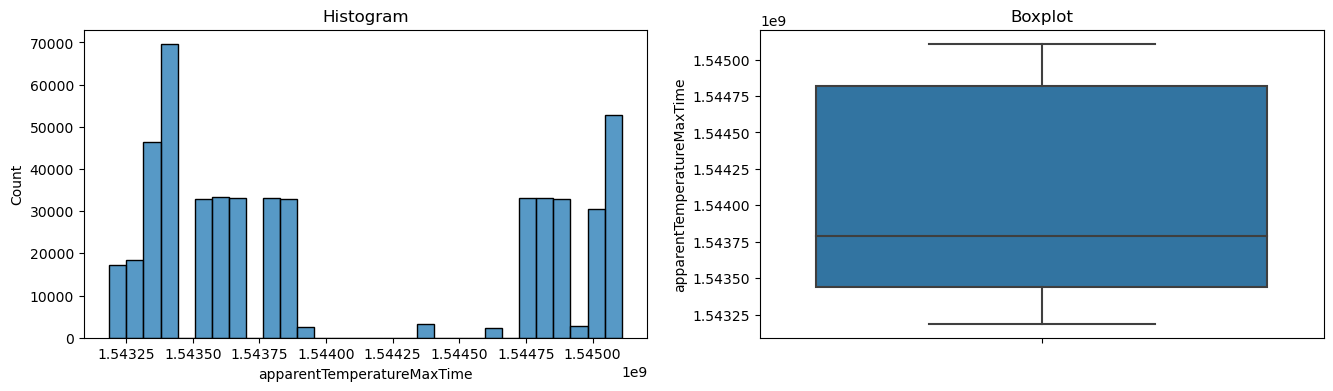


apparentTemperatureMaxTime - After Capping


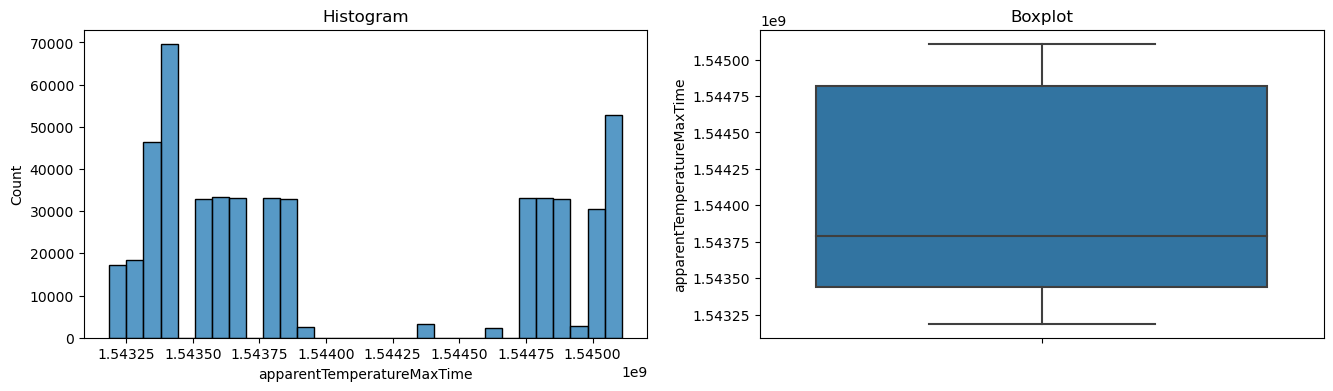

In [29]:
def hist_and_bar_plots(df, columns):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[columns], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[columns])
    plt.title('Boxplot')

    plt.show()


for col in numeric_cols:
    print(f'{col} - Before Capping')
    hist_and_bar_plots(X_train_num, col)

    print(f'\n{col} - After Capping')
    hist_and_bar_plots(X_train_winsorized, col)


the result shows that the numerical distribution has been capped, with few of the numerical value shows a slight difference in the skewness value

# Feature Engineering

Feature Engineering yang akan digunakan:
- Feature Selection

Let us do a feature selection by finding the correlation between the feature and the label with p-values, supporting our hypothesis that:

- $H0$: The selected feature has no correlation with the label
- $H1$: The selected feature has a correlation with the label

We will test the hypothesis with pearson and spearman to prove which correlation method proves my previous heatmap from EDA and we will set the correlation of 0.2 due to the correlations of each features ranging only from 0.0 - 0.2.

In [26]:
# Split between num cols and cat cols
num_cols_winsorized = X_train_winsorized.select_dtypes(include=np.number).columns.tolist() #numeric columns

# Initialize lists to store skewness, correlation values, p-values, and hypothesis testing results
skewness_values = []
correlation_values = []
p_values = []
correlation_status = []

# Set correlation threshold (absolute value)
correlation_threshold = 0.2

# Set critical level (alpha) for hypothesis testing
alpha = 0.05

# Iterate over numerical columns
for column in X_train_num:
    skewness = X_train_winsorized[column].skew()
    skewness_values.append(skewness)

    # Perform hypothesis testing for correlation
    correlation, p_value = stats.pearsonr(X_train_winsorized[column], y_train)
    correlation_values.append(correlation)
    p_values.append(p_value)

    # Determine correlation status based on threshold
    if abs(correlation) >= correlation_threshold:
        correlation_status.append('Yes')
    else:
        correlation_status.append('No')

# Create a new DataFrame to store results
results_df = pd.DataFrame({
    'Feature': num_cols_winsorized,
    'Skewness': skewness_values,
    'Correlation_Values': correlation_values,
    'P_Value': p_values,
    'Correlation?': correlation_status,
    'Hypothesis_Test_Result': np.where(np.array(p_values) < alpha, 'Reject H0', 'Fail to reject H0')
})

# Round p-values to two decimal places
results_df['P_Value'] = results_df['P_Value'].apply('{:.2f}'.format)

# Filter the DataFrame to include only rows where the absolute correlation is above the threshold
filtered_results_df1 = results_df[results_df['Correlation_Values'].abs() >= correlation_threshold]

# Display the filtered DataFrame
filtered_results_df1


Feature  Skewness  Correlation_Values P_Value Correlation?  \
3          distance  0.614505            0.345757    0.00          Yes   
4  surge_multiplier  5.309389            0.229977    0.00          Yes   

  Hypothesis_Test_Result  
3              Reject H0  
4              Reject H0

based on the table above that correlates the feature and label with perason, both distance and surge multiplier have significant positive correlations with the target variable, as indicated by their correlation values and p-values. Therefore, we reject the null hypothesis for both features, suggesting that they are likely important features of the target variable.

In [27]:
# Split between num cols and cat cols
num_cols_winsorized = X_train_winsorized.select_dtypes(include=np.number).columns.tolist() #numeric columns

# Initialize lists to store skewness, correlation values, p-values, and hypothesis testing results
skewness_values = []
correlation_values = []
p_values = []
correlation_status = []

# Set correlation threshold (absolute value)
correlation_threshold = 0.2  # You can adjust this threshold as needed

# Set critical level (alpha) for hypothesis testing
alpha = 0.05

# Iterate over numerical columns
for column in X_train_num:
    skewness = X_train_winsorized[column].skew()
    skewness_values.append(skewness)


    # Perform hypothesis testing for correlation
    correlation, p_value = stats.spearmanr(X_train_winsorized[column], y_train) 
    correlation_values.append(correlation)
    p_values.append(p_value)

    # Determine correlation status based on threshold
    if abs(correlation) >= correlation_threshold:
        correlation_status.append('Yes')
    else:
        correlation_status.append('No')

# Create a new DataFrame to store results
results_df = pd.DataFrame({
    'Feature': num_cols_winsorized,
    'Skewness': skewness_values,
    'Correlation_Values': correlation_values,
    'P_Value': p_values,
    'Correlation?': correlation_status,
    'Hypothesis_Test_Result': np.where(np.array(p_values) < alpha, 'Reject H0', 'Fail to reject H0')  # Insert hypothesis testing result directly
})

# Round p-values to two decimal places
results_df['P_Value'] = results_df['P_Value'].apply('{:.2f}'.format)

# Filter the DataFrame to include only rows where the absolute correlation is above the threshold
filtered_results_df2 = results_df[results_df['Correlation_Values'].abs() >= correlation_threshold]

# Display the filtered DataFrame
filtered_results_df2

Feature  Skewness  Correlation_Values P_Value Correlation?  \
3  distance  0.614505            0.333601    0.00          Yes   

  Hypothesis_Test_Result  
3              Reject H0

based on the Spearman correlation analysis, there appears to be a statistically significant monotonic relationship between the "distance" feature and the target variable.

---

based on the analysis difference made by pearson and spearman, in contrast to Pearson correlation, Spearman correlation revealed that only the "distance" feature exhibits a strong relationship with the target variable, while the "surge multiplier" feature did not meet the threshold for a strong correlation. This indicates that "distance" may be a more influential features compared to "surge multiplier" in our analysis. But we will use pearson due to the correlation method supports more on the EDA results

filtering the numerical values used for modeling

In [28]:
# Get the list of selected feature names
selected_features = filtered_results_df1['Feature'].tolist()

# Filter the x_train DataFrame to include only selected features
X_train_filtered = X_train_winsorized[selected_features]
X_test_filtered = X_test_winsorized[selected_features]

# Display the filtered X_train DataFrame
print(X_train_filtered)

        distance  surge_multiplier
478681      3.37               1.0
65511       2.82               1.0
376578      0.64               1.0
235263      2.53               1.0
691526      3.91               1.0
...          ...               ...
44231       1.80               1.0
35483       3.04               1.0
629120      1.57               1.0
199301      0.80               1.0
446197      4.54               1.0

[510232 rows x 2 columns]


numerical feature has been successfully selected

---
Let us proceed to the categorical features. Based on the previous EDA, since we found out that weather conditions has a weak correlation with the price, let us drop the weather conditions and the summary

extracting the categorical values

In [29]:
cate_cols = X_train.select_dtypes(include='object')

cate_cols

source              destination cab_type  \
478681            North Station  Northeastern University     Lyft   
65511   Northeastern University                 West End     Lyft   
376578         Haymarket Square                 West End     Lyft   
235263  Northeastern University         Theatre District     Uber   
691526  Northeastern University       Financial District     Lyft   
...                         ...                      ...      ...   
44231          Theatre District  Northeastern University     Uber   
35483         Boston University                 West End     Uber   
629120         Theatre District                North End     Uber   
199301         Haymarket Square       Financial District     Uber   
446197        Boston University       Financial District     Lyft   

                                  product_id          name    short_summary  \
478681                             lyft_line        Shared      Light Rain    
65511                              lyft_line        Shared            Rain    
376578                           lyft_luxsuv  Lux Black XL        Overcast    
235263  6c84fd89-3f11-4782-9b50-97c468b19529         Black   Mostly Cloudy    
691526                             lyft_line        Shared            Rain    
...                                      ...           ...              ...   
44231   9a0e7b09-b92b-4c41-9779-2ad22b4d779d           WAV        Overcast    
35483   997acbb5-e102-41e1-b155-9df7de0a73f2      UberPool        Overcast    
629120  9a0e7b09-b92b-4c41-9779-2ad22b4d779d           WAV        Overcast    
199301  997acbb5-e102-41e1-b155-9df7de0a73f2      UberPool        Overcast    
446197                           lyft_luxsuv  Lux Black XL           Clear    

                                             long_summary                 icon  
478681                          Rain throughout the day.                 rain   
65511    Rain until morning, starting again in the eve...                rain   
376578                 Partly cloudy throughout the day.               cloudy   
235263                 Mostly cloudy throughout the day.    partly-cloudy-day   
691526   Rain until morning, starting again in the eve...                rain   
...                                                   ...                  ...  
44231                  Partly cloudy throughout the day.               cloudy   
35483    Rain until morning, starting again in the eve...              cloudy   
629120                 Mostly cloudy throughout the day.               cloudy   
199301                 Mostly cloudy throughout the day.               cloudy   
446197                 Partly cloudy throughout the day.          clear-night   

[510232 rows x 8 columns]

Let us do another feature selection by finding the correlation between the categorical feature and the label with p-values, supporting our hypothesis that:

- $H0$: The selected feature has no correlation with the label
- $H1$: The selected feature has a correlation with the label

We will test the hypothesis with Kendall's Tau due to the unordinal nature of the categorical feature

In [30]:
# Create an empty list to store Kendall's tau results
kendall_tau_results = []

# Iterate over each categorical feature
for feature in cate_cols.columns:
    # Calculate Kendall's tau between the feature and the target variable
    tau, p_value = kendalltau(cate_cols[feature], y_train)
    
    # Append the results to the list
    kendall_tau_results.append({'Feature': feature,
                                'Kendall_tau': tau,
                                'P-value': p_value,
                                'Hypothesis_Test_Result': 'Reject H0' if p_value < alpha else 'Fail to reject H0'})

# Convert the list of dictionaries to a DataFrame
kendall_tau_results_df = pd.DataFrame(kendall_tau_results)

# Print the Kendall's tau results
kendall_tau_results_df


Feature  Kendall_tau        P-value Hypothesis_Test_Result
0         source    -0.013504   1.756962e-42              Reject H0
1    destination    -0.031291  6.836176e-220              Reject H0
2       cab_type    -0.057960   0.000000e+00              Reject H0
3     product_id     0.051365   0.000000e+00              Reject H0
4           name    -0.397074   0.000000e+00              Reject H0
5  short_summary     0.001009   3.302851e-01      Fail to reject H0
6   long_summary     0.000517   6.137274e-01      Fail to reject H0
7           icon     0.001664   1.101397e-01      Fail to reject H0

The Kendall's Tau test reveals significant associations between the target variable and features such as source, destination, cab_type, product_id, and name. These findings suggest that these features may serve as influential predictors for the target variable and warrant further investigation in subsequent analyses and modeling efforts.

---

Dropping the weather conditions in the columns

In [31]:
# Drop columns from cate_cols DataFrame and update it in place
cate_cols.drop(columns=['short_summary', 'long_summary', 'icon'], inplace=True)

X_train_cat_filtered = cate_cols

X_train_cat_filtered


source              destination cab_type  \
478681            North Station  Northeastern University     Lyft   
65511   Northeastern University                 West End     Lyft   
376578         Haymarket Square                 West End     Lyft   
235263  Northeastern University         Theatre District     Uber   
691526  Northeastern University       Financial District     Lyft   
...                         ...                      ...      ...   
44231          Theatre District  Northeastern University     Uber   
35483         Boston University                 West End     Uber   
629120         Theatre District                North End     Uber   
199301         Haymarket Square       Financial District     Uber   
446197        Boston University       Financial District     Lyft   

                                  product_id          name  
478681                             lyft_line        Shared  
65511                              lyft_line        Shared  
376578                           lyft_luxsuv  Lux Black XL  
235263  6c84fd89-3f11-4782-9b50-97c468b19529         Black  
691526                             lyft_line        Shared  
...                                      ...           ...  
44231   9a0e7b09-b92b-4c41-9779-2ad22b4d779d           WAV  
35483   997acbb5-e102-41e1-b155-9df7de0a73f2      UberPool  
629120  9a0e7b09-b92b-4c41-9779-2ad22b4d779d           WAV  
199301  997acbb5-e102-41e1-b155-9df7de0a73f2      UberPool  
446197                           lyft_luxsuv  Lux Black XL  

[510232 rows x 5 columns]

displaying if the result is successful

Feature Selection insight:

**Pearson Correlation for Numerical Feature Selection**: After comparing the results of Spearman and Pearson correlation analysis, it became evident that Pearson's correlation aligns with the observed relationships between price and surge multiplier. Unlike Spearman, which only showed correlation with distance, Pearson's correlation provides stronger support for the identified associations, hence its preference.

**Kendall's Tau for Categorical Feature Selection**: Employing Kendall's Tau for categorical feature selection allows for exploring correlations between multiple categorical features and a continuous target variable regardless of the order of the feature. The statistical approach employed here reinforces the insights gained from previous heatmap-based EDA, offering validation for feature selection decisions based on the observed correlations.

# Scaling and Encoding

splits numerical and categorical columns

In [32]:
#Split between num cols and cat cols
num_cols = X_train_filtered.select_dtypes(include=np.number).columns.tolist() #numeric columns
cat_cols = X_train_cat_filtered.select_dtypes(include='object').columns.tolist() #categorical columns

#split train set into num and cat set
X_train_num = X_train_filtered[num_cols]
X_train_cat = X_train[cat_cols]

#split test set into num and cat set
X_test_num = X_test_filtered[num_cols]
X_test_cat = X_test[cat_cols]

## Encoding

shows the first 5 rows of the categorical values

In [33]:
X_train_cat.head()

source              destination cab_type  \
478681            North Station  Northeastern University     Lyft   
65511   Northeastern University                 West End     Lyft   
376578         Haymarket Square                 West End     Lyft   
235263  Northeastern University         Theatre District     Uber   
691526  Northeastern University       Financial District     Lyft   

                                  product_id          name  
478681                             lyft_line        Shared  
65511                              lyft_line        Shared  
376578                           lyft_luxsuv  Lux Black XL  
235263  6c84fd89-3f11-4782-9b50-97c468b19529         Black  
691526                             lyft_line        Shared

encode the categorical values with ordinal encoder

In [34]:
encoder = OrdinalEncoder()

encoder.fit(X_train_cat)

X_train_cat_encode = encoder.transform(X_train_cat)
X_test_cat_encode = encoder.transform(X_test_cat)

X_train_cat_encode [:5]

array([[ 7.,  8.,  0.,  7.,  7.],
       [ 8., 11.,  0.,  7.,  7.],
       [ 5., 11.,  0.,  9.,  4.],
       [ 8., 10.,  1.,  1.,  0.],
       [ 8.,  4.,  0.,  7.,  7.]])

values has been successfully encoded

In [35]:
X_train_cat_encode.shape

(510232, 5)

## Scaling

scales numerical value with RobustScaler

In [36]:
# Define the scaler
scaler = RobustScaler()

#Fit the scaler
scaler.fit(X_train_num) 

#Transform the data
X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

#### Scaling and Encoding Insight:

**Encoding Choice**: After evaluating various encoding techniques including LabelEncoder, OneHotEncoder, and OrdinalEncoder, I opted for OrdinalEncoder due to the non-hierarchical nature of my categorical variables. OrdinalEncoder preserves the original order of categories while converting them into numeric values, ensuring interpretability.

**Scaling Strategy**: Given the presence of outliers and variable feature distributions in my dataset, I selected RobustScaler for scaling. RobustScaler effectively handles extreme values and skewed distributions without compromising the interpretability of model coefficients, potentially leading to improved model performance.

## Concat

concatenate the categorical and numerical values

In [37]:
#Concate
X_train_final = np.concatenate([X_train_cat_encode, X_train_num_scaled], axis=1)
X_test_final = np.concatenate([X_test_cat_encode, X_test_num_scaled], axis=1)

transform them into dataframe

In [38]:
#Transform into dataframe
X_train_final = pd.DataFrame(X_train_final, columns=[cat_cols + num_cols])
X_test_final = pd.DataFrame(X_test_final, columns=[cat_cols + num_cols])

X_train_final.head()


source destination cab_type product_id name  distance surge_multiplier
0    7.0         8.0      0.0        7.0  7.0  0.728916              0.0
1    8.0        11.0      0.0        7.0  7.0  0.397590              0.0
2    5.0        11.0      0.0        9.0  4.0 -0.915663              0.0
3    8.0        10.0      1.0        1.0  0.0  0.222892              0.0
4    8.0         4.0      0.0        7.0  7.0  1.054217              0.0

# Modeling


creating the linear regression model

In [39]:
# Define which models to use
model = LinearRegression()

train the model

In [40]:
# Train the model into train set
model.fit(X_train_final, y_train)

LinearRegression()

# Model Evaluation

Displaying the MAE, RMSE and R2 Score

In [41]:
# Train the model
model.fit(X_train_final, y_train)

# Predictions on training set
y_train_pred = model.predict(X_train_final)

# Predictions on test set
y_test_pred = model.predict(X_test_final)

def evaluate_model(y_test, y_pred):
    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # R2 Score
    r2 = r2_score(y_test, y_pred)
    
    return mae, rmse, r2

# Evaluation on training set
train_mae, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)

# Evaluation on test set
test_mae, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)

print("Training Scores:")
print("Mean Absolute Error (MAE):", train_mae)
print("Root Mean Squared Error (RMSE):", train_rmse)
print("R2 Score:", train_r2)
print()
print("Testing Scores:")
print("Mean Absolute Error (MAE):", test_mae)
print("Root Mean Squared Error (RMSE):", test_rmse)
print("R2 Score:", test_r2)


Training Scores:
Mean Absolute Error (MAE): 5.011245205911024
Root Mean Squared Error (RMSE): 6.32009528356549
R2 Score: 0.5401441510674686

Testing Scores:
Mean Absolute Error (MAE): 5.011730700739416
Root Mean Squared Error (RMSE): 6.320468343316385
R2 Score: 0.5422568304059647


Based on my model Evaluation:

- Mean Absolute Error (MAE):

  - Both for training and testing, the model's predictions are off by around 5 units on average. Lower values mean better predictions, so being close to 5 suggests the model is making decent predictions.

- Root Mean Squared Error (RMSE):

  - The model's errors average around 6.32 units, which is decent. Lower values are better, indicating more accurate predictions.

- R2 Score:

  - This measures how well the model explains the accuracy of the model. Scores closer to 1 are better. Both the training and testing scores are around 0.54, indicating the model explains about 54% of the accuracy in the data.

Overall, the model's error suggests a balance between underfitting and overfitting. While predictions are reasonably accurate, the model explains only about 54% of the model's accuracy, indicating potential underfitting. There's room for improvement to enhance accuracy and better capture data patterns. Adjusting feature engineering or data cleaning may help achieve better performance

Showing the model's performance with scatter plots displaying residuals and linear regression showing the actual price and the predicted price

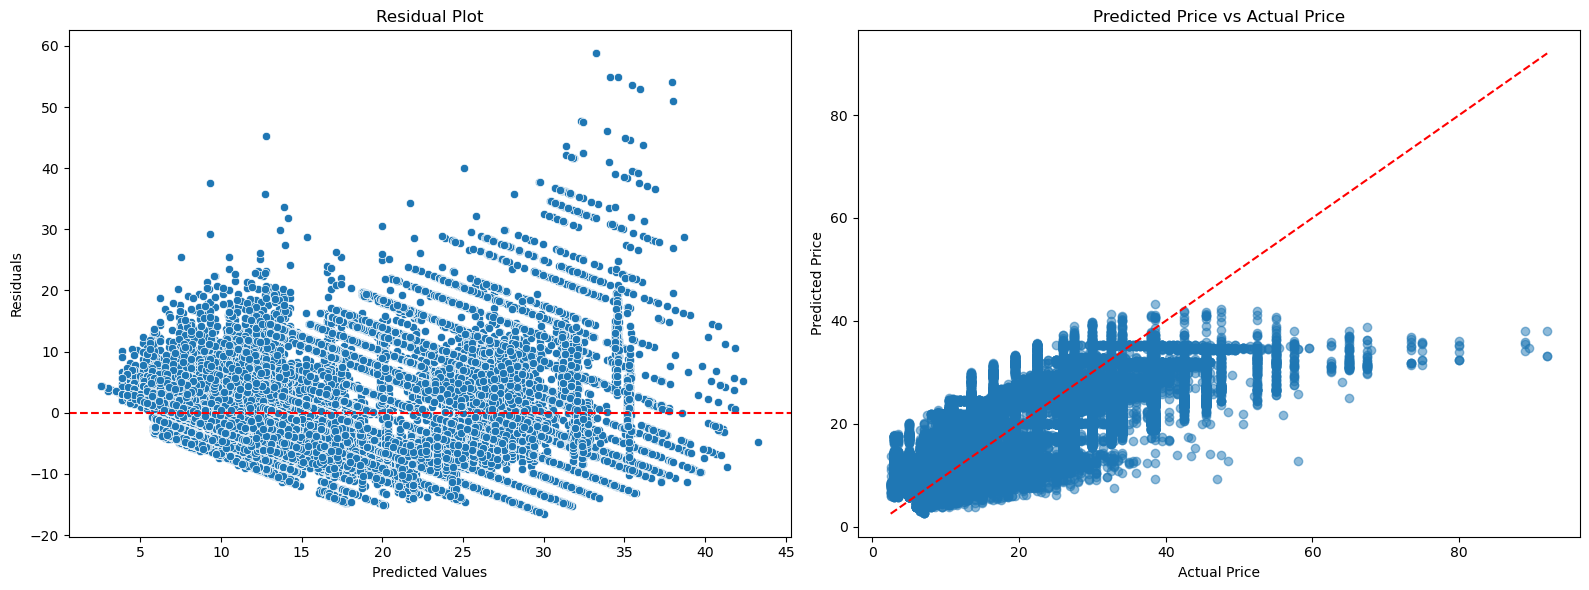

In [61]:
# Calculate residuals
residuals = y_test - y_test_pred

# Create a figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting the residuals
sns.scatterplot(x=y_test_pred, y=residuals, ax=axes[0])
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_title('Residual Plot')
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Residuals')

# Plotting predicted vs actual values
axes[1].scatter(y_test, y_test_pred, alpha=0.5)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[1].set_title('Predicted Price vs Actual Price')
axes[1].set_xlabel('Actual Price')
axes[1].set_ylabel('Predicted Price')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()




While the residuals suggest the model captures some trends, its low R-squared score (54%) indicates limited explanatory power. This, along with potentially weak feature correlations, suggests exploring additional features or considering non-linear relationships for improved accuracy.

# Model Saving

Saving the columns, encoder, scaler and model into json and pkl

In [46]:
#Save list categorical solumns
with open('list_cat_cols.txt', 'w') as file_1:
  json.dump(cat_cols, file_1)

#Save list numerical columns
with open('list_num_kols.txt', 'w') as file_2:
  json.dump(num_cols, file_2)

#Save Encoder
with open('encoder.pkl', 'wb') as file_3:
  pickle.dump(encoder, file_3)

#Save Scaler
with open('scaler.pkl', 'wb') as file_4:
  pickle.dump(scaler, file_4)

#Save Model
with open('model.pkl', 'wb') as file_5:
  pickle.dump(model, file_5)

# Model Inference

Importing the necessary libraries

In [47]:
#Load Library
import pandas as pd
import numpy as np
import json
import pickle

load the file extracted from model saving

In [48]:
#Load Model
with open('model.pkl', 'rb') as file_1:
  model = pickle.load(file_1)

#Load list categorical solumns
with open('list_cat_cols.txt', 'r') as file_2:
  cat_cols = json.load(file_2)

#Load list numerical columns
with open('list_num_kols.txt', 'r') as file_3:
  num_cols = json.load(file_3)

#Load Encoder
with open('encoder.pkl', 'rb') as file_4:
  encoder = pickle.load(file_4)

#Load Scaler
with open('scaler.pkl', 'rb') as file_5:
  scaler = pickle.load(file_5)



Creating a data dummy for model testing

In [57]:
dummy_data = [{
    'id': 'd5db3269-4d95-493d-9c36-df94c9e97b7b',
    'timestamp': 1543685583.0,
    'hour': 17,
    'day': 12,
    'month': 12,
    'datetime': '2018-12-12 17:33:03',
    'timezone': 'America/New_York',
    'source': 'Beacon Hill',
    'destination': 'Northeastern University',
    'cab_type': 'Uber',  
    'product_id': 'lyft_luxsuv',
    'name': 'Lyft XL',
    'distance': 3.6,
    'surge_multiplier': 1.0,  
    'latitude': 42.3505,
    'longitude': -71.1054,
    'temperature': 41.89,
    'apparentTemperature': 41.89,
    'short_summary': 'Partly Cloudy', 
    'long_summary': 'Light rain in the morning and overnight.',
    'precipIntensity': 0.0,
    'precipProbability': 0.0,
    'humidity': 0.57,
    'windSpeed': 2.51,
    'windGust': 4.03,
    'windGustTime': 1543672800,
    'visibility': 9.953,
    'temperatureHigh': 44.54,
    'temperatureHighTime': 1543690800,
    'temperatureLow': 34.74,
    'temperatureLowTime': 1543712400,
    'apparentTemperatureHigh': 43.87,
    'apparentTemperatureHighTime': 1543690800,
    'apparentTemperatureLow': 35.39,
    'apparentTemperatureLowTime': 1543712400,
    'icon': 'partly-cloudy-day', 
    'dewPoint': 27.66,
    'pressure': 1022.54,
    'windBearing': 325,
    'cloudCover': 0.34,
    'uvIndex': 2,
    'visibility.1': 9.953,
    'ozone': 275.8,
    'sunriseTime': 1543665341,
    'sunsetTime': 1543698866,
    'moonPhase': 0.82,
    'precipIntensityMax': 0.0,
    'uvIndexTime': 1543683600,
    'temperatureMin': 31.31,
    'temperatureMinTime': 1543662000,
    'temperatureMax': 44.54,
    'temperatureMaxTime': 1543690800,
    'apparentTemperatureMin': 28.1,
    'apparentTemperatureMinTime': 1543662000,
    'apparentTemperatureMax': 43.87,
    'apparentTemperatureMaxTime': 1543690800}]

dummy = pd.DataFrame(dummy_data)
dummy.head()

id     timestamp  hour  day  month  \
0  d5db3269-4d95-493d-9c36-df94c9e97b7b  1.543686e+09    17   12     12   

              datetime          timezone       source  \
0  2018-12-12 17:33:03  America/New_York  Beacon Hill   

               destination cab_type  ... precipIntensityMax uvIndexTime  \
0  Northeastern University     Uber  ...                0.0  1543683600   

   temperatureMin  temperatureMinTime  temperatureMax  temperatureMaxTime  \
0           31.31          1543662000           44.54          1543690800   

   apparentTemperatureMin  apparentTemperatureMinTime apparentTemperatureMax  \
0                    28.1                  1543662000                  43.87   

  apparentTemperatureMaxTime  
0                 1543690800  

[1 rows x 56 columns]

### Inference Feature Engineering

In [58]:
#Split Categorical and Numerical
data_num = dummy[num_cols]
data_cat = dummy[cat_cols]

#Encode the cat
data_cat_encode = encoder.transform(data_cat)

#Scale the num
data_num_scale = scaler.transform(data_num)

#Concatenate
data_final = np.concatenate([data_cat_encode, data_num_scale], axis=1)

data_final = pd.DataFrame(data_final, columns= cat_cols + num_cols)
data_final

source  destination  cab_type  product_id  name  distance  surge_multiplier
0     1.0          8.0       1.0         9.0   6.0   0.86747               0.0

dummy data has been successfully manipulated

### Model Prediction

In [59]:
# Predict the score
price = model.predict(data_final)

#Show result
print(f"Predicted Price: ${price[0]:.2f}")

Predicted Price: $27.13


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


The code displayed the predicted price of 27 dollars

# Conclusion / Kesimpulan

**Business Insight:**

Based on the data analysis and model prediction, we have gained several insights that can be valuable for business decision-making. Firstly, it appears that Uber has more transactions than Lyft, suggesting that there might be factors or strategies contributing to Uber's higher transaction volume that we could potentially learn from or adapt. One factor that we can learn is by their price adjustment, as evidenced by the box plot of both cab types implying that lyft has higher extreme values. Additionally, we observed that transactions are more frequent during cloudy weather, indicating a potential correlation between weather conditions and ride-hailing demand. This observation can be used to observe user's demand interval to implement the price's surge multiplier. Furthermore, the price appears to be influenced by the surge multiplier, suggesting that pricing strategies during peak demand periods could impact revenue. 

Keep in mind that the amount of transactions doesn't necessarily dependent on the dataset as there are external factors that supports Uber and Lyft's large amount of transactions such as their excellent customer service, the marketing strategies implemented by both companies, etc. These external factors will greatly affect the flow of transactions even if our application implement a surge multiplier from a high demand.

**Further Improvements for both model and dataset:**

Despite these insights, there are areas for improvement in both the data quality and model performance. The analysis revealed that the correlation between various features and the target variable (price) is low, indicating that additional relevant features may need to be considered or that the existing features may need further refinement. Additionally, the high cardinality of certain features may introduce noise into the model and could be reduced through feature engineering techniques. Refining data quality and reducing cardinality could enhance the model's performance. Furthermore, the linear regression model exhibited some limitations in predicting transaction prices, as evidenced by the moderate accuracy score (R2 score). 

To address this, alternative regression modeling techniques such as support vector regression and decision tree could be explored. Additionally, improving feature selection methods, implementing different scaling and encoding techniques, and conducting further research with an updated dataset could lead to better prediction performance.

In conclusion, while the current model provides some utility in predicting individual transaction prices, there is room for improvement in both data quality and model performance. Remember that this model is not perfect and it is open for suggestions and improvements. By addressing these areas, businesses can potentially enhance their decision-making processes and optimize their strategies in the ride-hailing industry.

# Conceptual Problems

1. Sebutkan dan jelaskan asumsi yang dipakai oleh Linear Regression ! (Gunakan bahasa anda sendiri)

2. Tunjukkan dan tafsirkan arti dari slope dan intercept yang didapat dari model yang telah Anda bangun !

**Jawaban 1:** 

Asumsi yang dimiliki oleh linear regression memiliki 5 asumsi:
- Linearity: hubungan atau korelasi yang dimiliki oleh fitur dan label bersifat linear
- No Multicollinearity: korelasi yang dimiliki antara fitur dan label bersifat kuat
- Homoscedasticity: Variasi penyebaran data asli dan data prediksi bersifat konstan atau tidak tersebar secara luas, yang mengartikan bahwa penyebaran tidak boleh tersebar terlalu jauh dengan garis regresi
- Normality: Distribusi residuals diasumsikan bersifat normal
- No Auto-Correlation: Residual data diasumsikan bersifat indepedent atau tidak ketergantungan dengan residual atau errors

Perlu dicatat bahwa untuk menciptakan linear regression tidak perlu terpaku dengan asumsi yang dimiliki oleh linear regression karena dataset yang mengikuti asumsi-asumsi linear regression hampir tidak ada, asumsi yang tertulis diatas adalah bagaimana program mengasumsikan nilai regresi berdasarkan dataset yang diberikan

**Jawaban 2:**

In [ ]:
slope = model.coef_

print("Slope:", slope)

Slope: [ 2.86262444e-02  1.95292734e-02  8.55338918e+00  9.94046069e-01
 -1.72527595e+00  4.77812866e+00  3.58913362e+01]


Slope adalah jarak kemiringan yang dimiliki dari satu fitur ke fitur selanjutnya. Dan di dalam model yang saya sudah ciptakan, bisa dilihat bahwa kemiringan yang dimiliki oleh masing-masing fitur berbeda-beda

In [ ]:
print('Intercept: ',model.intercept_)

Intercept:  15.654919087147197


Intercept adalah nilai prediksi yang diciptakan jika nilai variabel yang ada di dalam fitur diasumsikan sebagai 0. Dengan menggunakan hasil intercept diatas sebagai contoh, nilai 15.7 adalah harga yang ditetapkan jika jarak pemesanan ojek online nya berjarak 0-1 kilometer